In [1]:
%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>"))

In [1]:
# import
import os
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord

from astropy.io import ascii

from specdb import query_catalog as spqcat
#from specdb import interface_db as spgidb
from specdb import utils as spdbu
from specdb.specdb import SpecDB, IgmSpec
from specdb import specdb as sdbsdb

from pyigm.surveys.llssurvey import LLSSurvey

from linetools.spectra.xspectrum1d import XSpectrum1D

import importlib
import random
import math

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import pickle

import scipy.stats
from astropy.modeling import models, fitting
from scipy.optimize import curve_fit
from collections import Counter

import glob
from pathlib import Path

from matplotlib.backends.backend_pdf import PdfPages
from funcs import plot_fit, get_meta, get_z, get_BI, plot_data

from funcs_XQR import plot_xfit, plot_xdata

from astropy.io import fits

from tabulate import tabulate

read_sets: Using set file -- 
  /home/bartosz/linetools/linetools/lists/sets/llist_v1.3.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [3]:
#db_file=os.getenv('IGMSPEC_DB')
#igmsp = SpecDB(db_file=os.getenv('IGMSPEC_DB')+'/IGMspec_DB_v03.1.hdf5')
igmsp = SpecDB('/media/bartosz/Volume/igmspec_data/DB/IGMspec_DB_v03.1.hdf5')

#importlib.reload(sdbsdb)
#igmsp = sdbsdb.IgmSpec(db_file='/media/bartosz/Volume/igmspec_data/DB/IGMspec_DB_v03.1.hdf5')

Database is igmspec
Created on 2019-Mar-06
Version: v03.1


In [4]:
meta = igmsp['BOSS_DR14'].meta

#index_z = [i for i,entry in enumerate(meta) if 2<= entry[6] <= 3]
#print(len(index_z))

#qdict = { 'Z':(2,3)}
#meta_z = igmsp.query_meta(qdict)
#print(len(meta_z))
#meta_z[0:3]

In [5]:
meta[13329]

rpath='/media/bartosz/Volume/BOSS_DR14/'  
snr_file = rpath + 'dr14_median_snr.pckl'
median_snr = pickle.load(open(snr_file,'rb'))
median_snr[13329]

11.774271

In [7]:
start=13324
end=13395

start2=27038
end2=27131

spec,meta_1 = igmsp.spectra_from_ID(13324)

Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


OSError: Can't synchronously read data (inflate() failed)

In [3]:
def degtodegms(c):
    deg,cc=divmod(c,1)
    m,s=divmod(cc*60,1)
    return '{:.0f}° {:.0f}\' {:.1f}\'\''.format(deg,m,s)

def degtohms(c):
    h,cc=divmod(c/360*24,1)
    m,s=divmod(cc*60,1)
    return '{:.0f}h {:.0f}\' {:.1f}\'\''.format(h,m,s)

rpath='/home/bartosz/Projects/BOSS/'

In [4]:
igmsp.qcat

<QueryCatalog:  Catalog has 547679 sources
   Loaded groups are ['BOSS_DR14', 'SQUAD_DR1', 'ESI_z6', 'KODIAQ_DR2', 'SDSS_DR7', 'KODIAQ_DR1', 'HD-LLS_DR1', 'GGG', 'HST_z2', 'XQ-100', 'HDLA100', '2QZ', 'ESI_DLA', 'COS-Halos', 'COS-Dwarfs', 'HSTQSO', 'MUSoDLA', 'UVES_Dall', 'UVpSM4'] 
>

In [84]:
coords = SkyCoord(meta[35834][0], meta[35834][1],unit='deg')
print(coords)
meta_sing = igmsp.meta_from_position(coords, 1*u.arcsec)
print('-----')
spec = igmsp.spectra_from_meta(meta_sing)
print('Nspec = {:d}'.format(spec.nspec))

print(spec.select)
spec.__dict__.keys()
meta_sing



<SkyCoord (ICRS): (ra, dec) in deg
    (14.2508173, 14.62716282)>
Your search yielded 1 match[es] within radius=1 arcsec
-----
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.0032 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Nspec = 3
0


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


<Table length=3>
 RA_GROUP DEC_GROUP  THING_ID PLATE ...  targname deckname elaptime qaflag
 float64   float64    int32   int32 ...   str14     str2    str18    str4 
--------- --------- --------- ----- ... --------- -------- -------- ------
 14.25082  14.62716 241804816  5704 ...        --       --       --     --
 14.25082  14.62716        --   420 ...        --       --       --     --
 14.25079  14.62717        --    -- ... 0057+1437       C1     1100     ok

In [97]:
spec, meta = igmsp.spectra_from_ID(35834)
meta[0][['GROUP']][0]=='BOSS_DR14'

Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.0032 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


True

In [75]:
meta_sing[0][26]

masked_array(data=[0, 119, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
                   -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
                   -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
                   -1, -1, -1, -1, -1, -1, -1, -1, -1],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False],
       fill_value=999999,
            dtype=int32)

In [79]:
for i,m in enumerate(meta):
    radec = [m[0],m[1]]
    if radec == [meta[35834][0], meta[35834][1]]:
        print(i)

35834


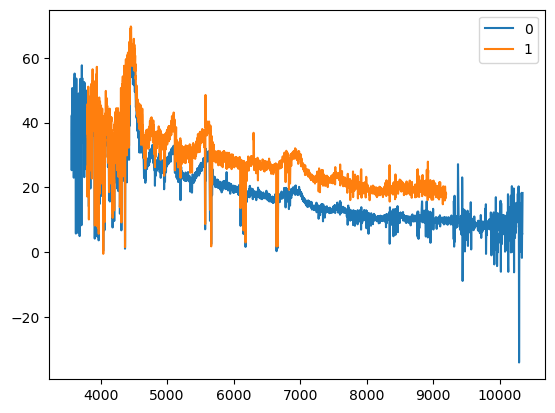

In [66]:
spec.select=0
plt.plot(spec.wavelength,spec.flux,label='0')
spec.select=1
plt.plot(spec.wavelength,spec.flux,label='1')
spec.select=2
#plt.plot(spec.wavelength,spec.flux)
#plt.ylim(-1,3)
plt.legend()


In [8]:
snr_file = rpath + 'dr14_median_snr.pckl'
median_snr = pickle.load(open(snr_file,'rb'))
index_snr = np.array([i for i,snr in enumerate(median_snr) if snr>=20])
meta_snr = [median_snr[i] for i in index_snr]

crossmatch = set(index_snr).intersection(index_z)
index_final = list(crossmatch)
index_final.sort()

snr_final = [median_snr[idx] for idx in index_final]
z_final = [meta[idx][6] for idx in index_final]
print(len(snr_final),len(z_final))

meta_final = igmsp['BOSS_DR14'].meta_from_ids(np.array(index_final), first=False)

meta_final[0:3]

coords = SkyCoord(meta_final[1000][0], meta_final[1000][1],unit='deg')
print(coords)
meta_sing = igmsp.meta_from_position(coords, 1*u.arcsec)
print('-----')
spec = igmsp.spectra_from_meta(meta_sing)
print('Nspec = {:d}'.format(spec.nspec))
spec.wavelength[1]
#spec.select = 0

#fig, ax = plt.subplots()
#fig.set_figwidth(15)
#ax.plot(spec.wavelength,spec.flux, lw=1,c='black')
#ax.plot(z_final,snr_final,'.')
#spectra = igmsp.spectra_from_meta(meta_final)

2502 2502
<SkyCoord (ICRS): (ra, dec) in deg
    (170.6353807, 19.76280377)>
Your search yielded 1 match[es] within radius=1 arcsec
-----
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Nspec = 2


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


<Quantity 3603.29638672 Angstrom>

In [30]:
a = [1,2,3,4,5,6,7,8]
a[3:6]


[4, 5, 6]

In [95]:
#count = []
#for object in meta_final:
#    coords = SkyCoord(object[0], object[1],unit='deg')
#    meta_sing = igmsp.meta_from_position(coords, 1*u.arcsec)
#    spec = igmsp.spectra_from_meta(meta_sing)
#    count.append(spec.nspec)
counts, bins = np.histogram(count)
#print(counts)
#bins = [0,1,2,3,4,5,6,7,8,9]
#counts = [ 857 ,1483 , 113  , 23  ,     14  ,  4  ,  4  ,  3   , 1]
#plt.stairs(counts, bins)
plt.hist(count)
plt.yscale('log')
#print(count)

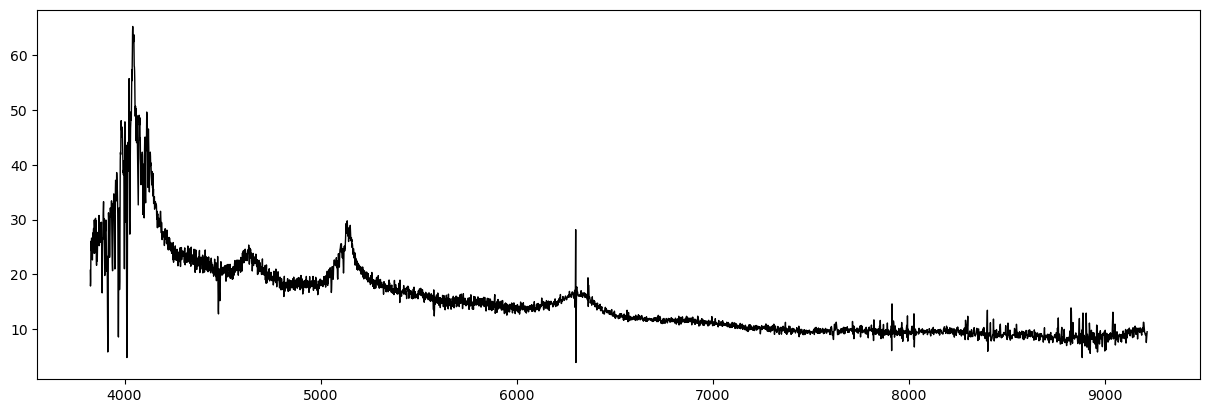

In [65]:
spec.select = 1

fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(spec.wavelength,spec.flux, lw=1,c='black')

In [10]:
meta[46788]


<Row index=46788>
 RA_GROUP DEC_GROUP THING_ID PLATE  MJD  FIBERID    Z     Z_ERR         Z_VI              Z_PIPE             Z_PIPE_ERR      ZWARNING   Z_PCA        Z_PCA_ER            Z_MGII       BOSS_TARGET1 ANCILLARY_TARGET1 ANCILLARY_TARGET2 EBOSS_TARGET0 EBOSS_TARGET1 EBOSS_TARGET2 N_SPEC_SDSS N_SPEC_BOSS N_SPEC PLATE_DUPLICATE MJD_DUPLICATE FIBERID_DUPLICATE  BI_CIV ERR_BI_CIV RUN_NUMBER COL_NUMBER FIELD_NUMBER                 PSFFLUX                              IVAR_PSFFLUX                               PSFMAG                                  ERR_PSFMAG                    MI                      GAL_EXT                  RASS_COUNTS RASS_COUNTS_SNR SDSS2ROSAT_SEP FLUX_0.2_2.0keV FLUX_0.2_2.0keV_ERR FLUX_2.0_12.0keV FLUX_2.0_12.0keV_ERR FLUX_0.2_12.0keV FLUX_0.2_12.0keV_ERR LUM_0.2_12.0keV SDSS2XMM_SEP GALEX_MATCHED        FUV              FUV_IVAR             NUV              NUV_IVAR        JMAG  ERR_JMAG   JSNR  JRDFLAG   HMAG  ERR_HMAG   HSNR  HRDFLAG   KMAG  ERR_KMAG   KSNR  KRDFLAG SDSS2MASS_SEP  W1MAG  ERR_W1MAG       W1SNR         W1CHI2  W2MAG       ERR_W2MAG       W2SNR   W2CHI2  W3MAG  ERR_W3MAG       W3SNR         W3CHI2  W4MAG  ERR_W4MAG       W4SNR         W4CHI2 SDSS2WISE_SEP UKIDSS_MATCHED  YFLUX  YFLUX_ERR  JFLUX  JFLUX_ERR  HFLUX  HFLUX_ERR  KFLUX  KFLUX_ERR FIRST_MATCHED FIRST_FLUX FIRST_SNR SDSS2FIRST_SEP ORIG_ID    R    zem_GROUP        sig_zem        IGM_ID  NPIX  WV_MIN  WV_MAX GROUP_ID  EPOCH      SDSS_NAME      SPECTRO SOURCE_Z SPECTRO_DUPLICATE RERUN_NUMBER OBJ_ID CC_FLAGS PH_FLAGS flag_zem CAT   DATE-OBS  INSTR DISPERSER TELESCOPE  STYPE         SPEC_FILE        
 float64   float64   int32   int16 int32  int16  float64 float64      float64            float64              float64         int16    float64       float64            float64          int64           int64             int64           int64         int64         int64        int16       int16    int16     int32[51]      int32[51]       int32[51]     float64  float64     int16      int16       int16                    float64[5]                             float64[5]                              float64[5]                                float64[5]                 float64                   float64[5]                  float64       float64        float64         float64           float64           float64            float64            float64            float64            float64       float64       float32         float64            float64            float64            float64       float64 float64  float32  int16  float64 float64  float32  int16  float64 float64  float32  int16     float64    float64  float64       float64       float64 float64       float64       float64 float64 float64  float64       float64       float64 float64  float64       float64       float64    float64       float32     float64  float64  float64  float64  float64  float64  float64  float64      int16      float64    float64     float64      int64  float64  float64         float64        int64  int64 float64 float64  int64   float64       str18          str4    str4        str1[51]         str1      str1    str4     str4     str4   str4   str10     str4    str4     str10     str3           str26          
--------- --------- -------- ----- ----- ------- ------- ------- ------------------ ------------------ --------------------- -------- --------- ------------------ ------------------ ------------ ----------------- ----------------- ------------- ------------- ------------- ----------- ----------- ------ --------------- ------------- ----------------- ------- ---------- ---------- ---------- ------------ --------------------------------------- -------------------------------------- ---------------------------------------- ----------------------------------------- ---------- ----------------------------------------- ----------- --------------- -------------- --------------- ------------------- ---------------- -------------------- ---------------- -----------

In [16]:
meta[154][27]


10207.619

In [9]:
dpath= '/media/bartosz/Volume/BOSS_DR14/data/'

nn = np.loadtxt(dpath + 'nearest_neighbors_nonBALs_2.txt')

idx = nn[:,0]

nn_idx = nn[:,2:7]
#nn0_d,nn1_d,nn2_d,nn3_d,nn4_d,nn5_d = nn[:,8],nn[:,9],nn[:,10],nn[:,11],nn[:,12]
nn_d = nn[:,8:13]


d_mean = np.array([np.mean(d) for d in nn_d])
#Counter([j for i in nn_idx for j in i])

3.2926211607494027
2.894843370402808
3.3662953156318602
2.4431067452999544
2.5490854743088986
2.7303089856018503
2.381585787322435
2.7398096138307544
2.684006693875005
2.9890508037928267
2.884794428492129
2.938879842011463
3.3672769176039354
1.9809897097852482
2.958584055388026
3.0746073254729693
3.070203034943984
3.020589456471529
2.6850994792935063
2.588427866730351
2.458309373801697
2.795218116324117
2.920899323279993
3.246793545243526


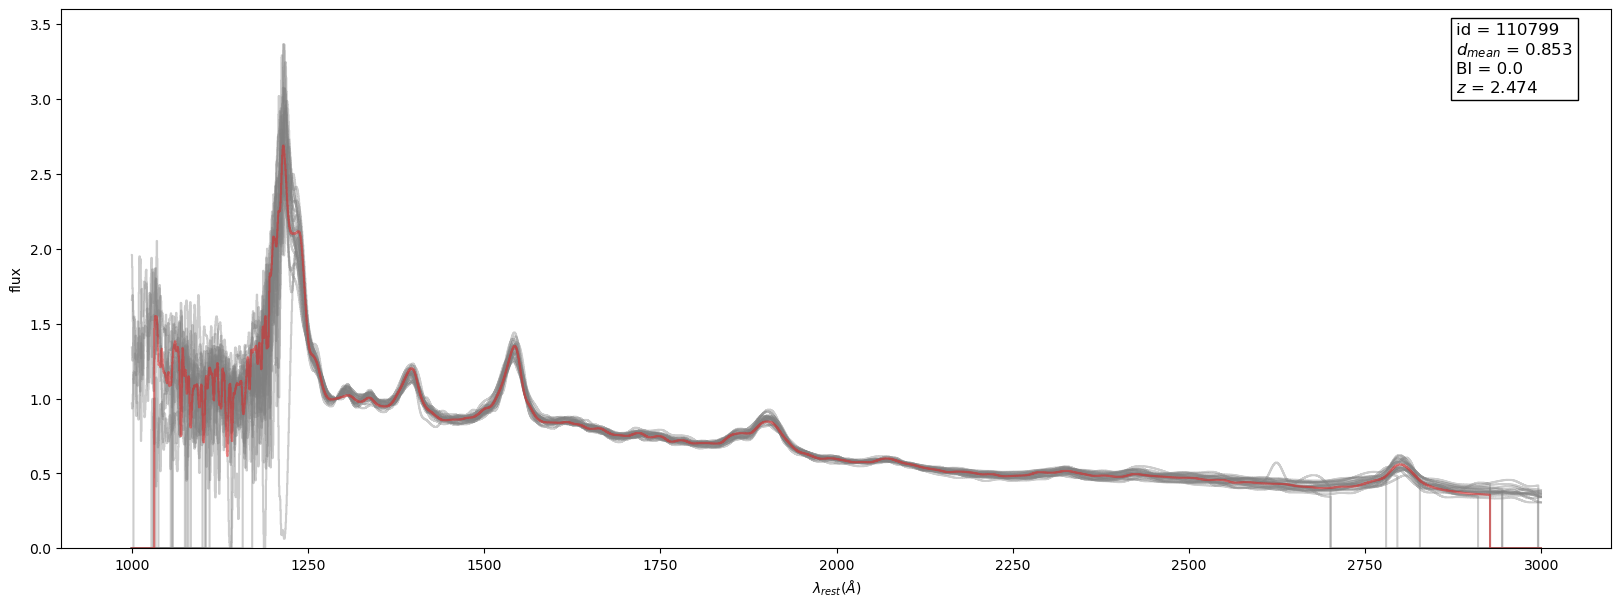

In [46]:
dpath= '/media/bartosz/Volume/BOSS_DR14/data/'

nn = np.loadtxt(dpath + 'nearest_neighbors.txt')

idx = nn[:,0]

nn_idx = nn[:,2:7]

bestN = 110799
bestNNs = [idx[i] for i,nn in enumerate(nn_idx) if bestN in nn]

fig, ax = plt.subplots(figsize=(20,7))

#specfiles = [fname for fname in glob.glob(dpath + 'fits/dpx25/' + '{}_*.txt'.format(index)) for index in bestNNs]
specfiles = [glob.glob(dpath + 'fits/dpx25/' + '{}_*.txt'.format(int(index))) for index in bestNNs]

#print(specfiles)
for fname in specfiles:
    spec = np.loadtxt(*fname)
    wl = spec[:,0]
    flux = spec[:,1]
    #print(wl)
    print(max(flux))
    ax.plot(wl,spec, c='grey', alpha=0.4,drawstyle='steps-mid')

    #plt.show()
    #break

spec = np.loadtxt(dpath+'fits/dpx25/' + '110799_spec-3690-55182-272_0_dpx25.txt')
wl = spec[:,0]
flux = spec[:,1]
ax.plot(wl,spec, c='red', alpha=0.4,drawstyle='steps-mid')
#ax.set_ylim(0.3,1.7)
#ax.set_xlim(1250,2250)
ax.set_ylim(0,3.6)
ax.set_xlabel('$\lambda_{rest} (\AA)$')
ax.set_ylabel('flux')

qdmean=d_mean[399]
z, BI = get_z(meta,bestN), get_BI(meta,bestN)
info = '\n'.join((
    r'id = {}'.format(bestN),
    r'$d_{{mean}}$ = {0:.3f}'.format(qdmean),
    r'BI = {0:.1f}'.format(BI),
    r'$z$ = {0:.3f}'.format(z)))

props = dict(boxstyle='square', facecolor='white')
ax.text(0.9, 0.975, info, transform=ax.transAxes, fontsize=12,
    verticalalignment='top', bbox=props)
plt.savefig('plots/110799_NN.png', format='png')
plt.show()

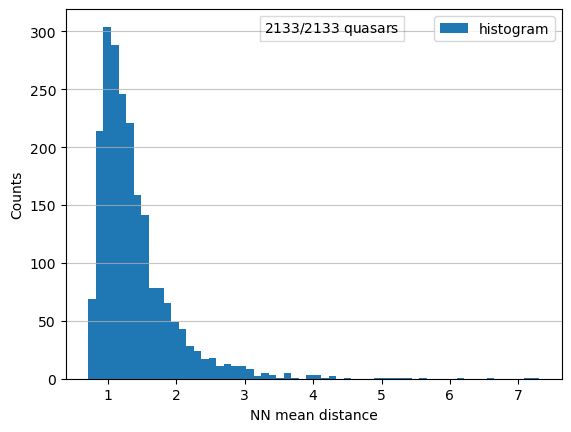

In [11]:
ihist = d_mean <100000
counts,bins= np.histogram(d_mean[ihist],bins=60)

nn1 = nn_d[:,0]
hist1 = nn1 < 10
counts1,bins1 = np.histogram(nn1[hist1],bins=60)


fig, ax = plt.subplots()
#plt.hist(bins[:-1],bins,weights=counts,histtype='step',label='NN mean')
#plt.hist(bins1[:-1],bins1,weights=counts1,histtype='step',label='1st NN')

info = ''.join(
    r'${}/{}$ quasars'.format(np.sum(counts),len(d_mean)))

props = dict(boxstyle='square', facecolor='white', alpha=0.15)
ax.text(0.4, 0.97, info, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

def halfgaussian(x, mean, amplitude, standard_deviation):
    y = np.empty_like(x)
    mask1 = x<0.76
    mask2 = x>=0.76
    y[mask1] = 0
    y[mask2] = amplitude * np.exp( - (x[mask2] - mean)**2 / (2*standard_deviation ** 2))
    return y


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return scipy.stats.poisson.pmf(k, lamb)

#bin_heights, bin_borders = np.histogram(x, bins='auto')
bin_widths = np.diff(bins)
bin_centers = bins[:-1] + bin_widths / 2
t_init = models.Gaussian1D()
fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, bin_centers, counts)

# fit with curve_fit
#parameters, cov_matrix = curve_fit(halfgaussian, bin_centers, counts)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(1, 10)

# plt.plot(
#     x_interval_for_fit,
#     halfgaussian(x_interval_for_fit, *parameters),
#     color='orange',linestyle='-', marker='',
#     label='Fit result',
# )

x_interval_for_fit = np.linspace(bins[0], bins[-1], 10000)
plt.bar(bin_centers, counts, width=bin_widths, label='histogram')
#plt.plot(x_interval_for_fit, t(x_interval_for_fit), label='fit', c='red')
plt.legend()

plt.xlabel('NN mean distance')
plt.ylabel('Counts')
#plt.xlim(0,10)
#plt.yscale('log')

plt.grid(axis='y', alpha=0.75)
#plt.savefig('plots/distr_dmean_nonBALs.png',format='png')
plt.show()

In [214]:
fpath= '/media/bartosz/Volume/BOSS_DR14/data/fits/dpx25/'



for filename in glob.glob(fpath+'57492_*.txt'):
    nn0 = np.loadtxt(filename)[:,1]
    x = np.loadtxt(filename)[:,0]

mask1 = x>1250 
mask2 = x<2250
mask = np.logical_and(mask1,mask2)
for filename in glob.glob(fpath+'30859_*.txt'):
    nn1 = np.loadtxt(filename)[:,1]

for filename in glob.glob(fpath+'378558_*.txt'):
    nn2 = np.loadtxt(filename)[:,1]

for filename in glob.glob(fpath+'288095_*.txt'):
    nn3 = np.loadtxt(filename)[:,1]

for filename in glob.glob(fpath+'174086_*.txt'):
    nn4 = np.loadtxt(filename)[:,1]

for filename in glob.glob(fpath+'231777_*.txt'):
    nn5 = np.loadtxt(filename)[:,1]

np.sqrt(np.sum([f*f for f in nn0[mask]-nn2[mask]]))

1.4320375751637204

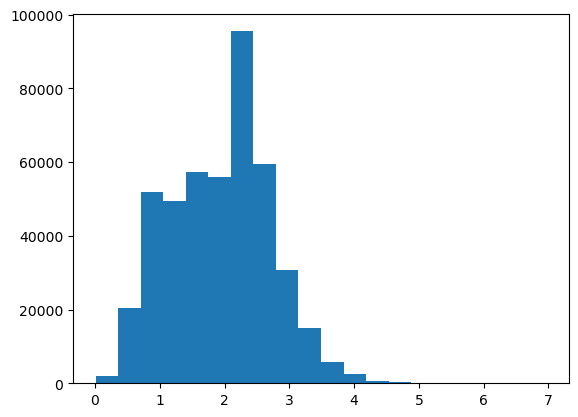

In [105]:
Z = [m[6] for m in meta]# if 0<=m[6]<=5]
len(Z)
Zcounts,Zbins= np.histogram(Z,bins=20)

plt.hist(Zbins[:-1],Zbins,weights=Zcounts)
plt.show()

In [26]:
sum(1 for i in J if not np.isnan(i))

440512

In [34]:
Q = [i for i,m in enumerate(meta) if 0.66<=m[6]<=1.55 and all(j<22 for j in m[34])]
len(Q)

107469

In [87]:
J = [[m[6],m[54]] for m in meta if not np.isnan(m[54])]
Jband = [j for j in J if 0.66<=j[0]<=1.55 and j[1]<22]
jband = [e[1] for e in Jband]
jred = [e[0] for e in Jband]

with open('data/z_Jmag.txt', 'w') as Jsave:
    lst = [jred,jband]
    for x in zip(*lst):
        Jsave.write('{} \t {} \n'.format(*x))
Jsave.close()

len(Jband)

1739

In [88]:
iband = [m[34][3] for i,m in enumerate(meta) if 0.66<=m[6]<=1.55 and m[34][3]<22]
ired = [m[6] for i,m in enumerate(meta) if 0.66<=m[6]<=1.55 and m[34][3]<22]

with open('data/z_imag.txt', 'w') as isave:
    lst = [ired,iband]
    for x in zip(*lst):
        isave.write('{} \t {} \n'.format(*x))
isave.close()
len(iband)

129191

In [5]:
zband = [m[34][4] for i,m in enumerate(meta) if 0.1<=m[6]<=2.1 and m[34][4]<23]
zred = [m[6] for i,m in enumerate(meta) if 0.1<=m[6]<=2.1 and m[34][4]<23]

with open('data/z_zmag_2.txt', 'w') as zsave:
    lst = [zred,zband]
    for x in zip(*lst):
        zsave.write('{} \t {} \n'.format(*x))
zsave.close()
len(zband)

237150

In [33]:
sel = [[1.36 ,   18.852691650390625],
[1.432 ,  19.116455078125],
[0.93537974 , 20.624008178710938],
[0.84656364 , 21.034252166748047],
[1.058345  ,  17.828460693359375],
[1.0724703000000002 , 19.293384552001953],
[0.7883223  , 20.33251190185547],
[1.485 ,  21.397701263427734],
[1.2283605  , 18.967636108398438],
[0.753   ,19.83353614807129],
[1.4477440000000001 , 20.895225524902344],
[0.858 ,  21.715391159057617]]

sel_info=[]
for i,m in enumerate(meta):
    obj = [m[6],m[34][4]]
    if obj in sel:
        RA, DEC, Z, zAB, idx = m[0],m[1],m[6],m[34][4],i
        coords = SkyCoord(RA,DEC,unit='deg')
        sel_info.append([RA, DEC, Z, zAB, idx])

        meta_sing = igmsp.meta_from_position(coords, 1*u.arcsec)
        spec = igmsp.spectra_from_meta(meta_sing)
        
        fig, ax = plt.subplots(figsize=(20,7))
        
        ax.plot(spec.wavelength,spec.flux, lw=2,c='black',drawstyle='steps-mid')
        plt.plot(spec.wavelength,spec.sig,linewidth=1,drawstyle='steps-mid', color='grey')

        info = '\n'.join((
            r'RA = {}'.format(RA),
            r'DEC = {}'.format(DEC),
            r'z = {}'.format(Z),
            r'z AB mag = {}'.format(zAB)))

        props = dict(boxstyle='square', facecolor='lightblue', alpha=0.5)
        ax.text(0.7, 0.95, info, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
        
        plt.savefig('plots/spec{}.png'.format(idx),format='png')
        plt.close()
        

Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Your search yielded 1 match[es] within radius=1 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


In [24]:
with open('data/selection_info.txt', 'w') as zsave:
    lst = sel_info
    for x in lst:
        zsave.write('{} \t {} \t {} \t {} \t {} \n'.format(*x))
zsave.close()

In [20]:
sel_info

[[1.36, 0.005316971570891838, -2.033273291001564, 18.852691650390625, 5],
 [0.93537974, 0.006143972596646563, 21.276711551497108, 20.624008178710938, 8],
 [0.84656364,
  0.008585837127839113,
  19.404917448393988,
  21.034252166748047,
  18],
 [0.7883223, 0.010430687323889742, 2.3052534587317464, 20.33251190185547, 24],
 [1.485, 0.013630253212241428, 0.1924486786871756, 21.397701263427734, 30],
 [1.4477440000000001,
  0.01592769507868752,
  25.0952833873808,
  20.895225524902344,
  36],
 [0.858, 0.01994309883036749, -0.90963485118292, 21.715391159057617, 44],
 [1.432, 0.038657366027280204, 2.1061119205856427, 19.116455078125, 91],
 [1.0724703000000002,
  0.04206465365706436,
  19.7915089514002,
  19.293384552001953,
  101],
 [0.753, 0.04480456261075005, -5.722222936052879, 19.83353614807129, 110],
 [1.058345, 0.10294420484319744, 5.973508404292357, 17.828460693359375, 270],
 [1.2283605, 0.1050844158781956, 5.7718080767970354, 18.967636108398438, 275]]

In [62]:
nonzeros = [i for i in zband if i!=0]
len(nonzeros)
inonzeros= [i for i in iband if i!=0]
len(inonzeros)

128911

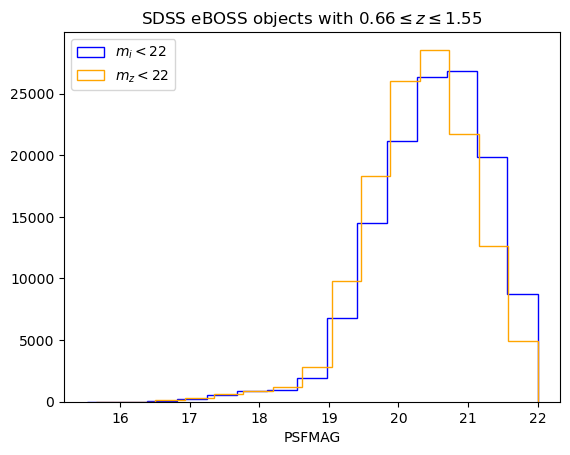

In [77]:
fig, ax = plt.subplots()

counts, bins = np.histogram(nonzeros,bins=15)
icounts,ibins= np.histogram(inonzeros,bins=15)

ax.hist(ibins[:-1],ibins,weights=icounts,color='blue',histtype='step',label='$m_{i}<22$')
ax.hist(bins[:-1], bins, label='$m_{z}<22$', weights=counts, histtype='step', color='orange')

#plt.hist(nonzeros,label='SDSS EBOSS objects with $z_{mag}<22$')
plt.xlabel('PSFMAG')
plt.ylabel('')
plt.legend()
plt.title('SDSS eBOSS objects with $0.66 \leq z \leq 1.55$')
plt.savefig('plots/z_i_band_hist.png',format='png')
plt.show()

In [41]:
for i,m in enumerate(meta):
    if 0.66<=m[6]<=1.55 and np.mean(m[34])<22:
        break;
meta[i][34]

array([20.59112358, 19.9791832 , 19.22360611, 18.95267105, 18.85269165])

In [6]:
meta = igmsp['BOSS_DR14'].meta
qdict = { 'Z':(2,3)}
print(len(meta))
#print(meta[1][81])
#meta[0:10]
#spectra = igmsp.spectra_from_meta(meta)
qmeta = igmsp.query_meta(qdict)
qmeta[0:3]
#len(qmeta)

#snr_file = rpath + 'dr14_median_snr.pckl'
#median_snr = pickle.load(open(snr_file,'rb'))
#len(median_snr)
#index=[]
#for i,snr in enumerate(median_snr):
#    if snr >= 20:
#        index.append(i)

#meta_z = [meta[j] for j in index]


#spectra = igmsp.spectra_from_meta(qmeta)

446844


<Table length=3>
 RA_GROUP DEC_GROUP  THING_ID PLATE  MJD  FIBERID ... INSTR DISPERSER TELESCOPE  STYPE         SPEC_FILE           GROUP  
 float64   float64    int32   int16 int32  int16  ...  str4    str4     str10     str3           str26              str9  
--------- --------- --------- ----- ----- ------- ... ----- --------- ---------- ----- ------------------------- ---------
  0.00190  17.77374 268270422  7596 56945     162 ...  BOSS      BOTH SDSS 2.5-M   QSO spec-7596-56945-0162.fits BOSS_DR14
  0.00238   5.94190 163544156  8740 57367     694 ...  BOSS      BOTH SDSS 2.5-M   QSO spec-8740-57367-0694.fits BOSS_DR14
  0.00276  14.97468 244864389  6177 56268     595 ...  BOSS      BOTH SDSS 2.5-M   QSO spec-6177-56268-0595.fits BOSS_DR14

In [43]:
a = [3,7,1,6,2,3,7,9,4,5,1]
b = [a[i] for i in [1,4,6,7]]
b
index = [a.index(x) for x in b]
len(index) != len(set(index))

True

In [9]:
qso1, qso2, qso3 = [5852,56034,900], [6460,56334,170], [6425,56298,840]
pos1, pos2, pos3 = ['123056.96+175139.5'], [' 101003.95+332625.6'], ['103411.89+234525.3']
#pos=np.array(['123056.96+175139.5', '101003.95+332625.6', '103411.89+234525.3'])
qdict = dict(SPECTRO='BOSS')

In [10]:
#test = igmsp.meta_from_position(pos1, 1*u.arcsec)
spec, meta = igmsp.spectra_from_coord(pos1, meta_query=qdict)

Your search yielded 1 match[es] within radius=0.5 arcsec
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Text(0.62, 0.95, 'thing_ID: 268645346\nplate: 5852\nmjd: 56034\nfiber: 900')

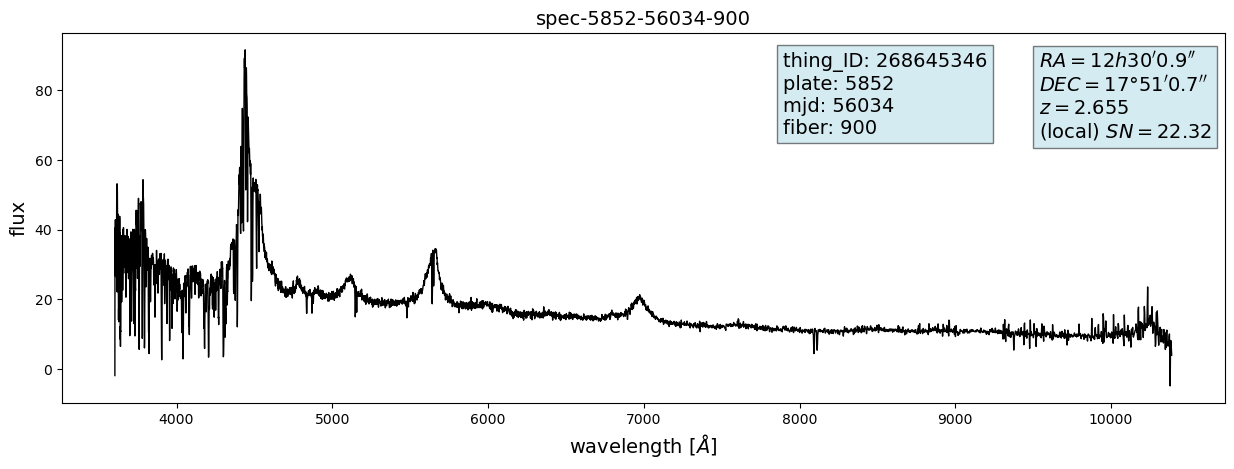

In [11]:
obj = meta[0]

array_wl,array_flux,array_sig=spec.wavelength,spec.flux,spec.sig
plate,mjd,fiber = obj[3],obj[4],obj[5]
ra,dec,z=obj[0],obj[1],obj[6]
s2n=spec.get_local_s2n(spec.wavelength[2250],npix=4581)[0]
thing_id = obj[2]
file_save='spec-{}-{}-{}'.format(plate,mjd,fiber)
f=open(rpath + 'data/' + file_save + '.txt','w')
for j in range(len(array_wl)):
    wl,flux,sig=array_wl[j],array_flux[j],array_sig[j]
    f.write('{}\t{}\t{}\n'.format(wl,flux,sig))
f.close()

fig, ax = plt.subplots()

ax.plot(array_wl,array_flux, lw=1,c='black')
ax.set_title('{}'.format(file_save), fontsize=14)
ax.set_xlabel('wavelength $[\AA]$',fontsize=14)
ax.set_ylabel('flux',fontsize=14)
fig.set_figwidth(15)
info1 = '\n'.join((
    r'$RA= {}$'.format(degtohms(ra)),
    r'$DEC={}$'.format(degtodegms(dec)),
    r'$z={0:.3f}$'.format(z),
    r'(local) $SN={0:.2f}$'.format(s2n)))
info2 = '\n'.join((
    r'thing_ID: {}'.format(thing_id),
    r'plate: {}'.format(plate),
    r'mjd: {}'.format(mjd),
    r'fiber: {}'.format(fiber)))

props = dict(boxstyle='square', facecolor='lightblue', alpha=0.5)
ax.text(0.84, 0.95, info1, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.text(0.62, 0.95, info2, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
#plt.savefig(rpath + 'plots/{}.png'.format(file_save), format='png')
#plt.close()

In [12]:
spec.wavelength[1000]
spec.get_local_s2n(spec.wavelength[3000],npix=4581)

(22.312847, 6.605403)

In [13]:
len(spec.wavelength)


4599

In [14]:
import pickle

In [21]:
snr_file = rpath + 'dr14_median_snr.pckl'
median_snr = pickle.load(open(snr_file,'rb'))
len(median_snr)
i=0
for o in median_snr:
    if o>=20:
        i+=1
i

7847

In [27]:
a = [1,2,3,4,5,6,7]
b = [0,3,5]
c = [a[i] for i in b]
c

[1, 4, 6]

In [69]:
meta[1][56]
i=0
j=0
for o in meta:
#    if math.isnan(o[56]):
#        i+=1
    if o[56] >= 20:
        if o[6] >=2 and o[6] <=3:
        #print(o[56])
            j+=1
        
    else: i+=1
print(j)

38


In [41]:
ID ,info = [],[]
ra, dec = [],[]
for row in meta:
    if row[6] >= 2 and row[6] <= 3:
        if row[81] >= 20:
            plate = row[3]
            mjd = row[4]
            fiber = row[5]
            #name = row[0]
            ra.append(row[0])
            dec.append(row[1])
            redshift = row[6]
            #sn = row[10]
            #ID.append([plate, mjd, fiber])
            #info.append([ra, dec, redshift])

print(len(ra))

9


In [30]:
coord = SkyCoord(ra,dec,unit='deg')
coord[0:10]

<SkyCoord (ICRS): (ra, dec) in deg
    [(0.0073623 ,  -7.48592689), (0.03118942,  11.70188636),
     (0.03908585,  13.93845165), (0.05682287,  -2.17207369),
     (0.06036964, -10.75848229), (0.0626618 ,   6.74939813),
     (0.09558287,  -2.45457676), (0.12178082,   5.82018859),
     (0.12769617,  -6.68335491), (0.13040665,  -7.05327717)]>

In [55]:
#qdict = {'zem': (2.,3.), 'STYPE': 'QSO'}
#matches, sub_cat, IDs = igmsp.qcat.query_coords(coord,'QSO','BOSS_DR14')

In [22]:
#meta23 = igmsp['BOSS_DR14'].meta_from_ids(IDs,first=False)
#meta23[0][66

NameError: name 'IDs' is not defined

In [31]:
#spectra = igmsp.spectra_from_meta(meta23)
spec, meta= igmsp.spectra_in_group(coord[0:10],'BOSS_DR14')

Your search yielded 10 matches in the catalog from 10 input coordinates
Final query yielded 10 matches with group meta data.
Staged 10 spectra totalling 0.0007456 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


In [32]:
sp = spec.copy()
sp.flux

<Quantity [-14.447938 ,  -2.4819846,  16.477226 , ...,   9.444257 ,
             2.101464 ,  -9.650521 ]>

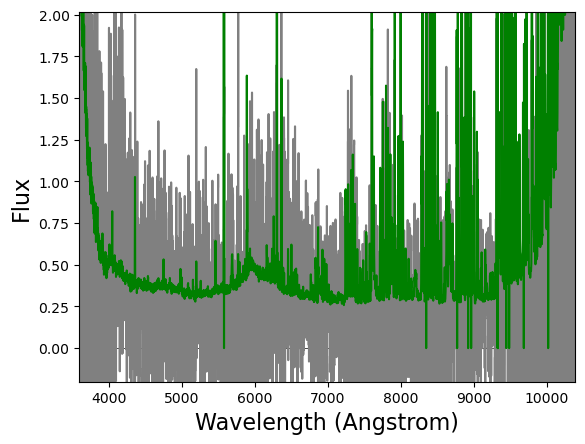

In [44]:
sp.select=3
sp.plot()
#sp.write('data/test.fits')

In [9]:
xpath = '/media/bartosz/Volume/XQR30/XQR30_latest/'



fits_image_filename = fits.util.get_testdata_filepath('test0.fits')              #xpath + 'J0923+0402/J0923+0402_NIR.fits'

hdul = fits.open(xpath + 'J0923+0402/J0923+0402_stitched_spec.fits')
#hdul.header

AttributeError: 'HDUList' object has no attribute 'header'

In [3]:
hdul.info()

Filename: /media/bartosz/Volume/XQR30/XQR30_latest/J0923+0402/J0923+0402_stitched_spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1                1 BinTableHDU     47   42538R x 5C   [D, D, D, D, D]   


In [4]:
hdul.close()

In [8]:
exfile = xpath + 'J1212+0505 (PSOJ183+05)/J1212+0505_rebinned_50kms_spec.fits'


flist = [f for f in glob.glob(xpath + '*/*_rebinned_50kms_spec.fits')]

with fits.open(exfile) as hdul:

    data = hdul[1].data

print(data)

[( 550.6073132 ,  550.6073132 ,  550.65323082,  1.90523154e-17, 0.00000000e+00)
 ( 550.69915227,  550.65323082,  550.74507755,  6.01030434e-18, 7.54116148e-18)
 ( 550.79100666,  550.74507755,  550.8369396 , -8.51720939e-18, 7.66357611e-18)
 ...
 (2274.47193893, 2274.28227629, 2274.66161738,  2.46676477e-18, 6.60417667e-19)
 (2274.85131165, 2274.66161738, 2275.04102174,  1.76323956e-18, 8.33215886e-19)
 (2275.23074765, 2275.04102174, 2275.23074765,  2.63531572e-18, 1.42062322e-18)]


8508
8465


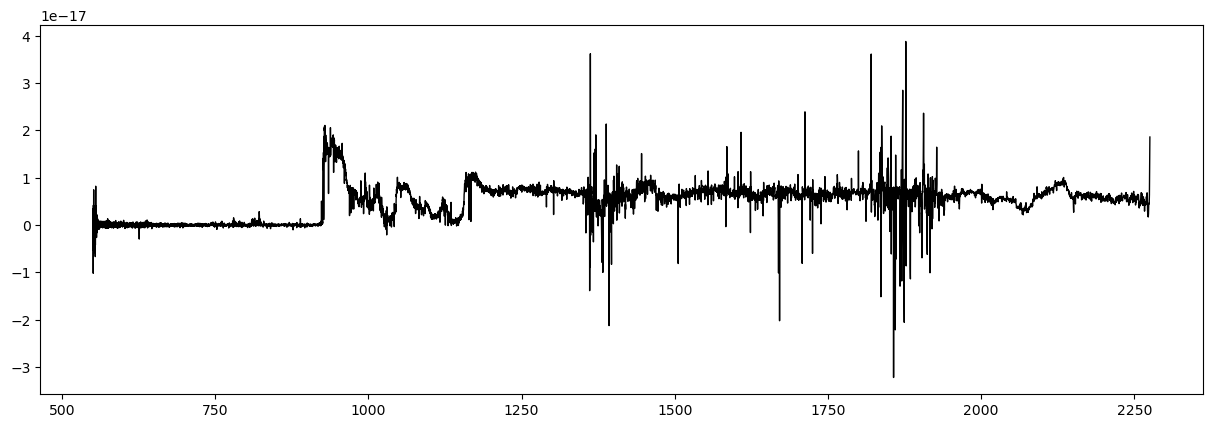

8508
8508


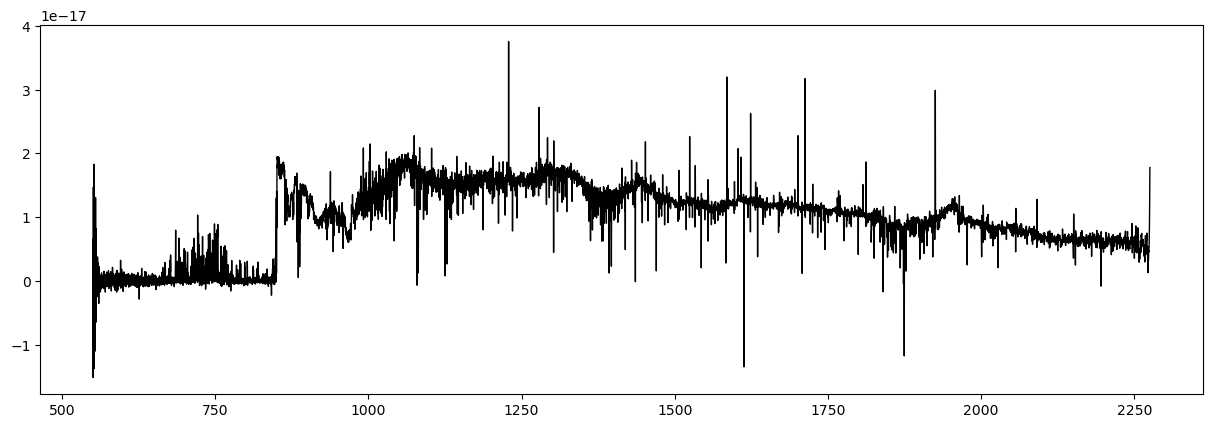

8508
8505


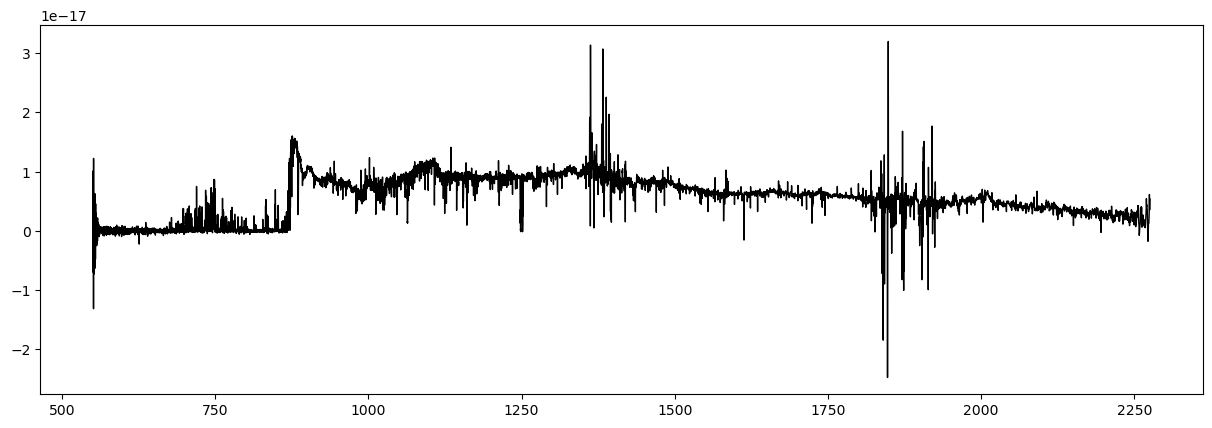

8508
8492


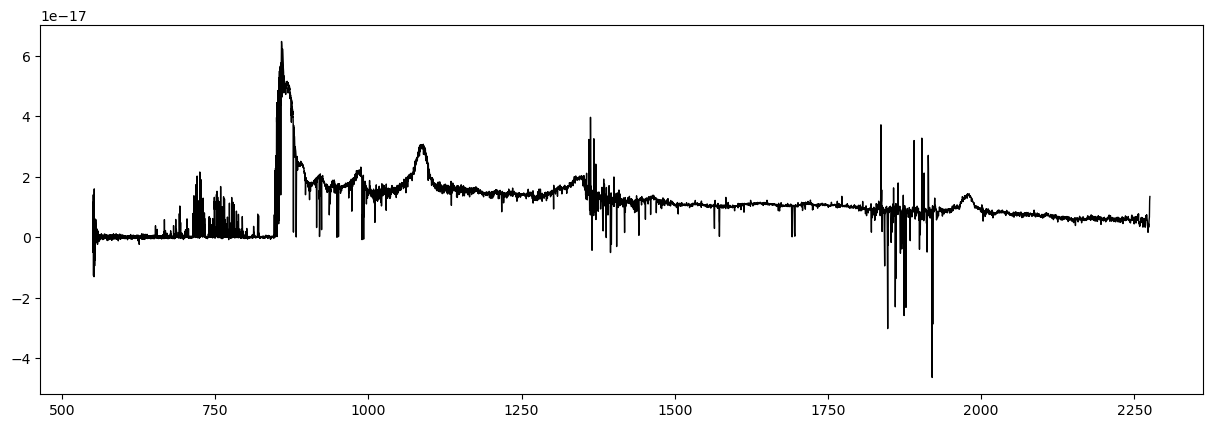

8508
8485


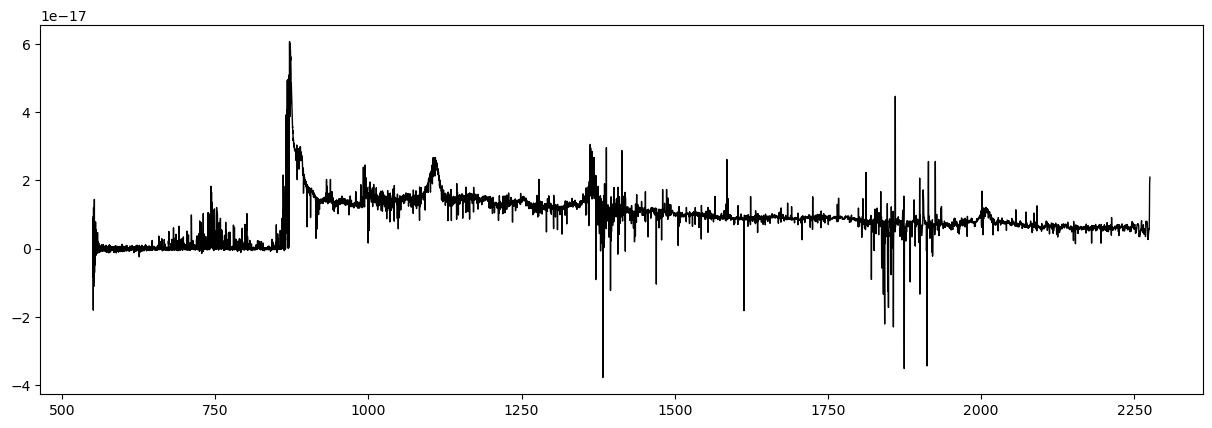

8508
8504


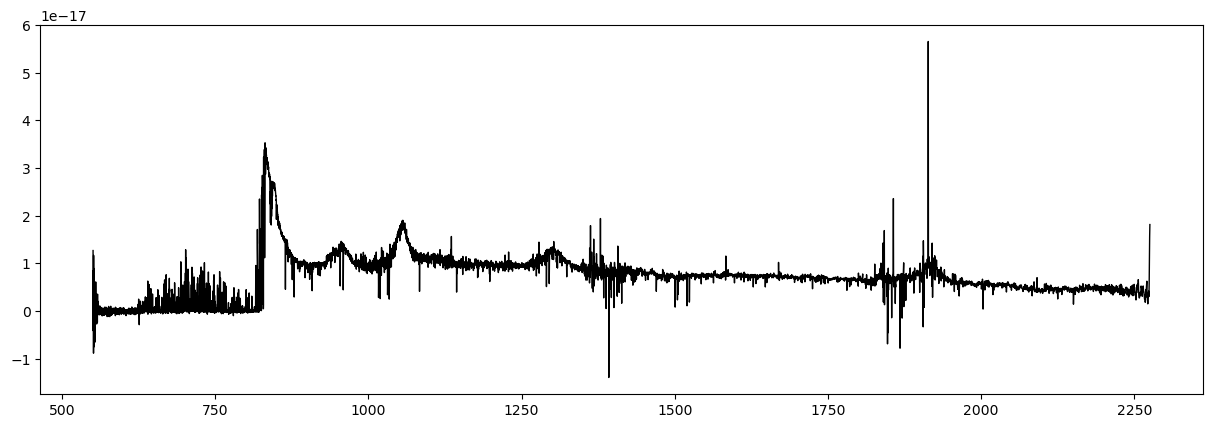

8508
8508


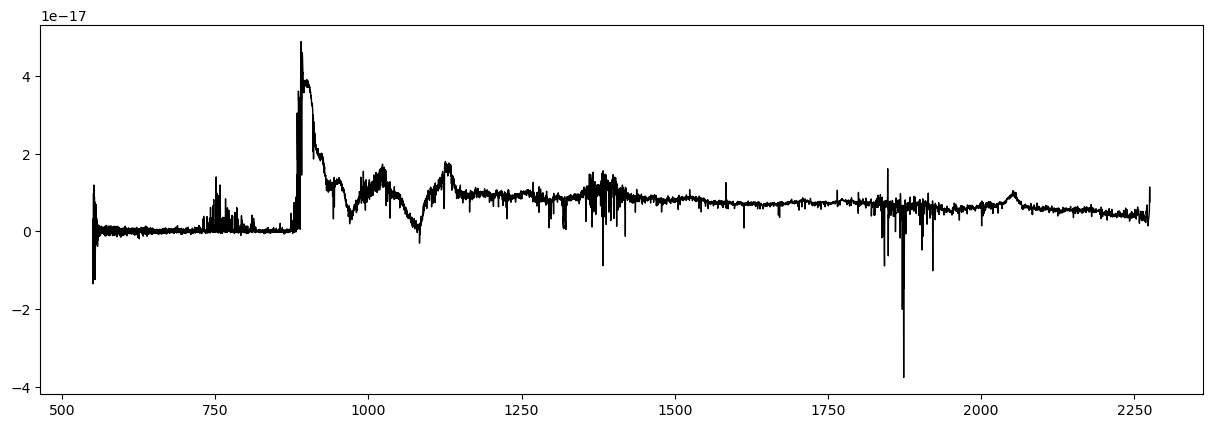

8508
8470


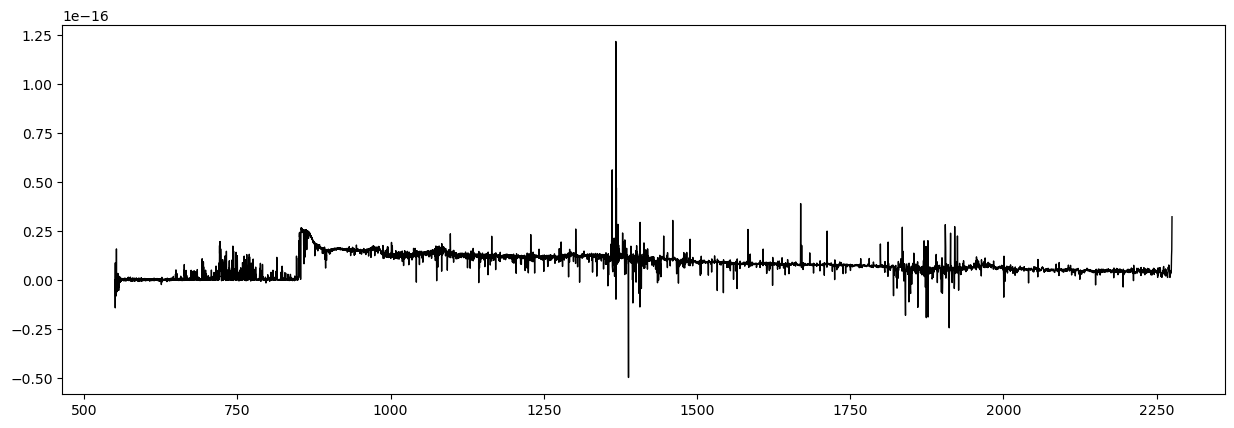

8508
8506


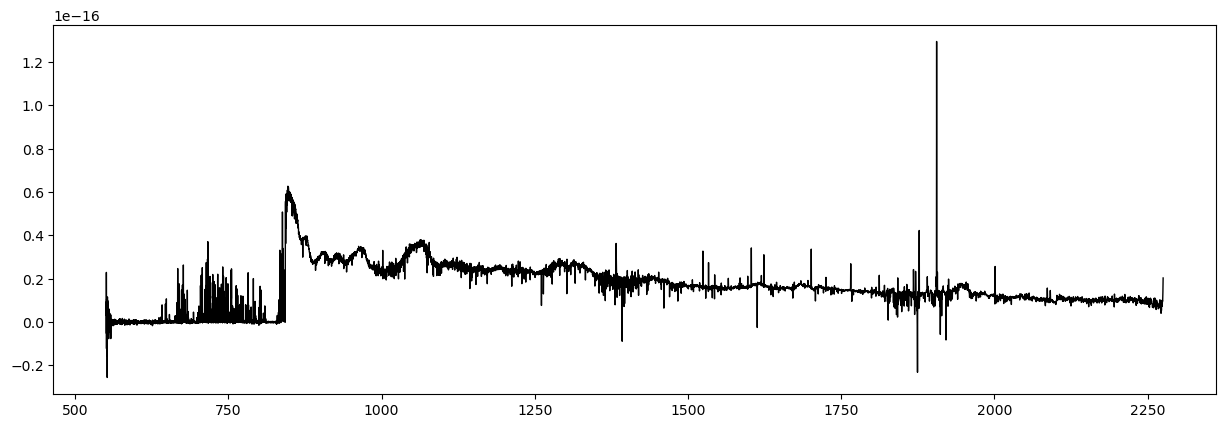

8508
8477


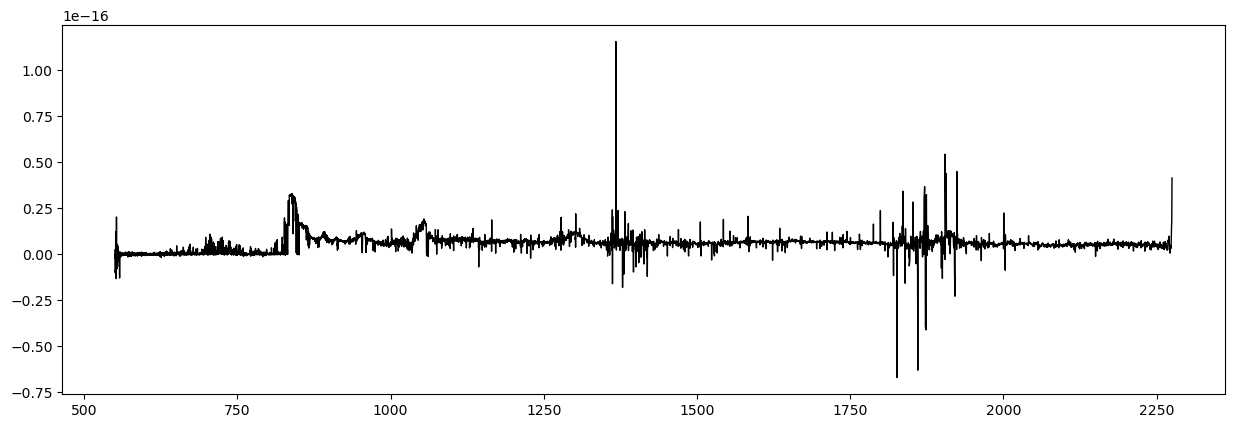

8508
8503


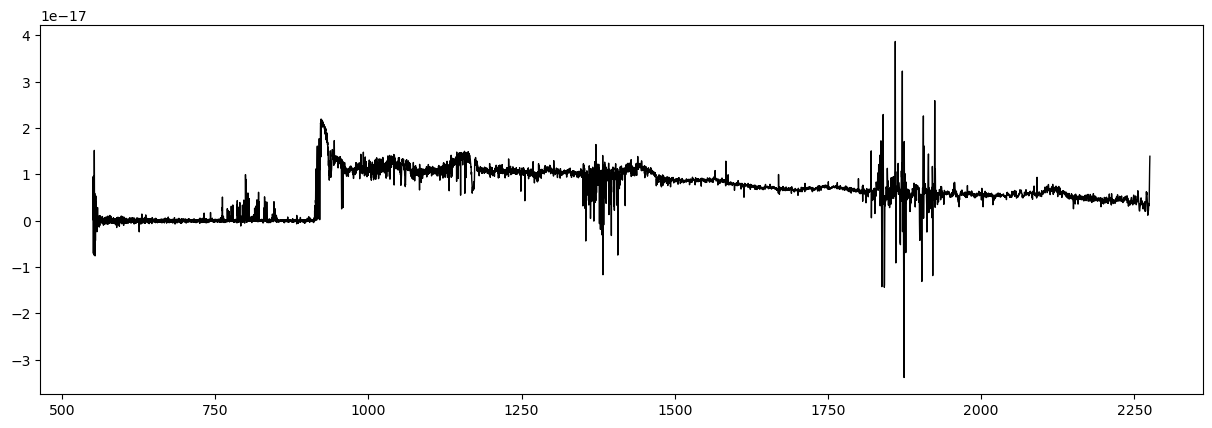

8508
8470


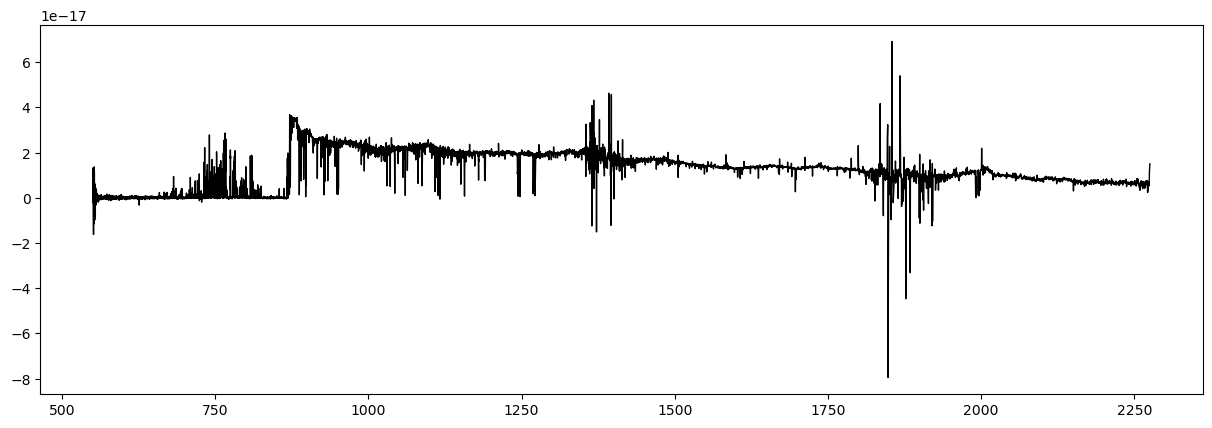

8508
8508


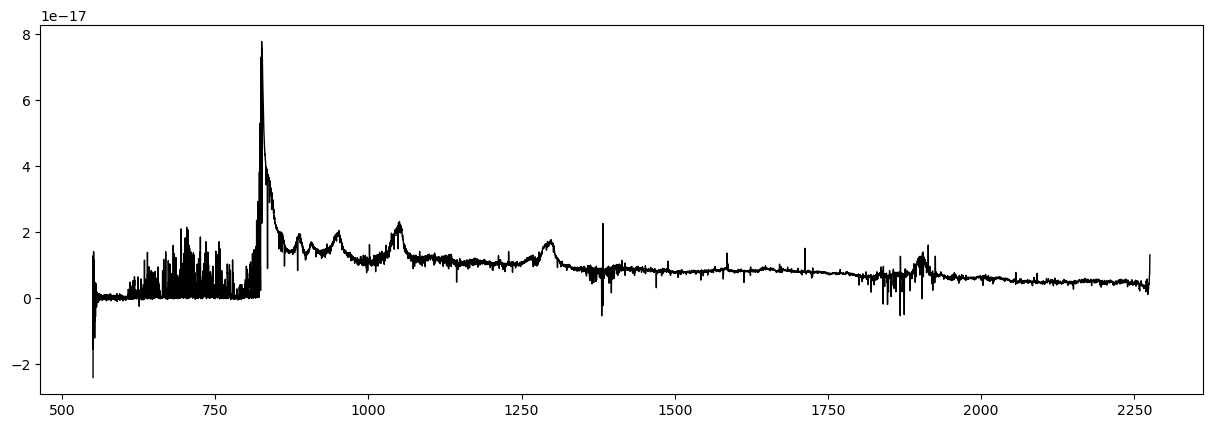

8508
8508


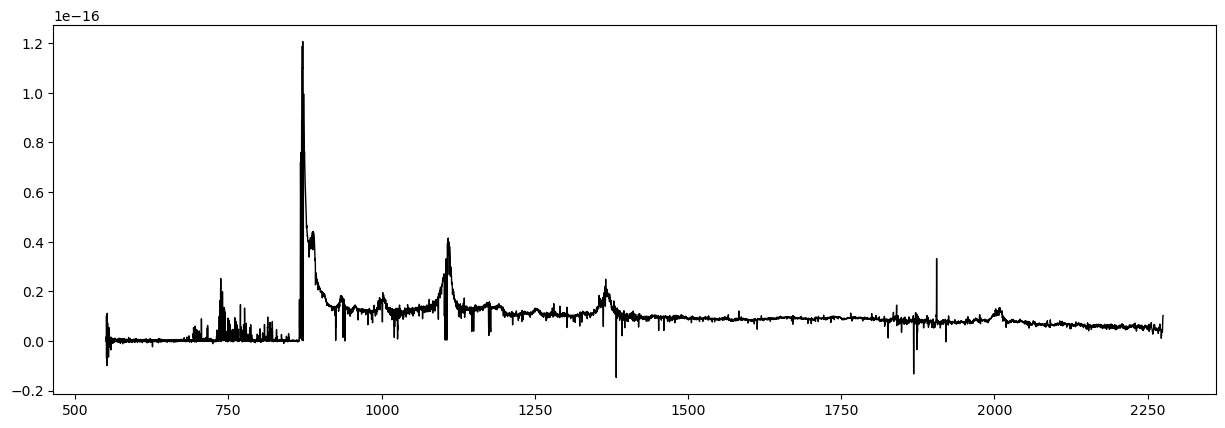

8508
8466


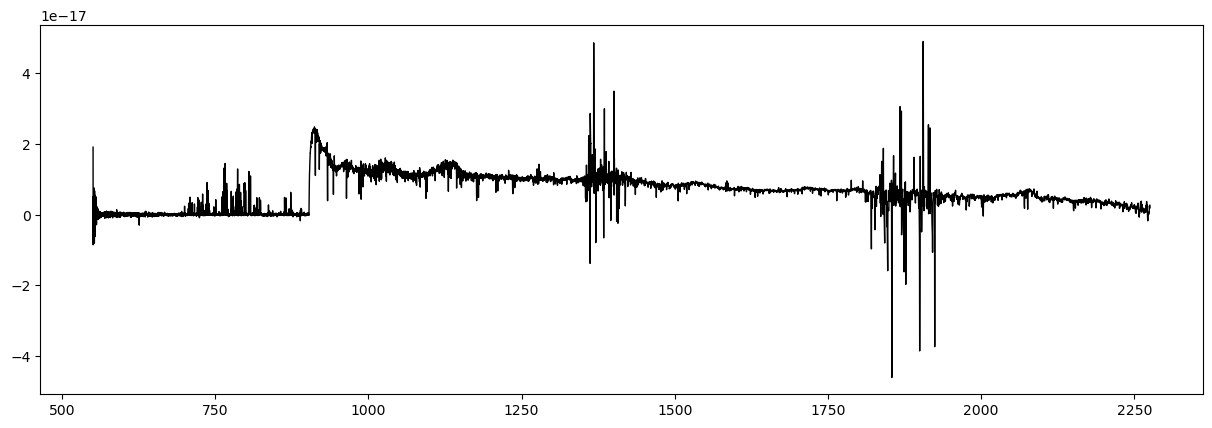

8508
8501


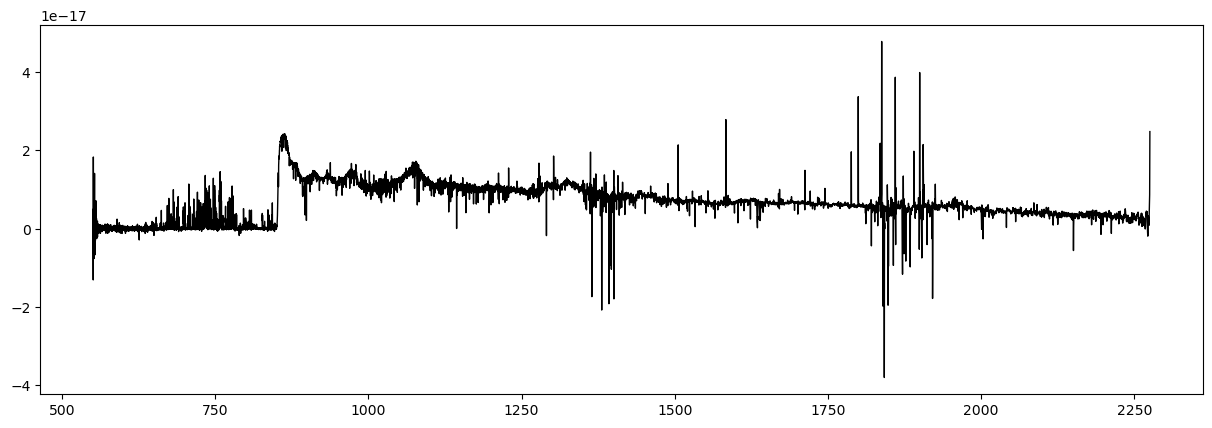

8508
8504


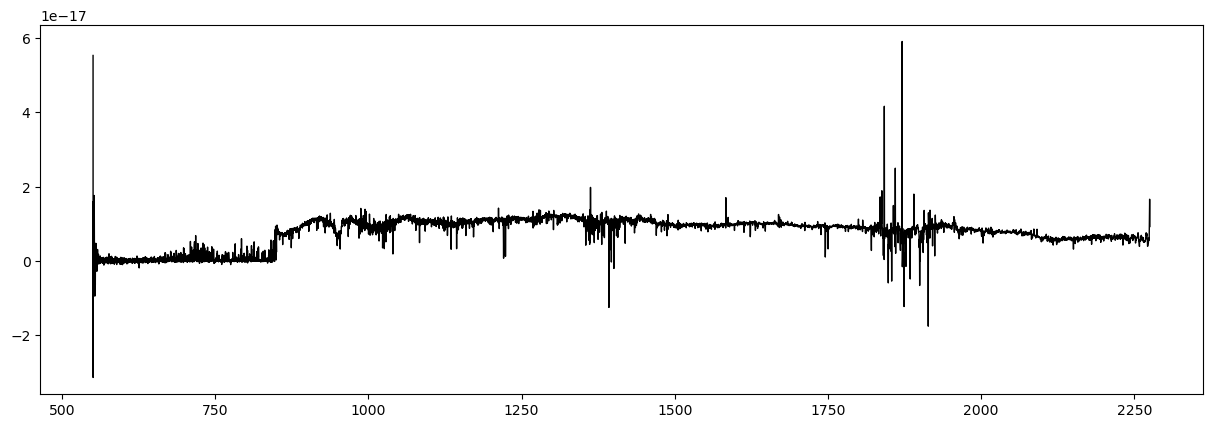

8508
8195


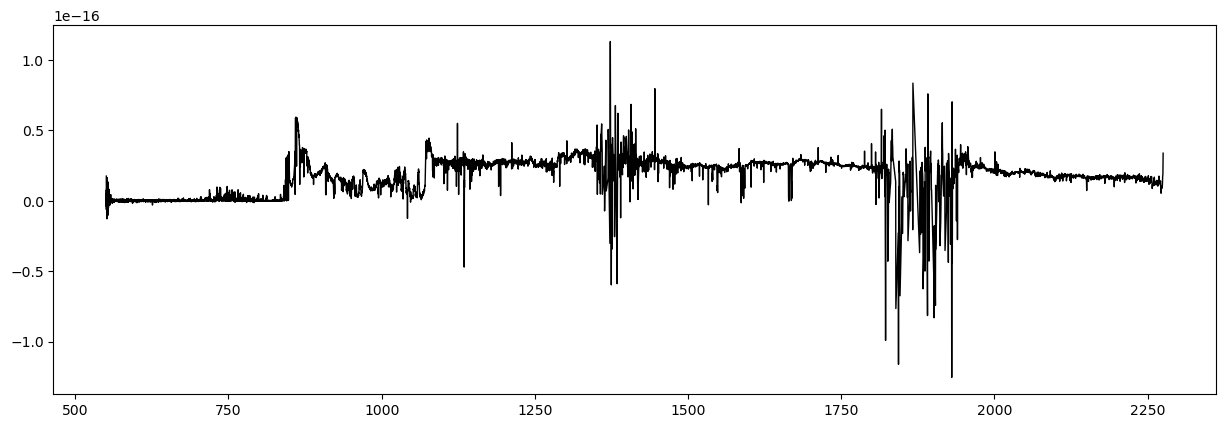

8508
8456


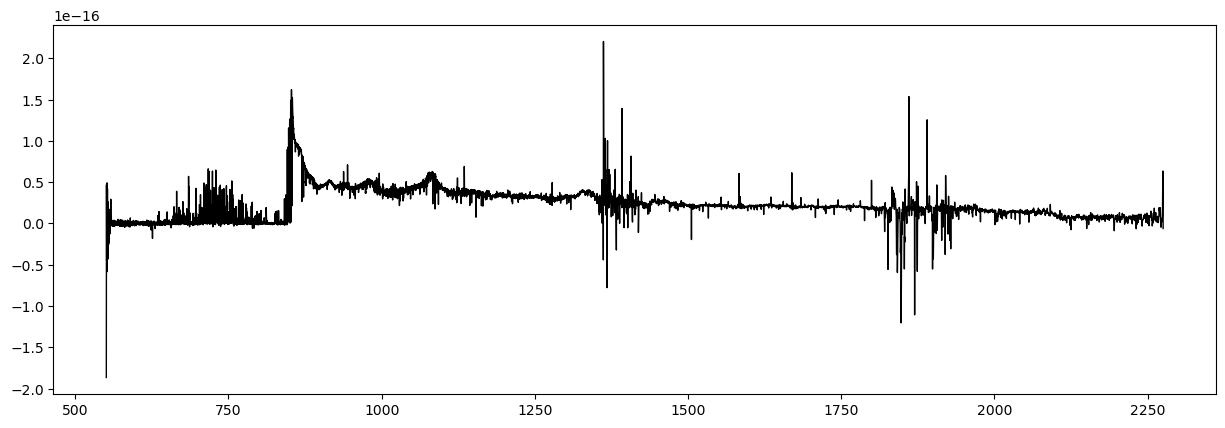

8508
8481


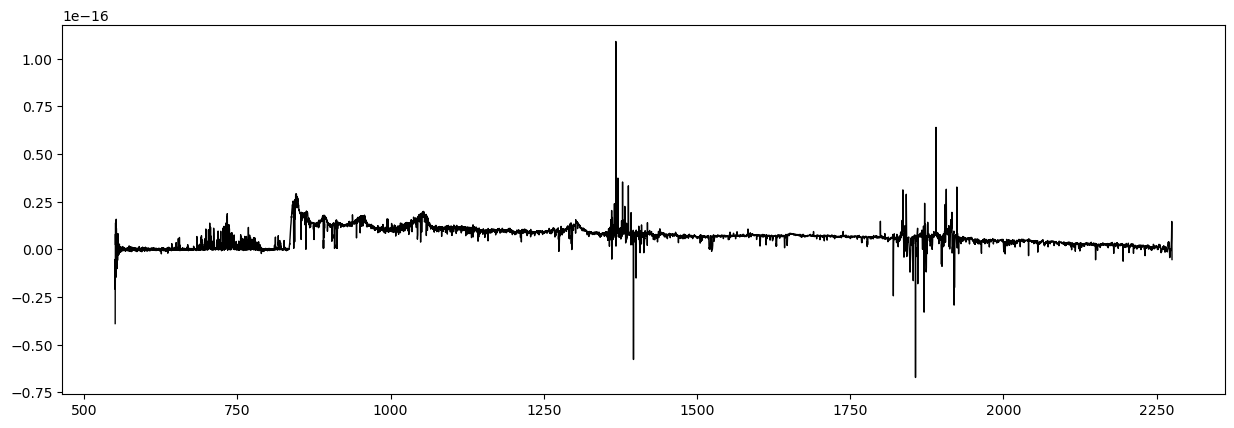

8508
8497


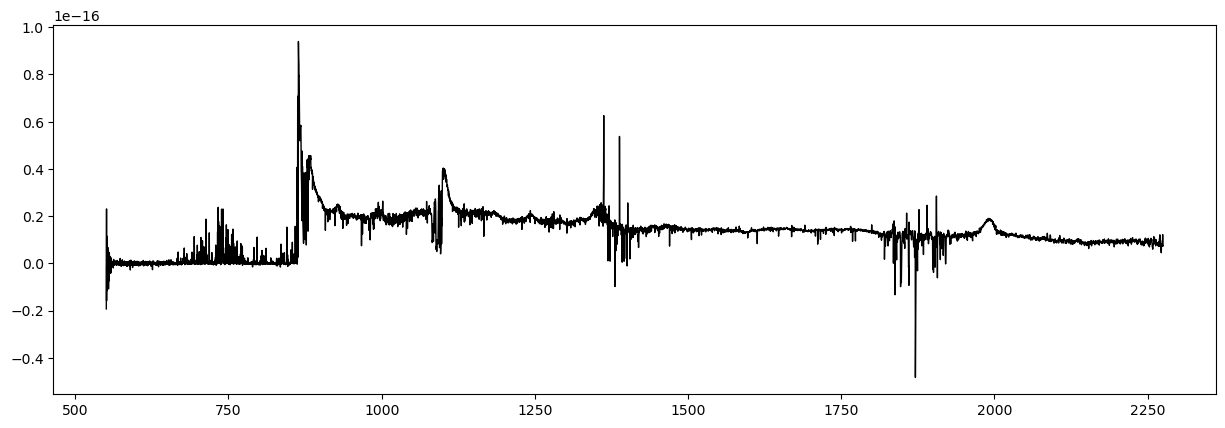

8508
8505


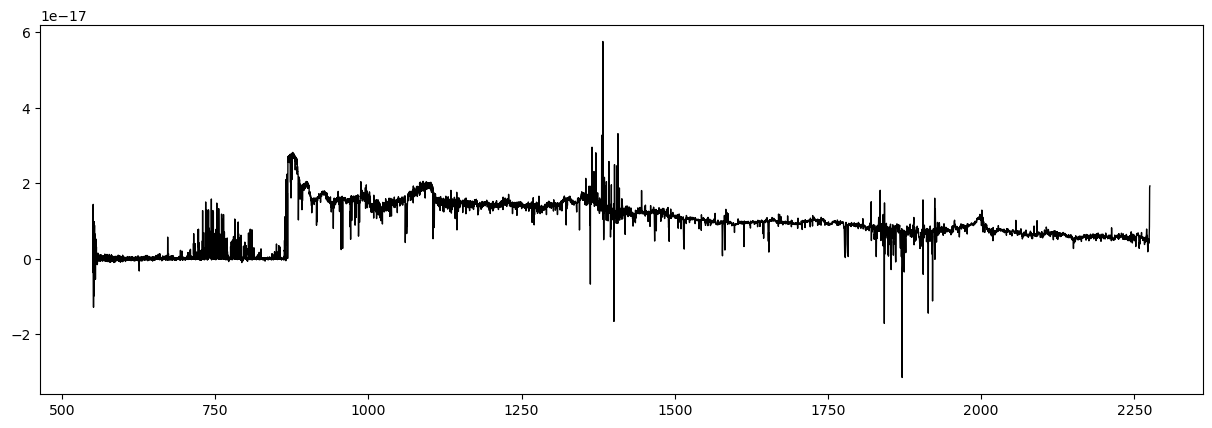

8508
8466


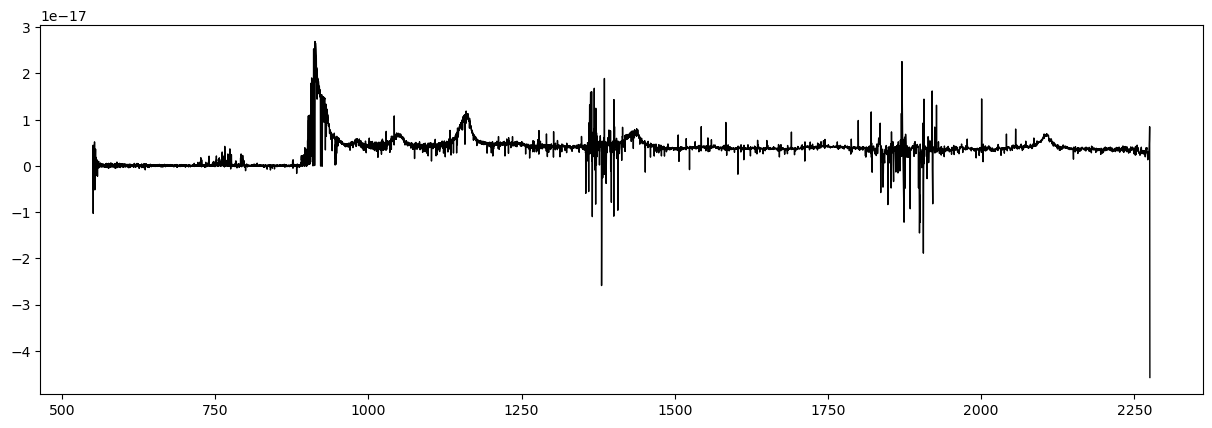

8508
8397


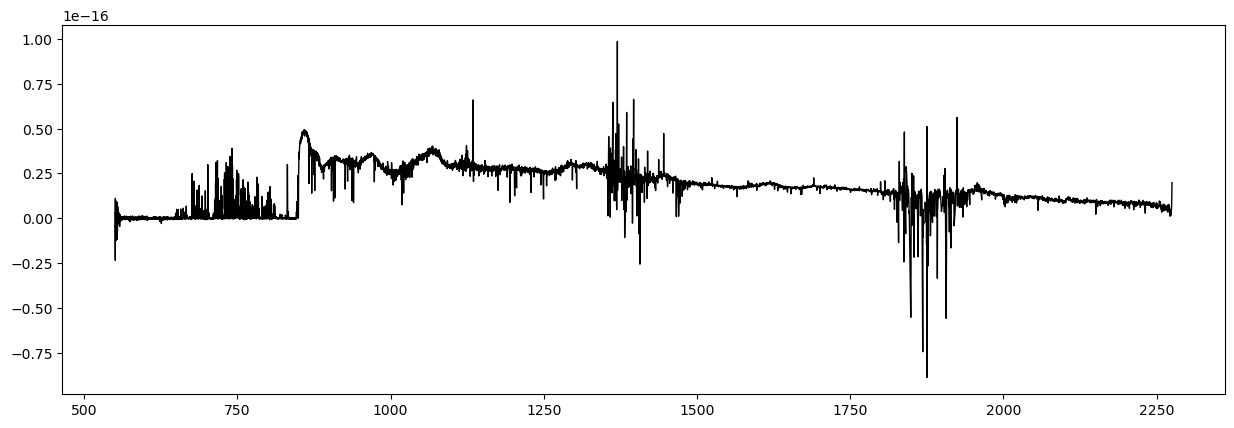

8508
8471


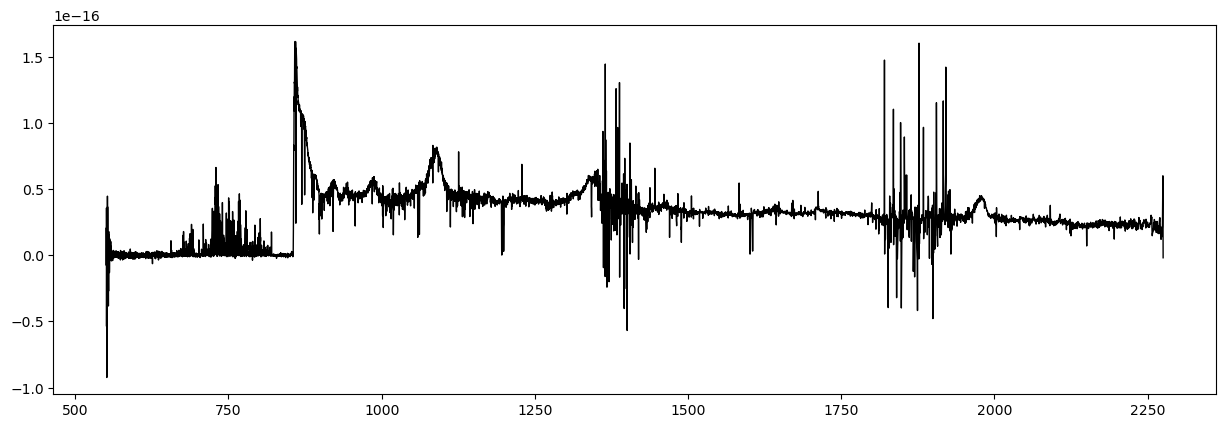

8508
8499


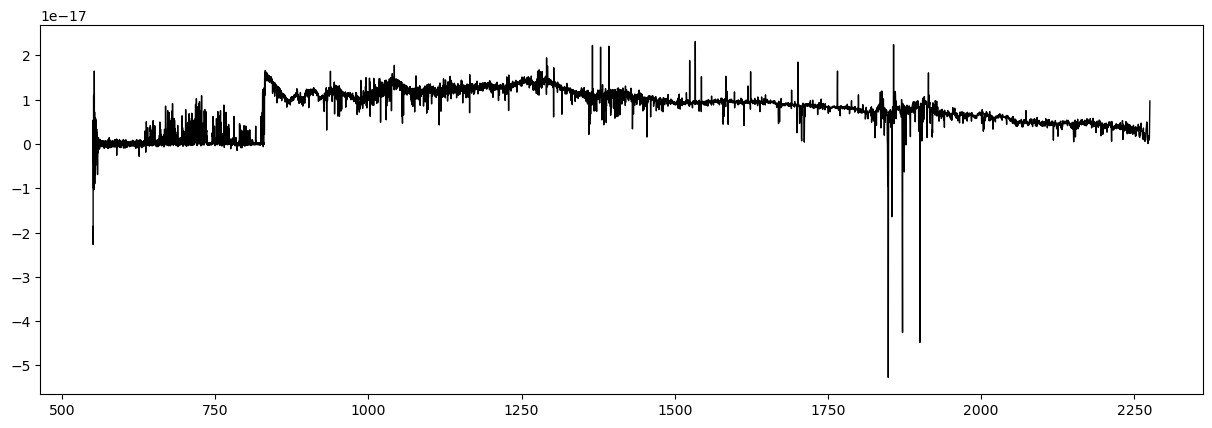

8508
8471


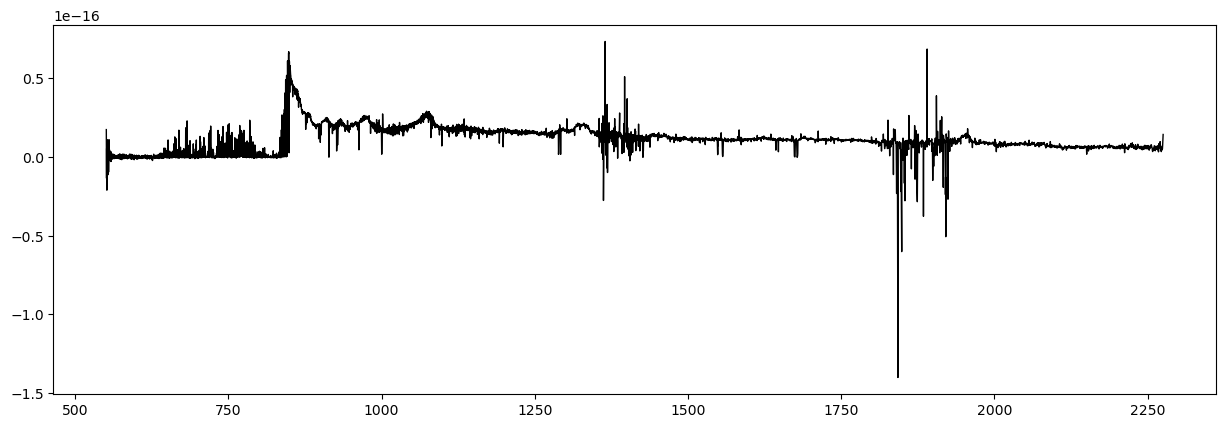

8508
8507


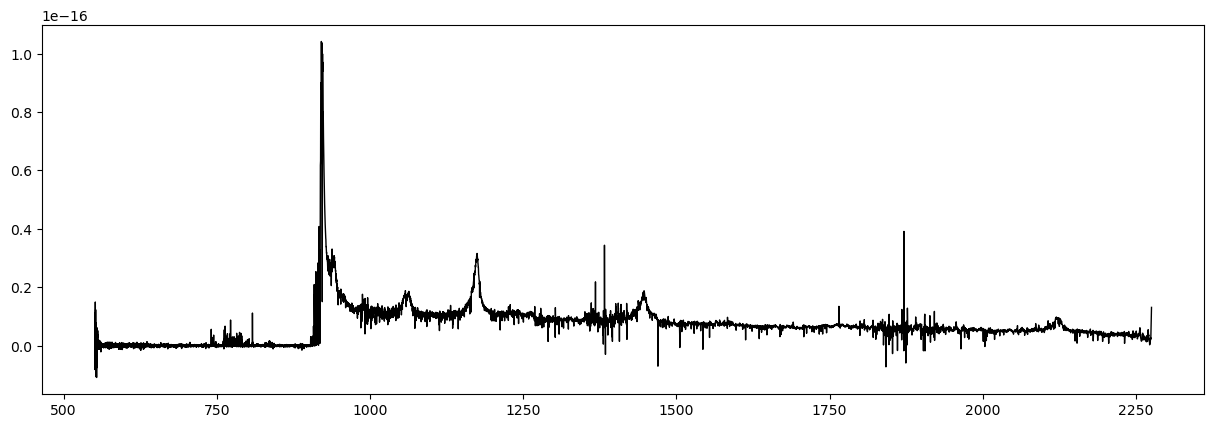

8508
8439


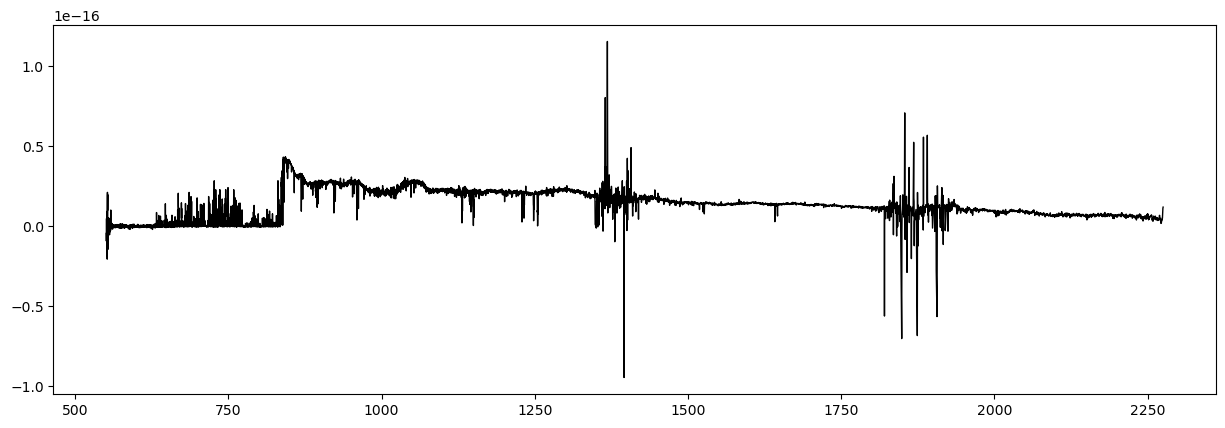

8508
8448


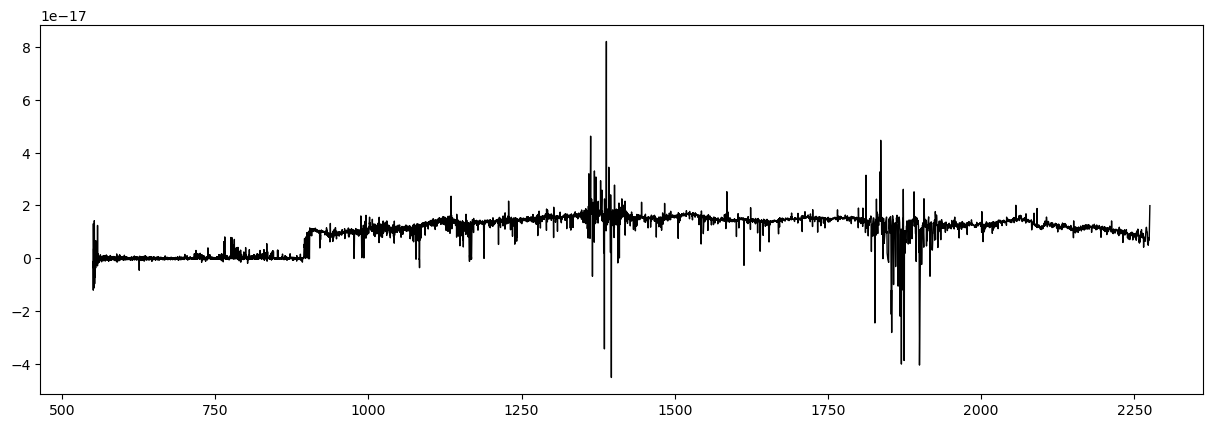

In [8]:
xpath = '/media/bartosz/Volume/XQR30/XQR30_latest/'

flist = [f for f in glob.glob(xpath + '*/*_rebinned_50kms_spec.fits')]

for f in flist:
    with fits.open(f) as hdul:
    
        data = hdul[1].data
    
    wl=np.array([d[0] for d in data])
    flux=np.array([d[3] for d in data])
    sig=np.array([d[4] for d in data])
    print(len(wl))
    mask1 = sig < np.median(sig)*100
    mask2 = sig > -np.median(sig)*100
    mask=np.logical_and(mask1,mask2)
    
    flux = flux[mask]
    wl = wl[mask]
    print(len(wl))
    fig, ax = plt.subplots()
    fig.set_figwidth(15)
    ax.plot(wl,flux,lw=1,c='black')
    #plt.savefig('plots/{}.png'.format(Path(f).stem),format='png')
    plt.show()
    plt.close()

In [ ]:
wl = data[0][0]
flux = data[0][1]
sig = data[0][2]


mask1 = sig < np.median(sig)*5
mask2 = sig > -np.median(sig)*5
mask=np.logical_and(mask1,mask2)
#print(wl)

flux = flux[mask]
wl = wl[mask]
fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(wl,flux,lw=1,c='black')
#plt.ylim(-0.0*10**(-15),0.01*10**(-15))

PSOJ217-07_rebinned_50kms_spec_dpx34.txt
SDSSJ0842+1218_rebinned_50kms_spec_dpx34.txt
PSOJ060+24_rebinned_50kms_spec_dpx34.txt
PSOJ242-12_rebinned_50kms_spec_dpx34.txt
J2211-3206_rebinned_50kms_spec_dpx34.txt
J0408-5632_rebinned_50kms_spec_dpx34.txt
PSOJ231-20_rebinned_50kms_spec_dpx34.txt
PSOJ308-27_rebinned_50kms_spec_dpx34.txt
PSOJ359-06_rebinned_50kms_spec_dpx34.txt
J1212+0505_rebinned_50kms_spec_dpx34.txt
PSOJ025-11_rebinned_50kms_spec_dpx34.txt
PSOJ239-07_rebinned_50kms_spec_dpx34.txt
PSOJ217-16_rebinned_50kms_spec_dpx34.txt
VDESJ0224-4711_rebinned_50kms_spec_dpx34.txt
SDSSJ2310+1855_rebinned_50kms_spec_dpx34.txt
PSOJ158-14_rebinned_50kms_spec_dpx34.txt
PSOJ029-29_rebinned_50kms_spec_dpx34.txt
PSOJ323+12_rebinned_50kms_spec_dpx34.txt
PSOJ183-12_rebinned_50kms_spec_dpx34.txt
J1535+1943_rebinned_50kms_spec_dpx34.txt


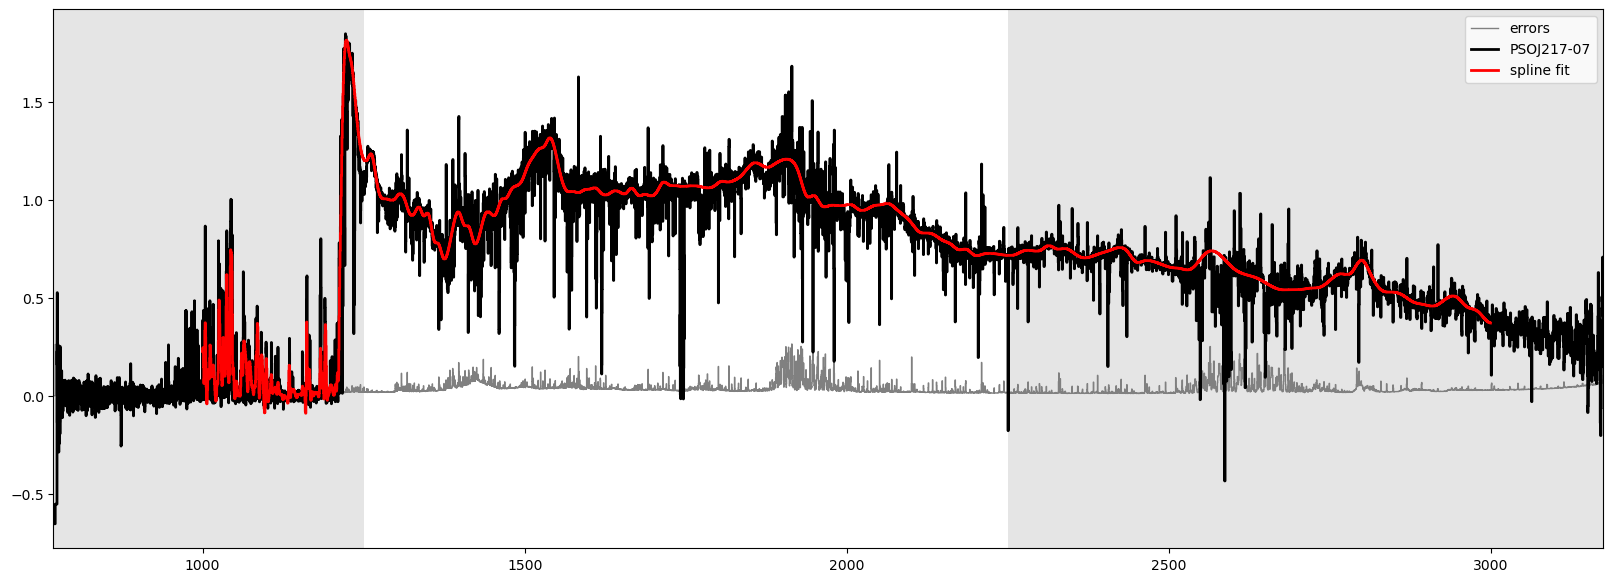

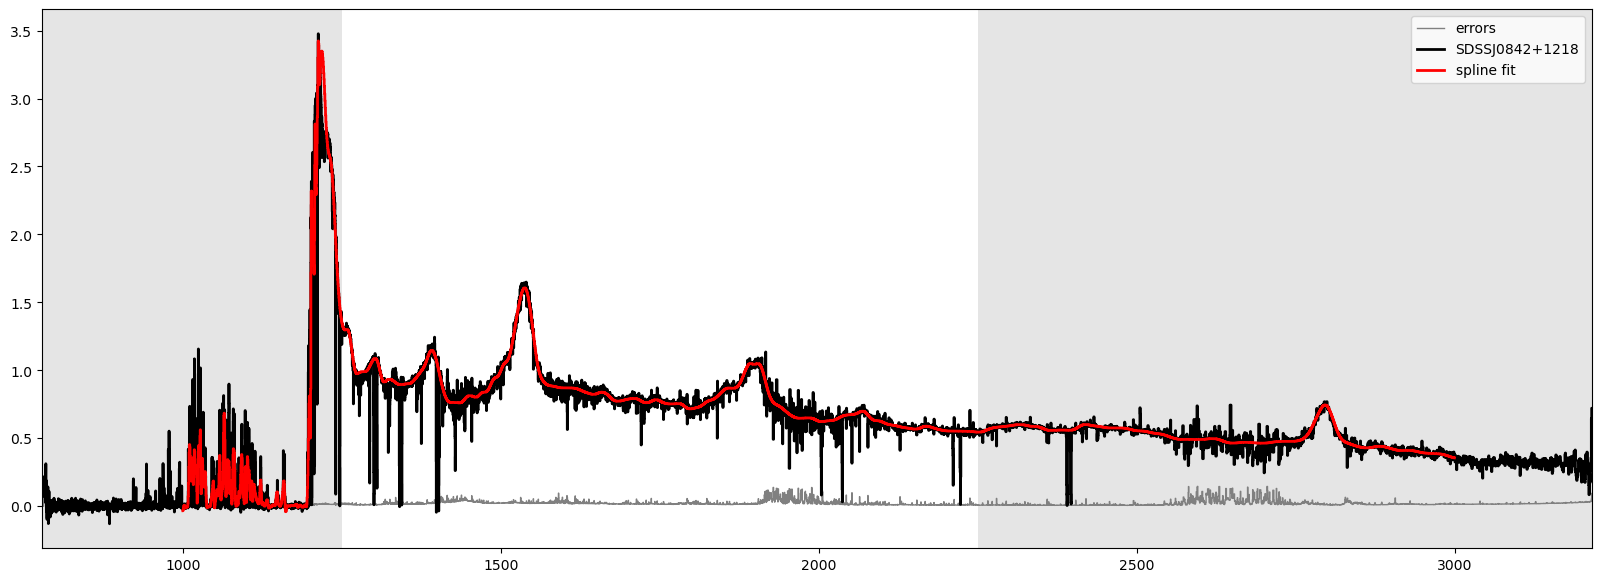

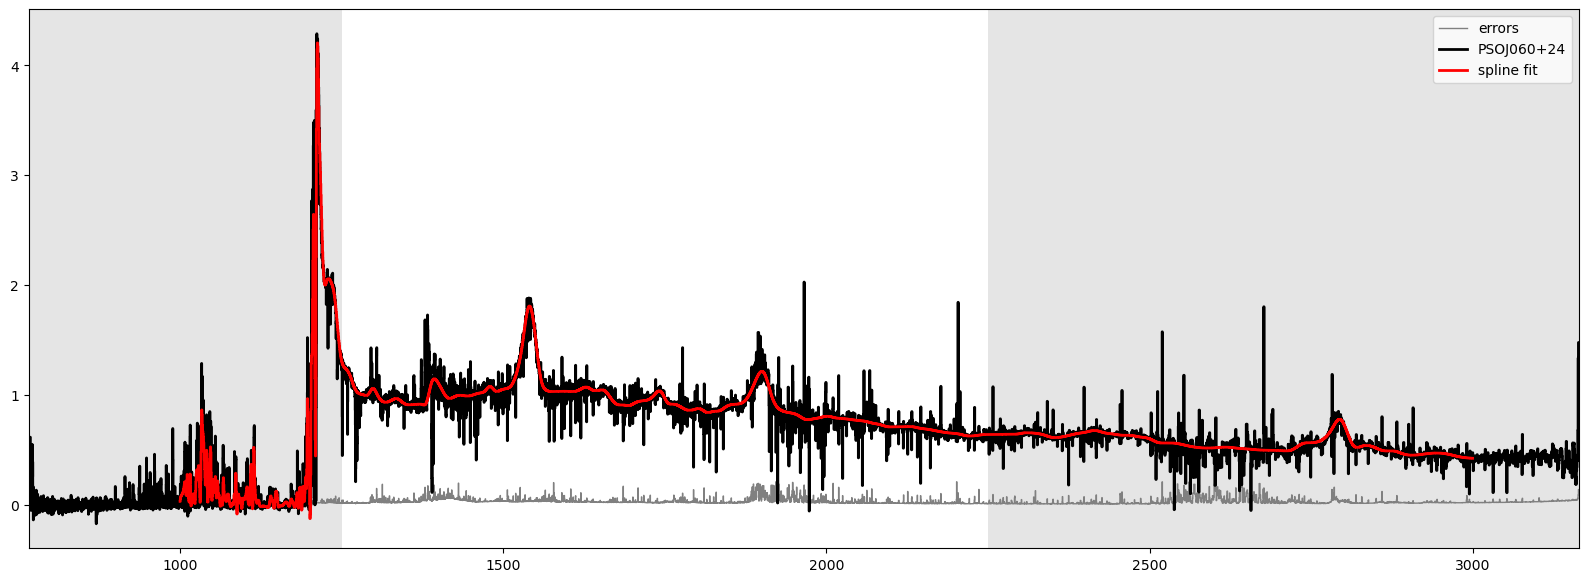

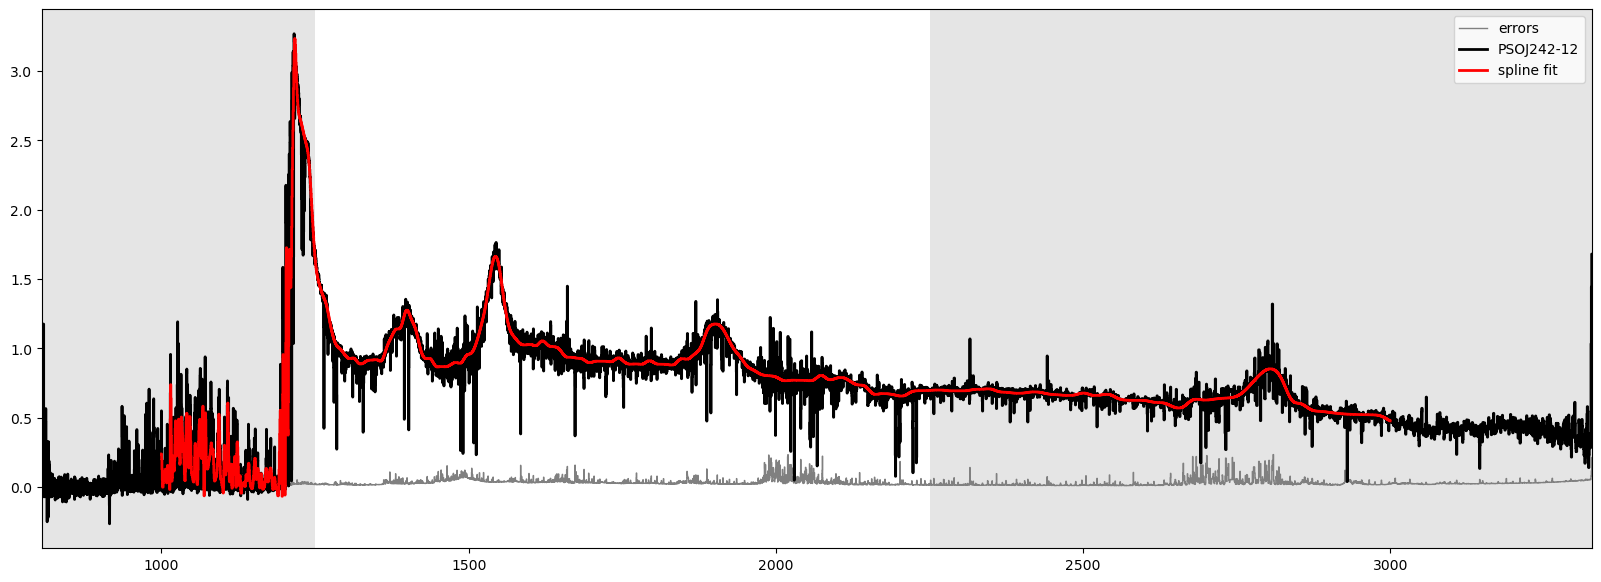

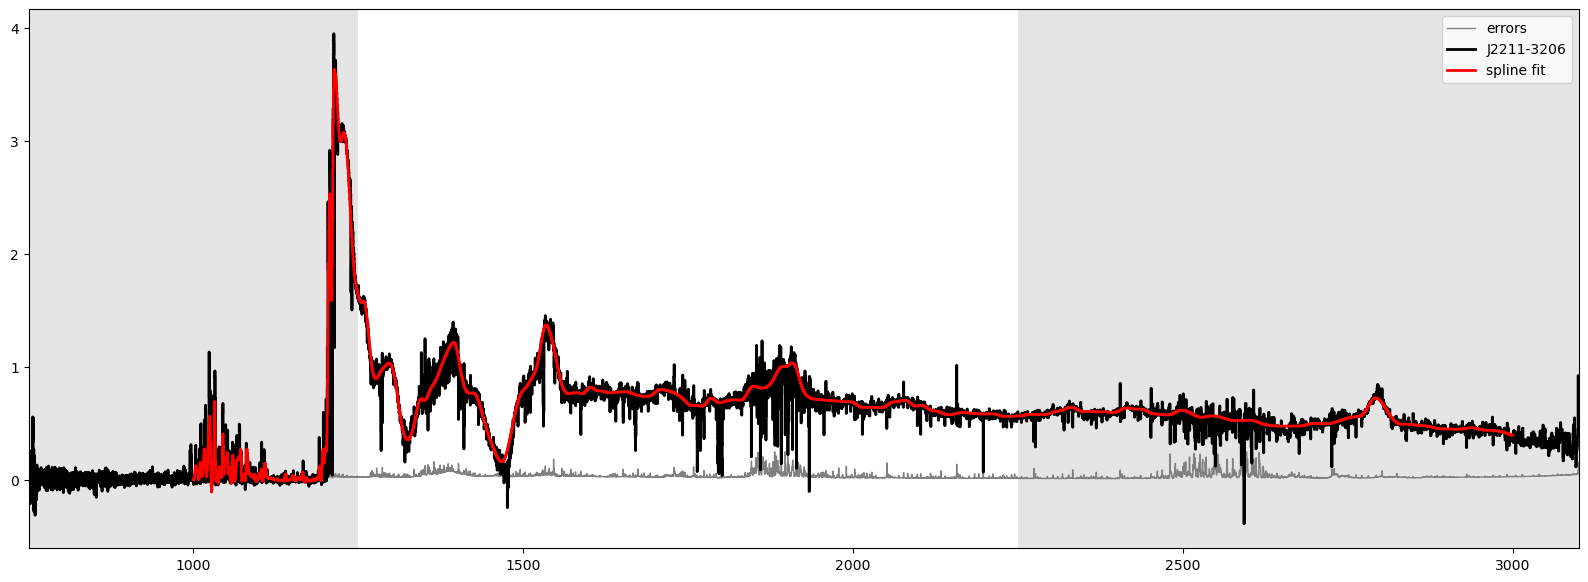

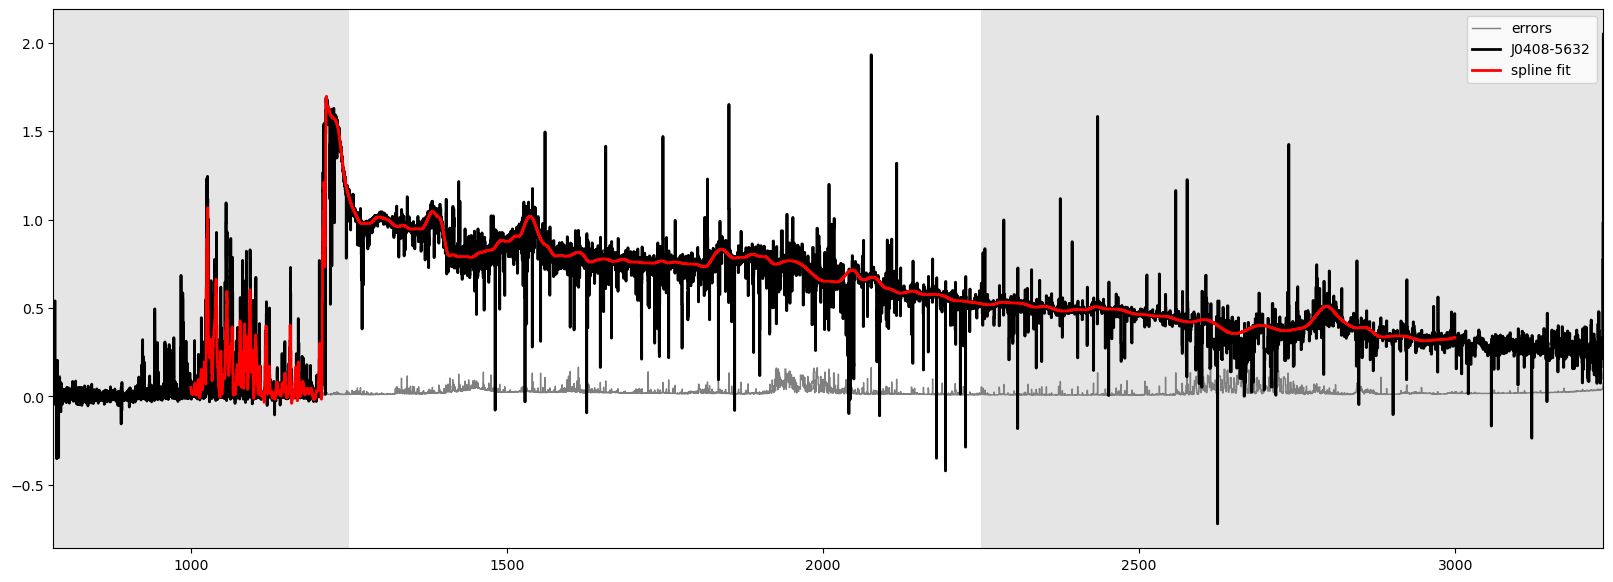

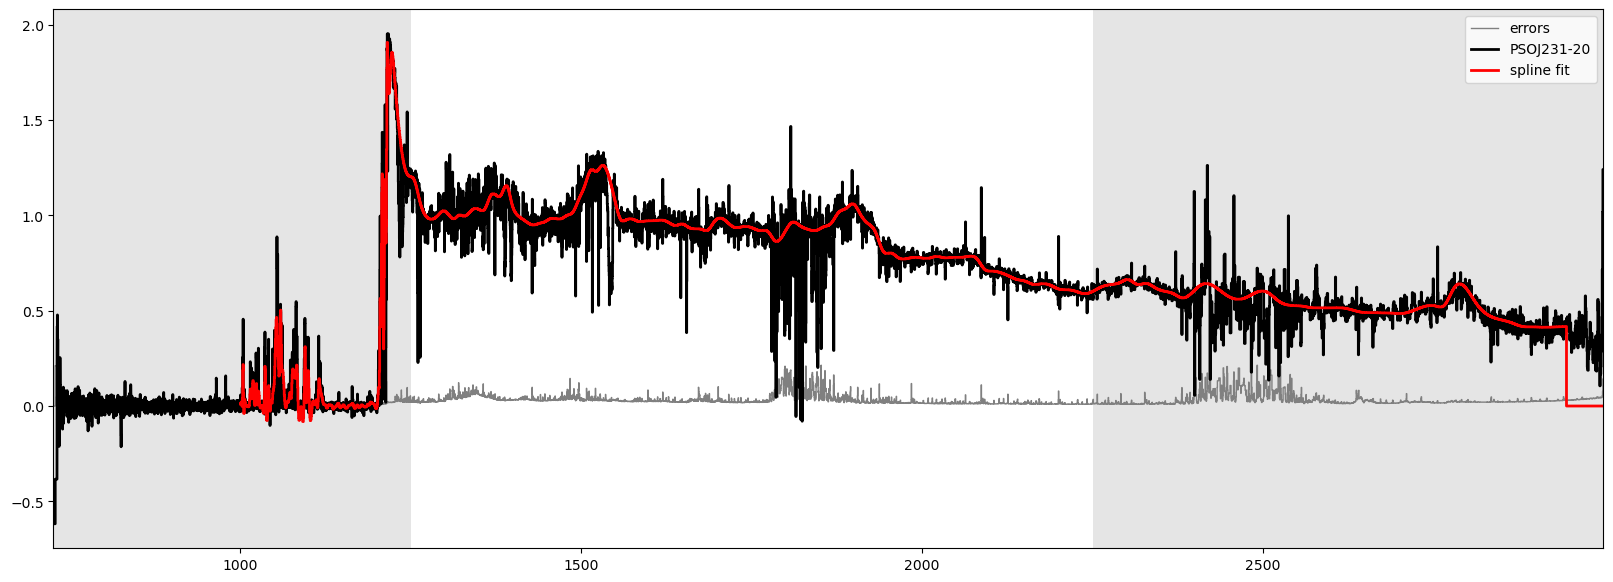

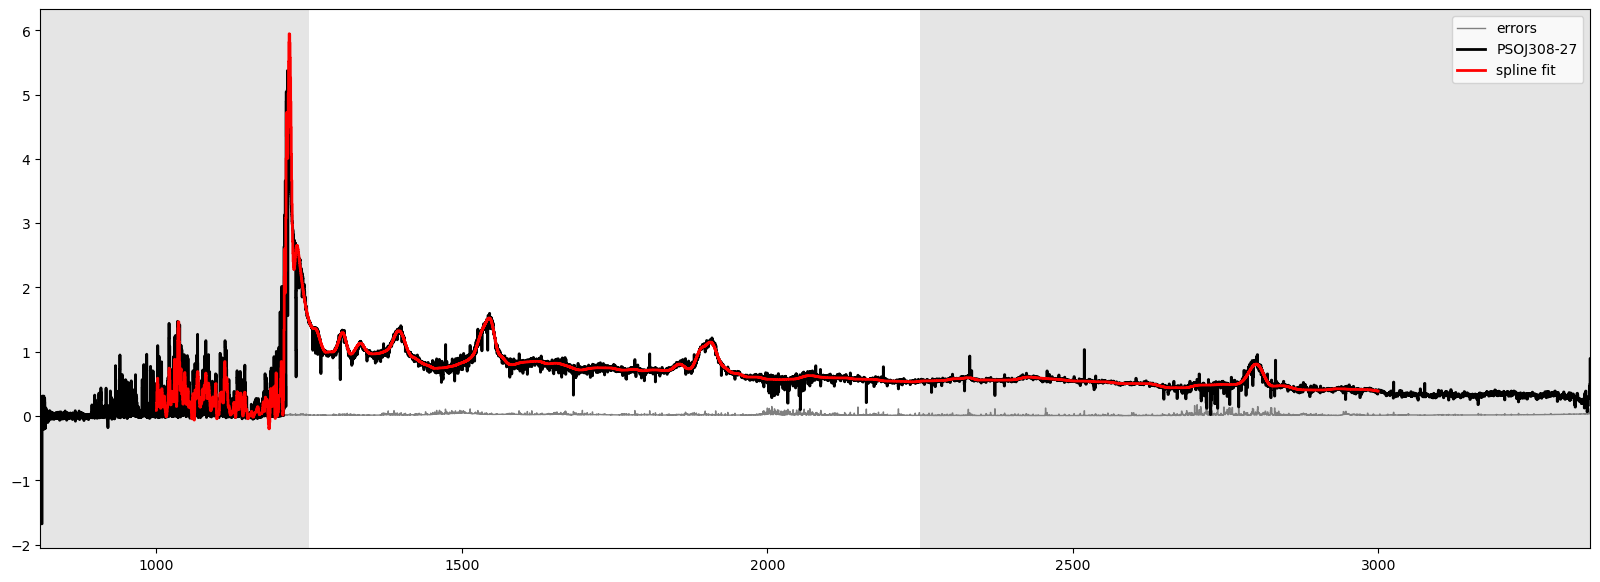

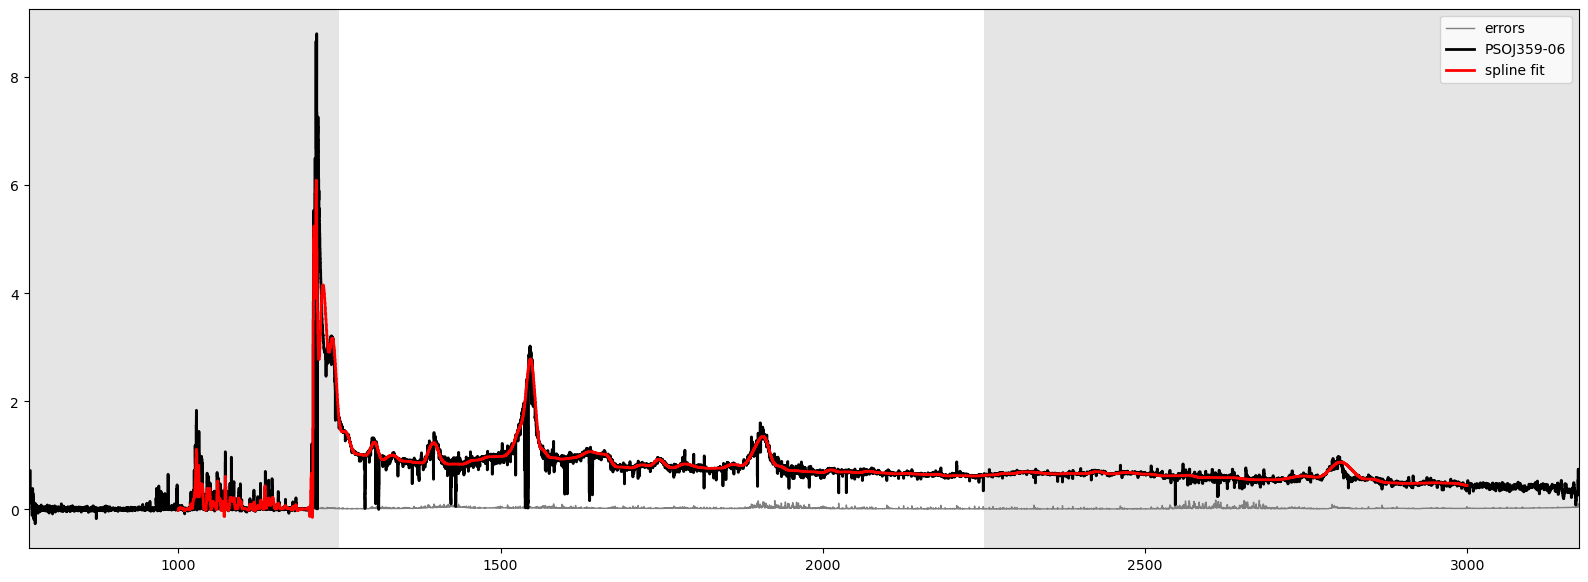

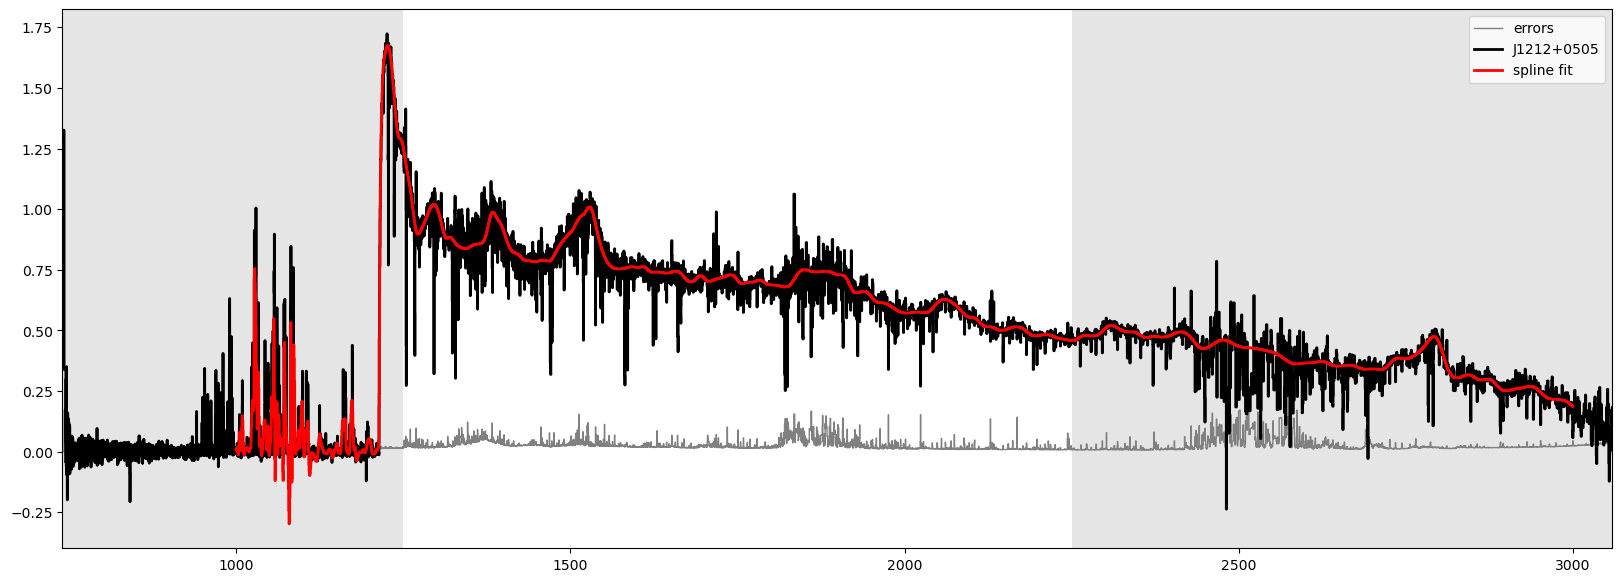

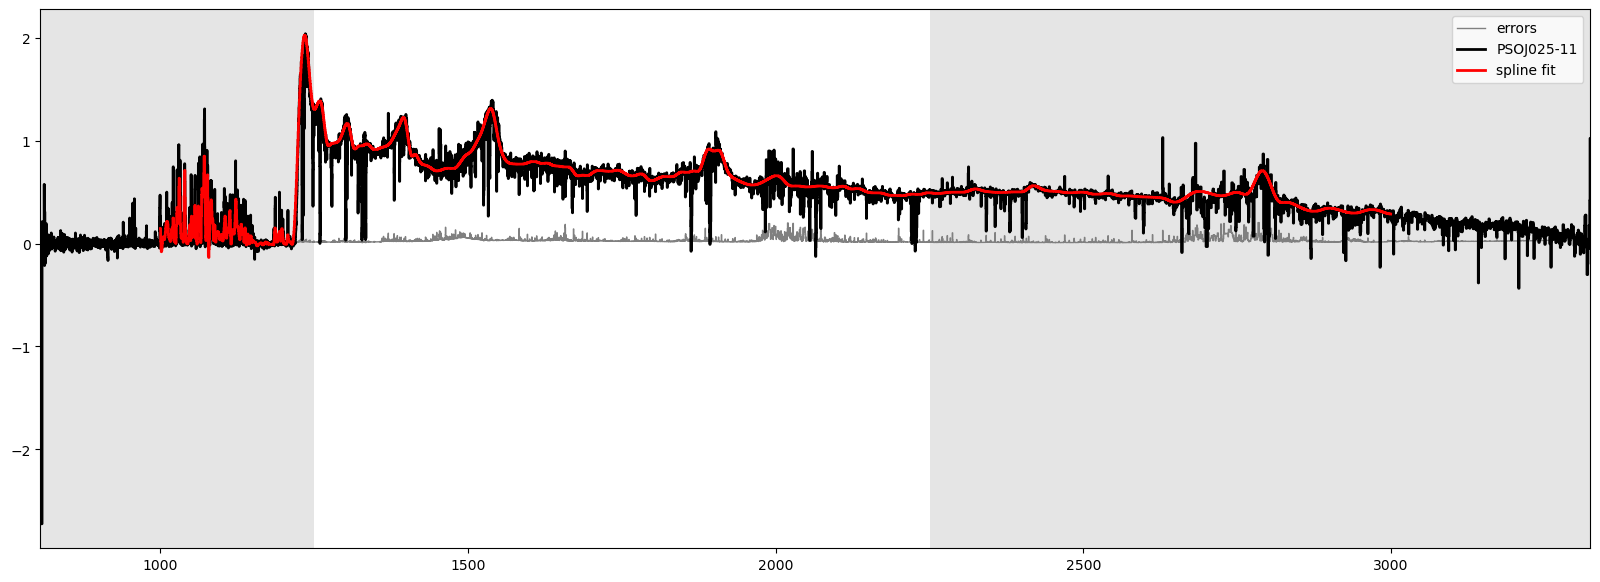

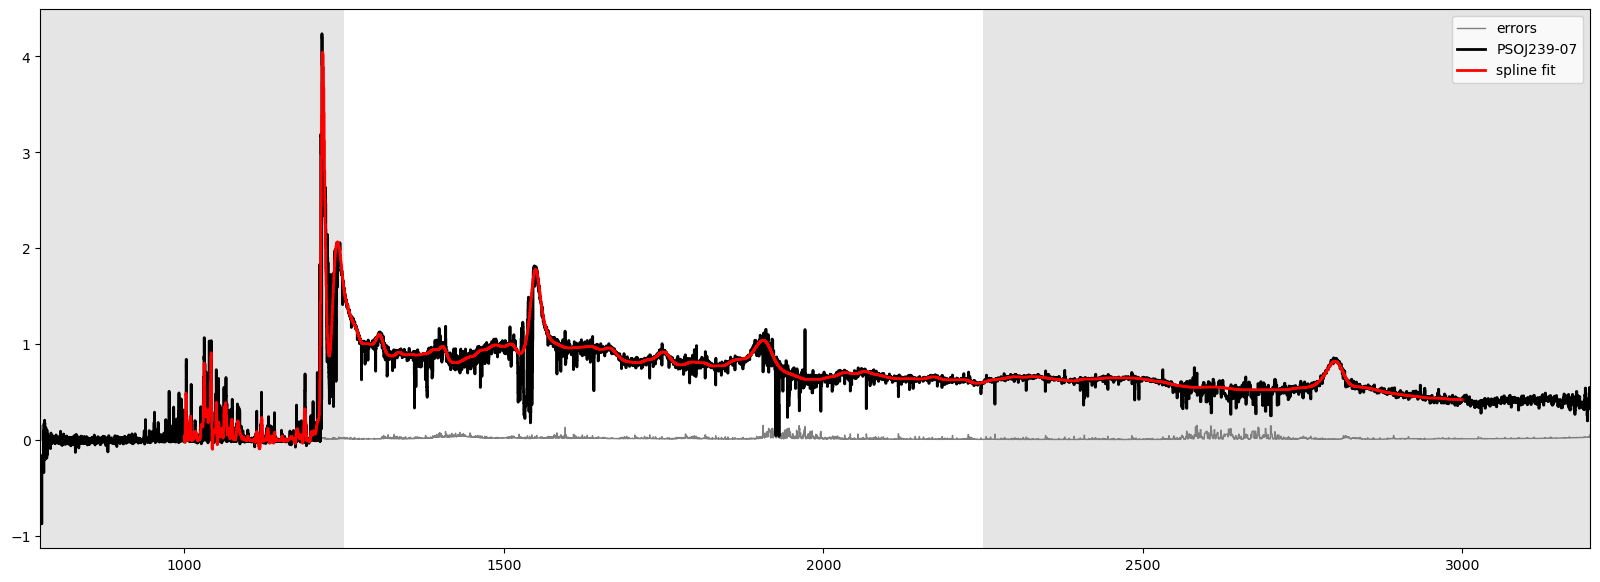

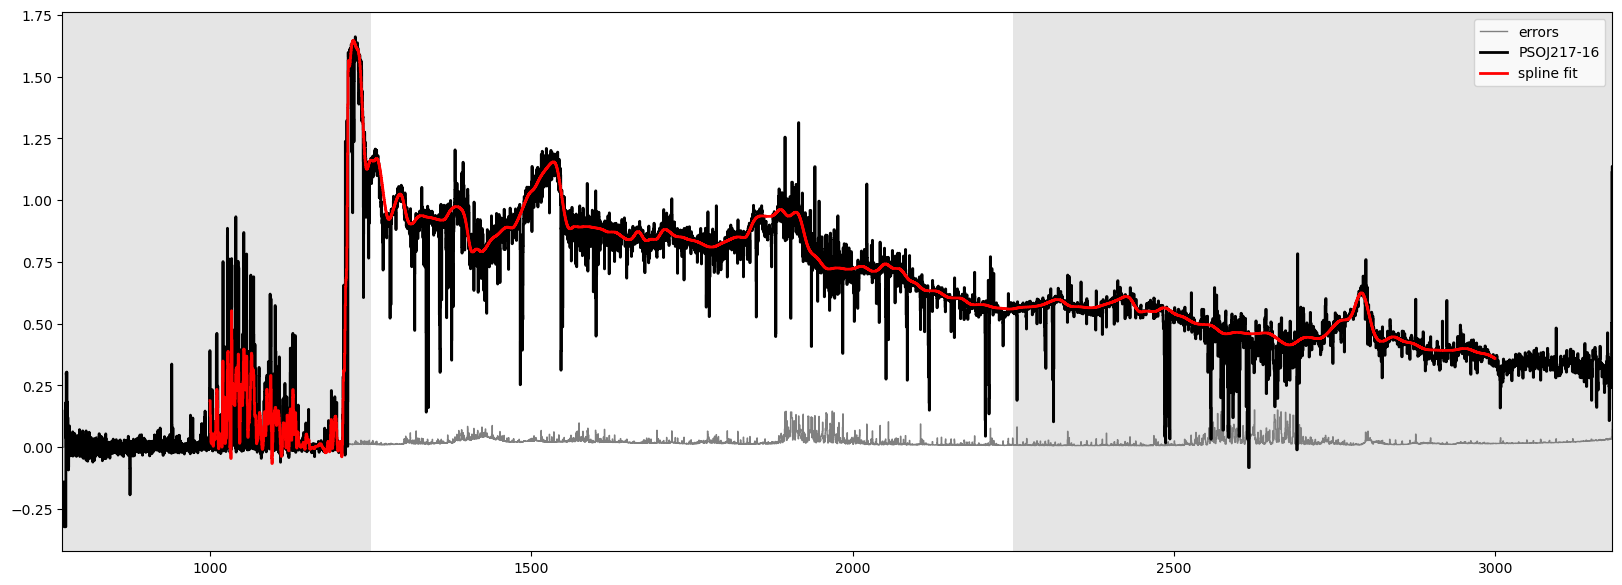

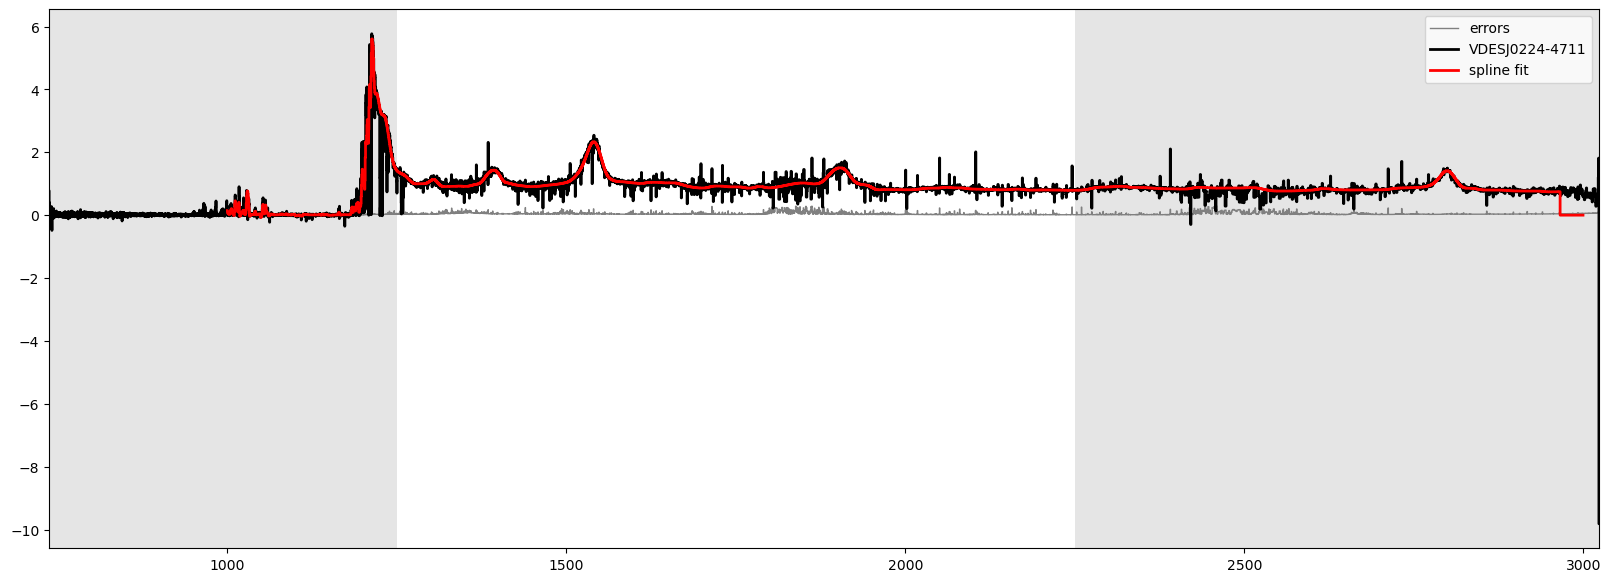

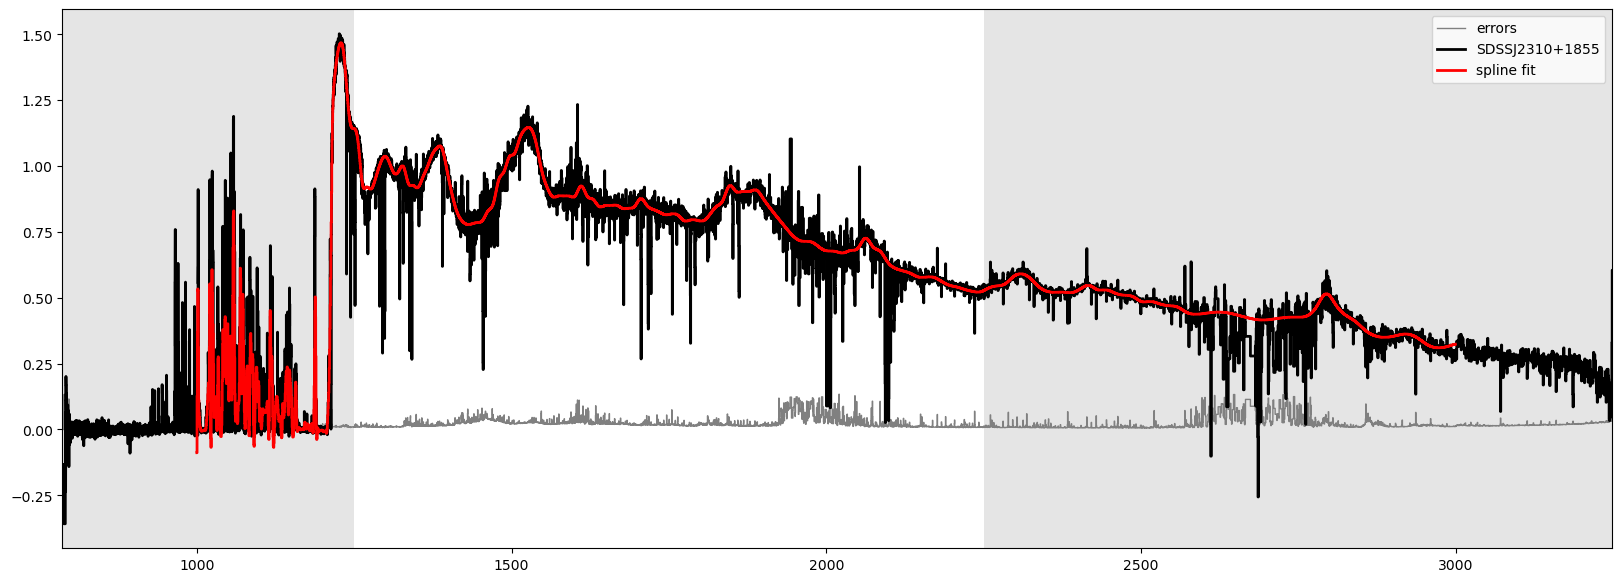

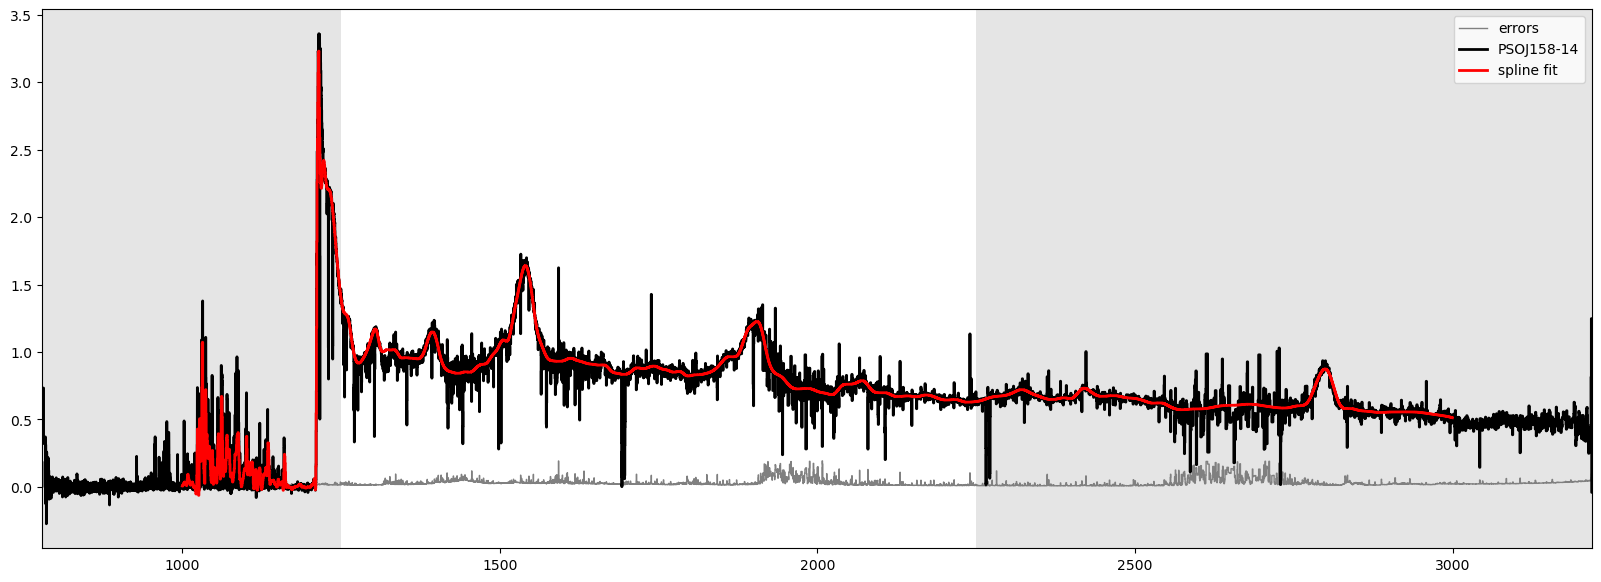

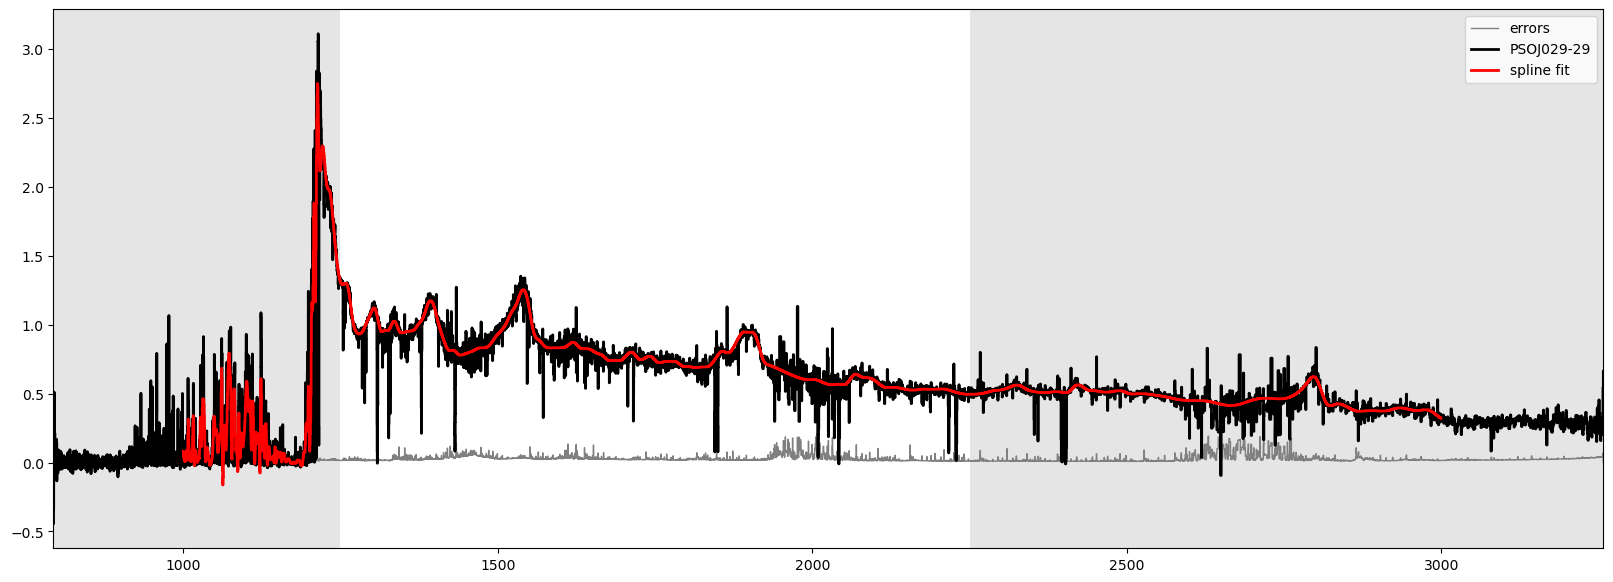

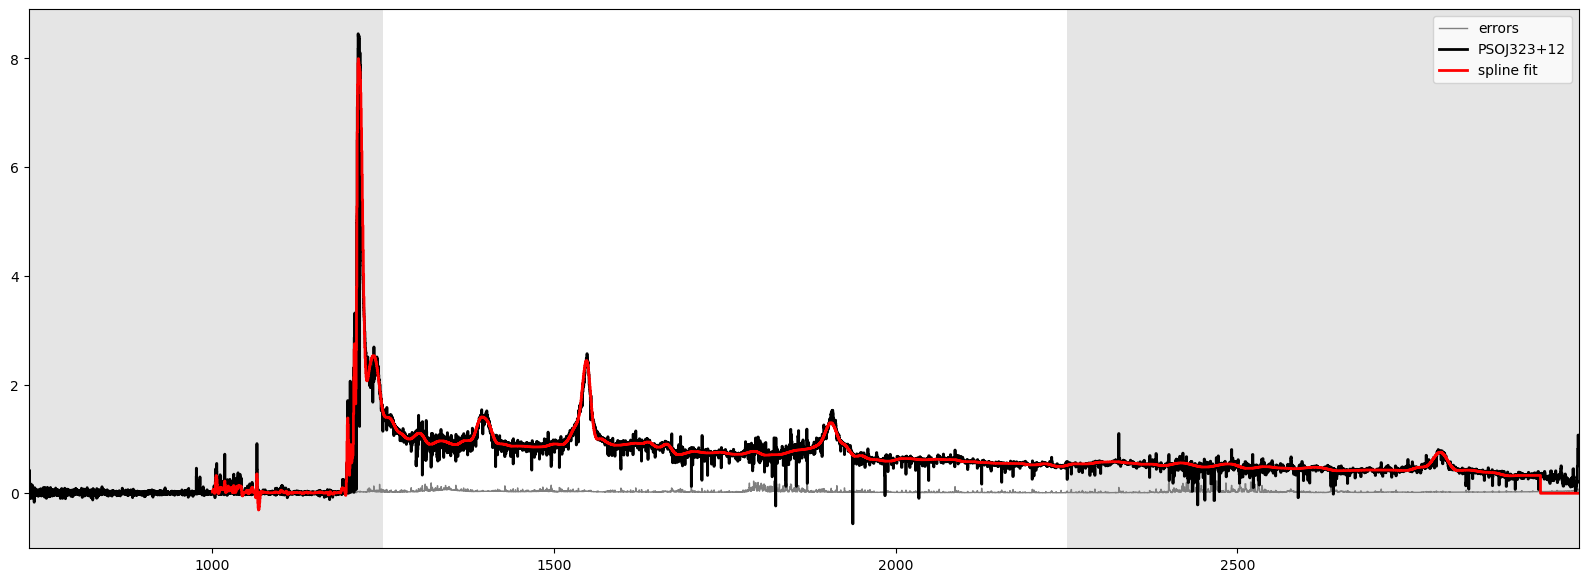

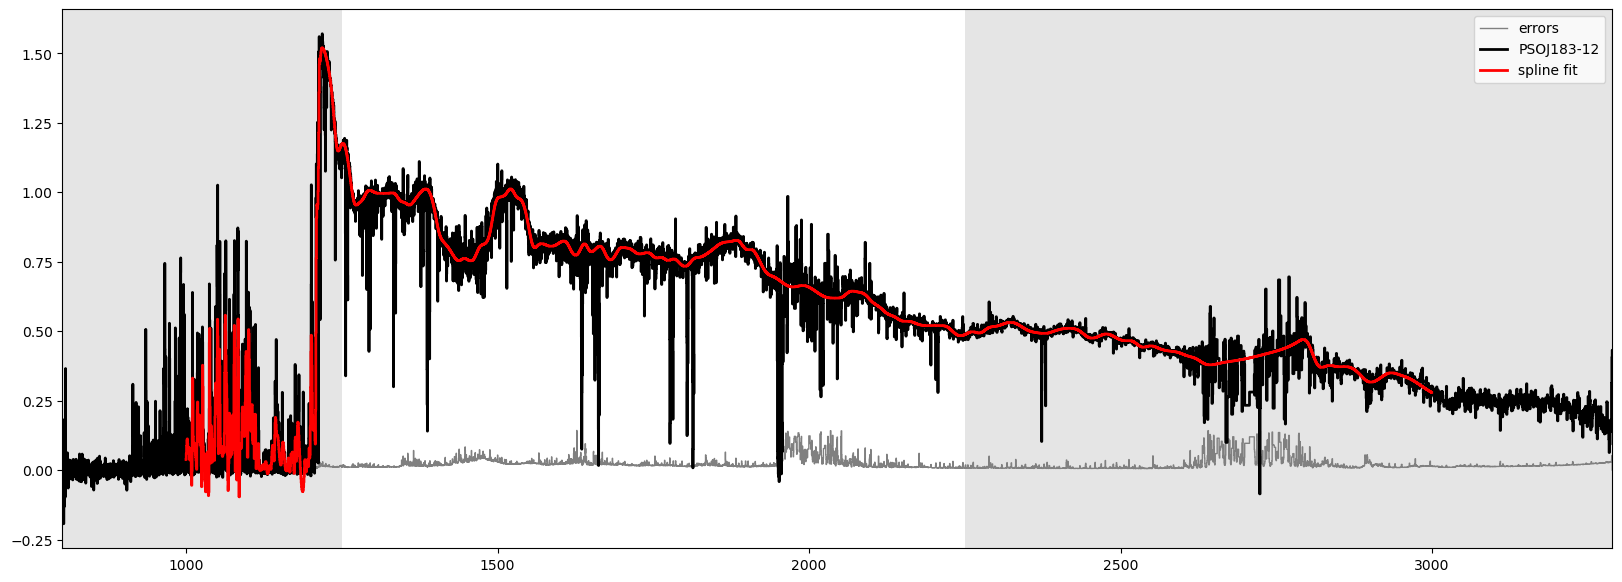

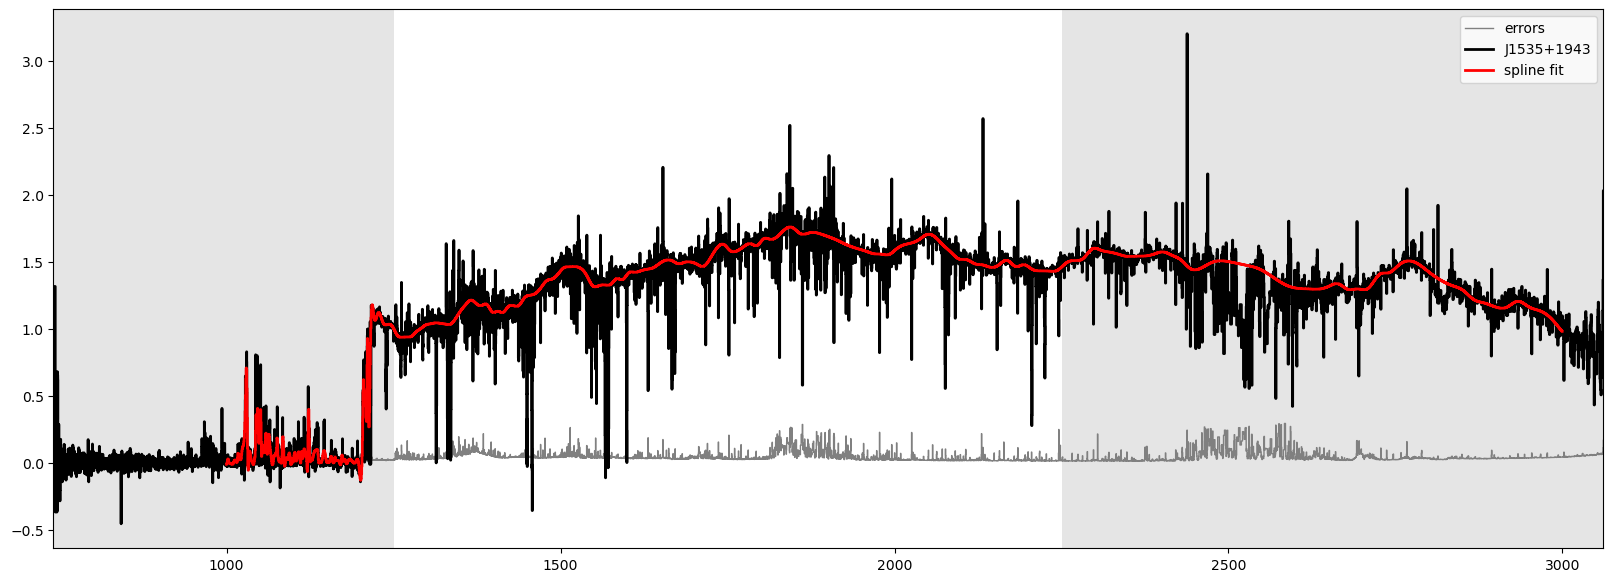

In [37]:
dpath = '/media/bartosz/Volume/XQR30/data/'
fpath = dpath + 'fits/'
npath = dpath + 'normed/'

pp = PdfPages('plots/XQR30_dpx34.pdf')

for filename in glob.glob(npath + '*_norm.txt'):
    fname = Path(filename).stem
    finfo = fname.split('_')[0]
    fname = '{}_dpx34.txt'.format(fname[:-5])
    print(fname)
    normed = np.loadtxt(filename)

    norm_wl = normed[:,0]
    norm_flux = normed[:,1]
    norm_sig = normed[:,2]

    mask1 = norm_sig > -np.median(norm_sig)*10
    mask2 = norm_sig < np.median(norm_sig)*10
    mask = np.logical_and(mask1,mask2)

    norm_wl = norm_wl[mask]
    norm_flux = norm_flux[mask]
    norm_sig = norm_sig[mask]
    
    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot(1,1,1)
    
    ax.plot(norm_wl,norm_sig,linewidth=1,drawstyle='steps-mid',color='grey',label='errors')
    ax.plot(norm_wl,norm_flux,linewidth=2, drawstyle='steps-mid', color='black',label='{}'.format(finfo))

    filename = fpath + fname
    fit = np.loadtxt(filename)

    fit_wl = fit[:,0]
    fit_flux = fit[:,1]
    
    ax.plot(fit_wl,fit_flux,linewidth=2, drawstyle='steps-mid', color='red',label='spline fit')
    ax.axvspan(min(min(norm_wl),min(fit_wl)),1250,alpha=0.2,facecolor='grey')
    ax.axvspan(2250,max(max(norm_wl),max(fit_wl)),alpha=0.2,facecolor='grey')
    ax.set_xlim(left=min(min(norm_wl),min(fit_wl)),right=max(max(norm_wl),max(fit_wl)))
    plt.legend()
    pp.savefig(fig)

pp.close()

In [ ]:
top500=glob.glob(fpath + '*_dpx50.txt')
pp = PdfPages('plots/XQR30.pdf')
#pp = PdfPages('plots/qso73-88.pdf')
for i,qso in enumerate(top500):
    #qidx = int(qso[0])
    #qdmean = qso[1]
    #z, BI = get_z(meta,qidx), get_BI(meta,qidx)

    fig, ax = plot_fit(qidx)
    ax.set_xlabel('$\lambda_{rest} (\AA)$')
    ax.set_ylabel('flux')
    ax.legend()

    #ax.set_ylim(-0.2,2.2)

    info = '\n'.join((
        r'id = {}'.format(qidx),
        r'$d_{{mean}}$ = {0:.3f}'.format(qdmean),
        r'BI = {0:.1f}'.format(BI),
        r'$z$ = {0:.3f}'.format(z)))


    
    fc = colors.to_rgba('white')
    ec = colors.to_rgba('grey')        
    fc = fc[:-1] + (0.75,)
    ec = ec[:-1] + (0.15,)
    props = dict(boxstyle='square', facecolor=fc, edgecolor=ec)
    ax.text(0.75, 0.975, info, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

    #plt.show()
    #quit()
    pp.savefig(fig)

    if (i+1) % 100 == 0:
        pp.close()
        pp = PdfPages('plots/qso{}_{}.pdf'.format(i+1,i+100))
    
    print(i)

pp.close()

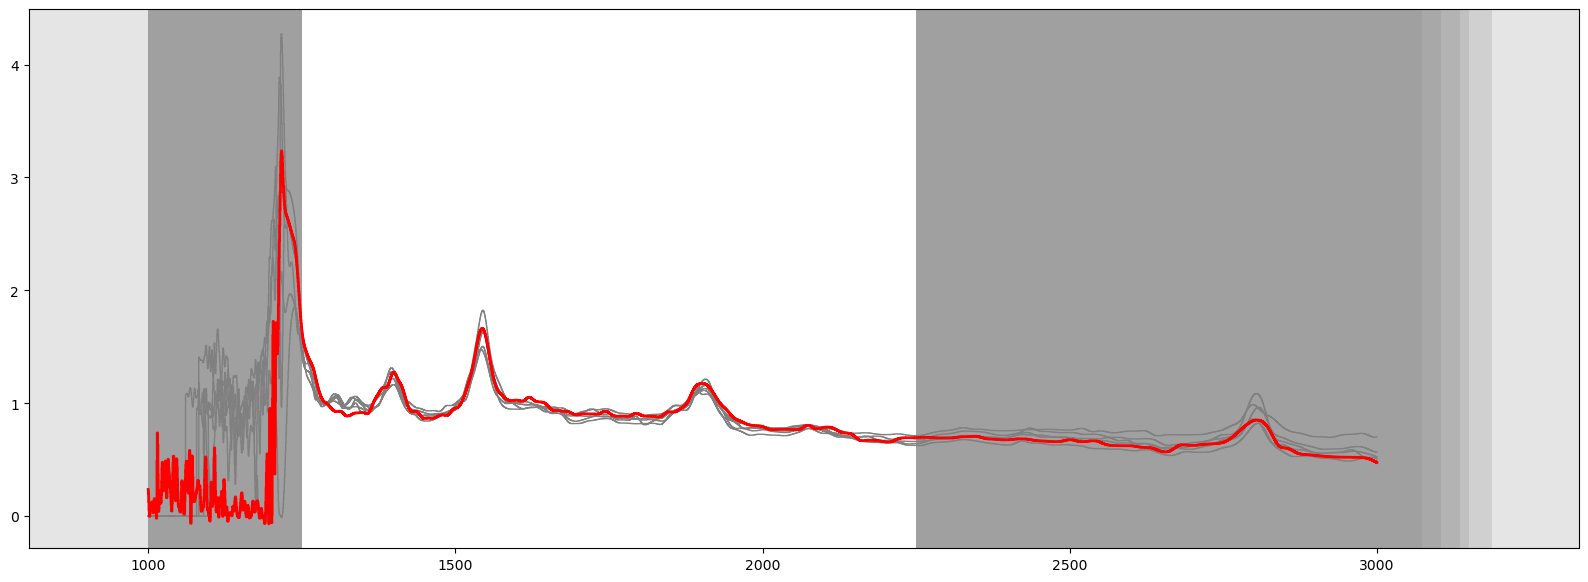

In [23]:
from funcs import plot_fit
from funcs_XQR import plot_fit_XQR
import matplotlib.pyplot as plt
import numpy as np

dpath = '/media/bartosz/Volume/XQR30/data/'
fpath = dpath + 'fits/'
npath = dpath + 'normed/'

nnfile = np.loadtxt(dpath + 'nearest_neighbors.txt',dtype='str')
qnames = nnfile[0]
nn_IDs = nnfile[:,1:6]
nn_Ds = nnfile[:,6:]

#for i,q in enumerate(qnames):
    
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,1,1)
#    for idx in nn_IDs[i]:
#        plot_fit(idx,fig,ax,'grey',1)
plot_fit('8843',fig,ax,'grey',1)
plot_fit('122542',fig,ax,'grey',1)
plot_fit('413801',fig,ax,'grey',1)
plot_fit('245797',fig,ax,'grey',1)
plot_fit('176995',fig,ax,'grey',1)
plot_fit_XQR('PSOJ242-12',fig,ax)
#ax.set_xlim(1250,2250)
#plt.savefig('plots/PSOJ242-12_NN.png',format='png')

In [12]:
dpath = '/media/bartosz/Volume/XQR30/data/'
fpath = dpath + 'fits/dpx34_masked/'
npath = dpath + 'normed/dpx34_masked/'

idx='PSOJ242-12'
for filename in glob.glob(fpath + '{}_*_dpx34.txt'.format(idx)):
    fit = np.loadtxt(filename)
fit[:,1]

array([0.23802356, 0.2017855 , 0.12904075, ..., 0.4790251 , 0.47775028,
       0.47649949])

PSOJ217-16 3524 6.1498
PSOJ158-14 3524 6.0681
PSOJ025-11 3524 5.844
PSOJ308-27 3524 5.7985
J1212+0505 3524 6.4386
PSOJ323+12 3524 6.5872
J1535+1943 3524 6.432
VDESJ0224-4711 3524 6.526
PSOJ029-29 3524 5.984
PSOJ242-12 3524 5.837
PSOJ060+24 3524 6.192
PSOJ183-12 3524 5.917
PSOJ359-06 3525 6.1719
ATLASJ025.6821-33.4627 17622 6.3373
CFHQSJ1509-1749 17621 6.119
PSOJ036+03 17622 6.527
SDSSJ0100+2802 17622 6.316
SDSSJ0818+1722 17622 5.96
SDSSJ0836+0054 17622 5.773
SDSSJ0927+2001 17622 5.76
SDSSJ1030+0524 17621 6.304
SDSSJ1306+0356 17621 6.02
ULASJ0148+0600 17621 5.977
ULASJ1319+0950 17622 6.117
J0108+0711 17622 5.577
J1335-0328 17621 5.693
J2100-1715 13581 6.0807
J2207-0416 17622 5.529
PSOJ004+17 17622 5.8166
PSOJ011+09 13446 6.4695
PSOJ056-16 17622 5.9676
PSOJ159-02 17622 6.386
PSOJ215.1514-16.0417 17622 5.7321
PSOJ308-21 17622 6.2355
PSOJ340-18 17622 5.999
ULASJ1207+0630 17621 6.0366
VDESJ0330-4025 17621 6.239
VIKJ0046-2837 17622 5.9926
VIKJ2318-3029 17622 6.1456
ATLASJ029.9915-36.5658 352

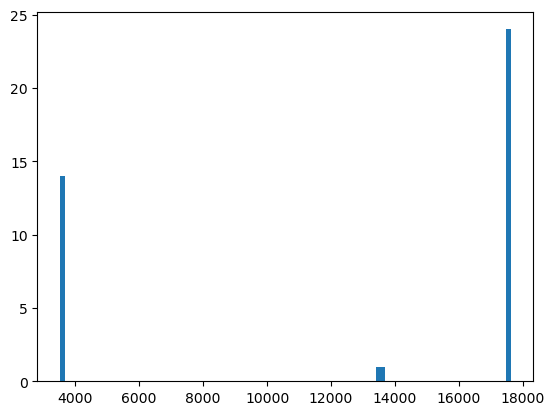

In [9]:
xpath = '/media/bartosz/Volume/highz_data/'
xqpath = xpath + 'spectra/'
#dpath = xpath + 'data/'

flist = [f for f in glob.glob(xqpath + '*.txt')]

meta = np.loadtxt(xpath + 'meta_data_v2.txt',dtype='str')
qnames = meta[:,0]
Z = meta[:,1]

NPIX,QSO=[],[]
for f in flist:
    file_name = Path(f).stem
    file_info = file_name.split('_')
    if file_info[0] in qnames:
        qso_idx = np.nonzero(qnames == file_info[0])[0]
        z_in = float(Z[qso_idx])
        
        data = np.loadtxt(f)
        
        wl=np.array([d[0] for d in data])
        flux=np.array([d[1] for d in data])
        sig=np.array([d[2] for d in data])
        
        wl_rest = wl/(1+z_in)
        mask1 = wl_rest > 1250
        mask2 = wl_rest < 2250
        mask = np.logical_and(mask1,mask2)
    
        npix = len(wl_rest[mask])
        NPIX.append(npix)
        QSO.append(file_name)
        print(file_name,npix,z_in)
    
    #pdist = [j-i for i,j in zip(wl[:-1],wl[1:])]
    
    #counts,bins= np.histogram(pdist,bins=20)

    #plt.hist(bins[:-1],bins,weights=counts)
    #plt.show()
    #plt.close()

#print(NPIX)
#print(QSO)
counts,bins = np.histogram(NPIX,bins=100)
plt.hist(bins[:-1],bins,weights=counts)
plt.show()

In [7]:
len(NPIX)

40

In [31]:
spath = '/media/bartosz/Volume/BOSS_DR14/data/normed/dpx25/'
NPIX=[]
i=0
for f in glob.glob(spath + '*_0_norm.txt'):
    i+=1
    file_name = Path(f).stem
    file_info = file_name.split('_')
    spec = np.loadtxt(f)
    wl = spec[:,0]
    #z = get_z(meta,int(file_info[0]))
    #print(z)
    wl_rest = wl

    mask1 = wl_rest > 1250
    mask2 = wl_rest < 2250
    mask = np.logical_and(mask1,mask2)

    npix = len(wl_rest[mask])
    NPIX.append(npix)
    #if i == 100:
    #    break;
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


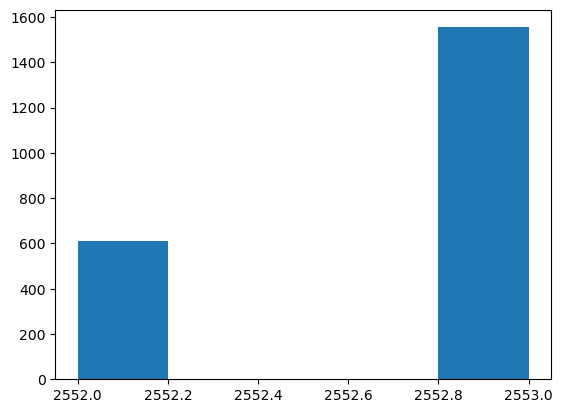

In [32]:
counts,bins = np.histogram(NPIX,bins=5)
plt.hist(bins[:-1],bins,weights=counts)
plt.show()

In [12]:
npix_lowz = 2553
npix_highz = 17622
r = npix_highz/npix_lowz 
r

6.902467685076381

In [21]:
xpath = '/media/bartosz/Volume/XQR30/data/spec/'

xlist = glob.glob(xpath+'*.txt')
for x in xlist:
    xspec = np.loadtxt(x,dtype='str')
    xname = Path(x).stem
    wl,flux,sig = xspec[:,0],xspec[:,1],xspec[:,2]
    sig = [float(s) for s in sig]
    counts,bins = np.histogram(sig,bins=100)
    plt.hist(bins[:-1],bins,weights=counts)
    plt.yscale('log')
    #plt.savefig('plots/hist_{}.png'.format(xname),format='png')
    plt.close()

In [24]:
# xpath = '/media/bartosz/Volume/XQR30/'
# xqpath = xpath + 'XQR30_latest/'
# spath = xpath + 'data/spec/'

# f='/media/bartosz/Volume/XQR30/XQR30_latest/ATLASJ029-36/ATLASJ029.9915-36.5658_rebinned_50kms_spec.fits'
# ffile_name='ATLASJ029.9915-36.5658_rebinned_50kms_spec'
# with fits.open(f) as hdul:
#     data = hdul[1].data

# wl = np.array([d[0] for d in data])*10    #convert from nm to Angstrom
# flux = np.array([d[3] for d in data])
# sig = np.array([d[4] for d in data])

# spec_save = spath + '{}.txt'.format(ffile_name)
# with open(spec_save,'w') as ssave:
#     for x in zip(wl,flux,sig):
#         ssave.write('{} \t {} \t {} \n'.format(*x))
# ssave.close()

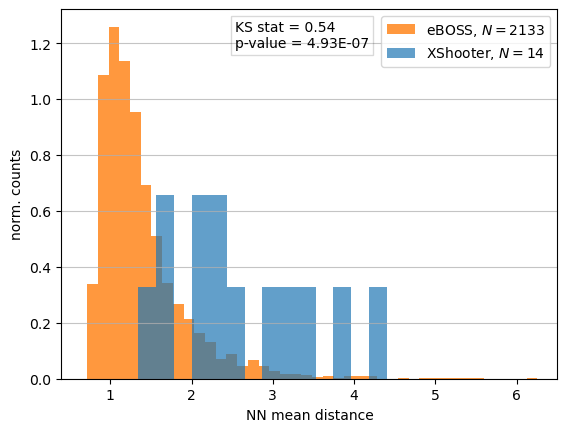

In [13]:
dpath= '/media/bartosz/Volume/BOSS_DR14/data/'

nn = np.loadtxt(dpath + 'nearest_neighbors_nonBALs_2.txt')

idx = nn[:,0]

nn_idx = nn[:,2:7]
nn_d = nn[:,8:13]

d_mean = np.array([np.mean(d) for d in nn_d])

ihist = d_mean <100000
counts,bins= np.histogram(d_mean[ihist],bins=50, density=True)
fig, ax = plt.subplots()

#info = ''.join(
#    r'${}/{}$ quasars'.format(np.sum(counts),len(d_mean)))

props = dict(boxstyle='square', facecolor='white', alpha=0.15)
#ax.text(0.4, 0.97, info, transform=ax.transAxes, fontsize=10,
#        verticalalignment='top', bbox=props)

bin_widths = np.diff(bins)
bin_centers = bins[:-1] + bin_widths / 2

plt.bar(bin_centers, counts, width=bin_widths, color='tab:orange', alpha=0.8,label='eBOSS, $N={}$'.format(len(d_mean)))


xpath = '/media/bartosz/Volume/XQR30/data/'
xnn = np.loadtxt(xpath+'highZ_NN.txt',dtype='str')
xnn_d = [[float(x) for x in X] for X in xnn[:,6:11]]
xd_mean = np.array([np.mean(d) for d in xnn_d])
xcounts,xbins = np.histogram(xd_mean,bins=50, density=True)
xbin_widths = np.diff(xbins)
xbin_centers = xbins[:-1] + xbin_widths/2
plt.bar(xbin_centers,xcounts,width=xbin_widths,alpha=0.7,color='tab:blue',label='XShooter, $N={}$'.format(len(xd_mean)))
#plt.xlim(0.4,6.5)

#KS test
KS_test = scipy.stats.ks_2samp(counts,xcounts)
KSinfo = '\n'.join((
                r'KS stat = {}'.format(KS_test[0]),
                r'p-value = {:.2E}'.format(KS_test[1])))
ax.text(0.35,0.97,KSinfo,transform=ax.transAxes,fontsize=10,verticalalignment='top', bbox=props)

plt.legend()
plt.xlabel('NN mean distance')
plt.ylabel('norm. counts')
#plt.xlim(0,10)
#plt.yscale('log')

plt.grid(axis='y', alpha=0.75)
#plt.savefig('plots/distr_dmean_norm_v2.png',format='png')
plt.show()

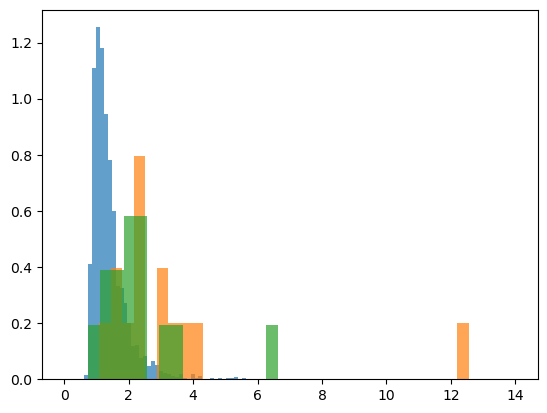

In [11]:
dpath = '/media/bartosz/Volume/XQR30/data/'
nnfile = np.loadtxt(dpath + 'highZ_NN_trim.txt',dtype='str')
nn_Ds = nnfile[:,6:]
d_means = [np.mean([float(j) for j in nn]) for nn in nn_Ds]

bins1 = np.linspace(0,6,50)
bins2 = np.linspace(0, 14, 40)
bins3 = np.linspace(0,7,20)
plt.hist(d_mean,bins1, density = True,alpha=0.7, color='tab:blue',histtype='bar')
plt.hist(xd_mean,bins2, density = True,alpha=0.7, color='tab:orange',histtype='bar')
plt.hist(d_means,bins3, density = True, alpha=0.7,color='tab:green',histtype='bar')
plt.show()

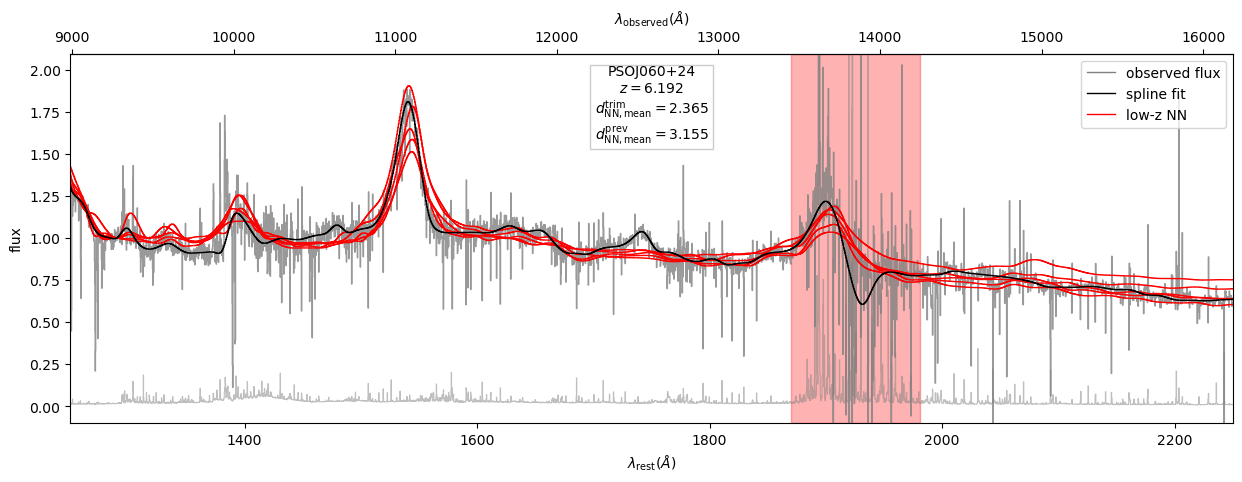

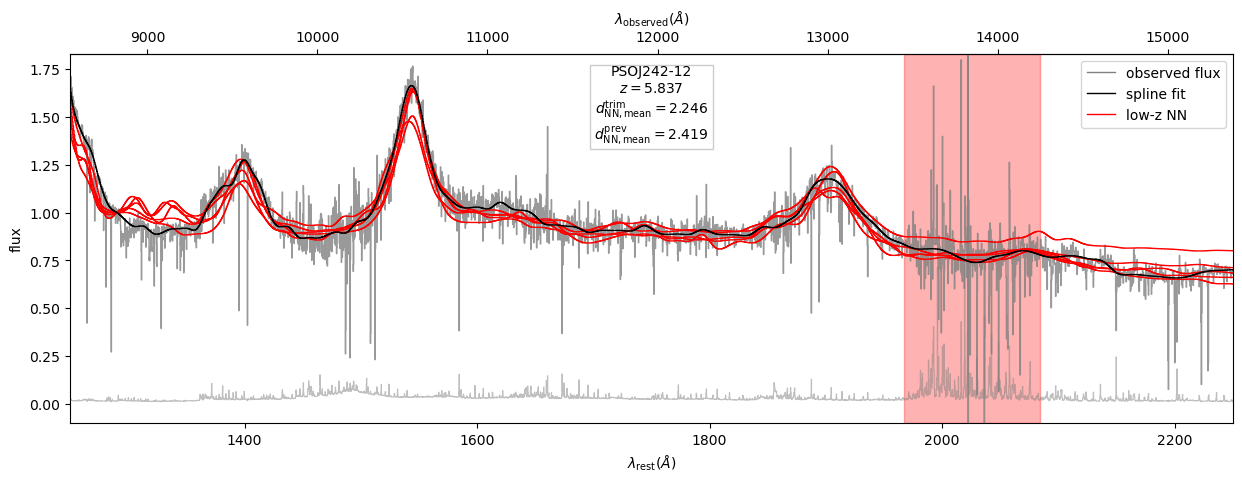

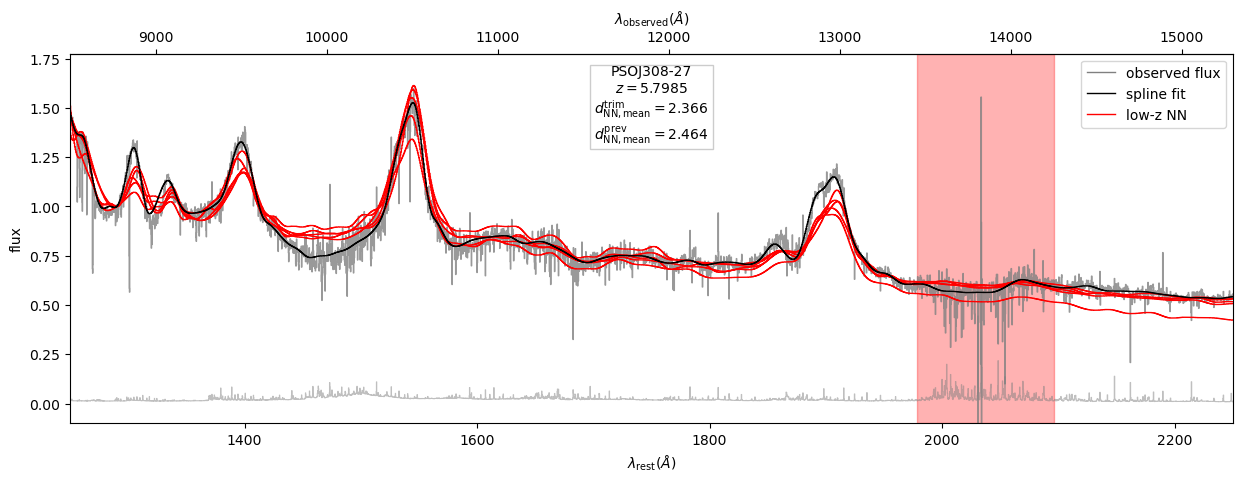

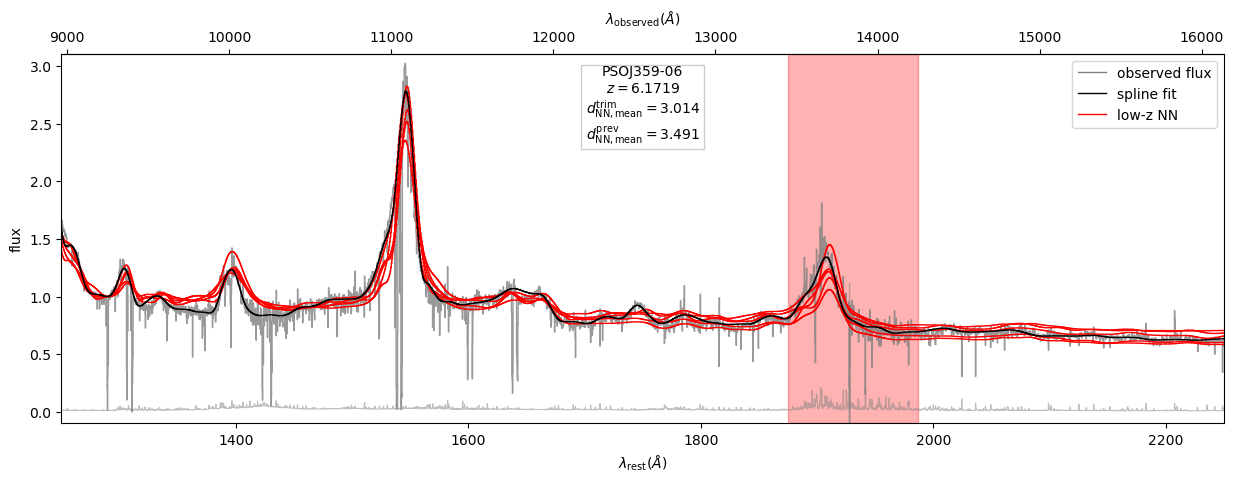

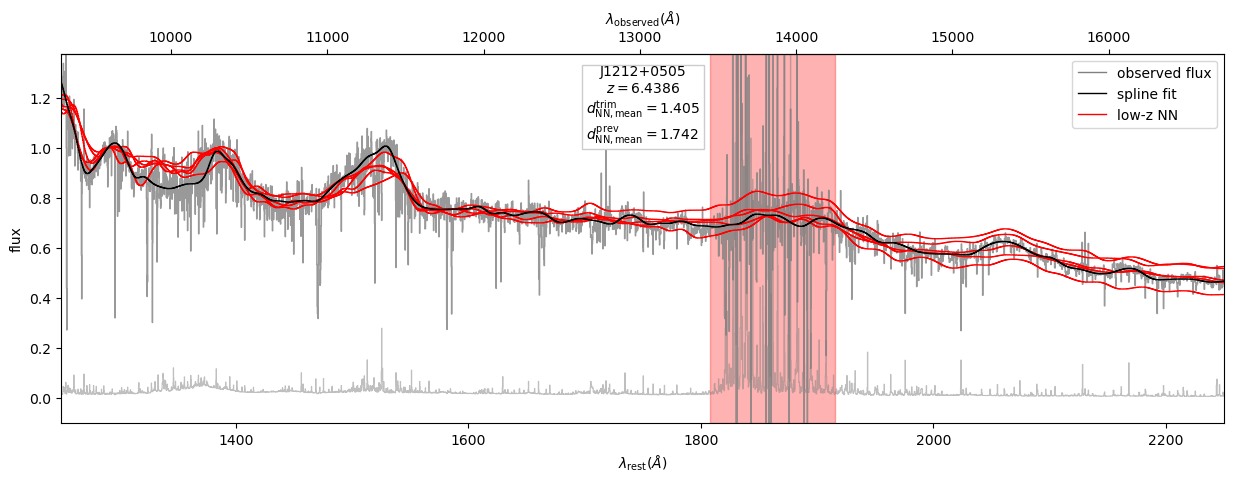

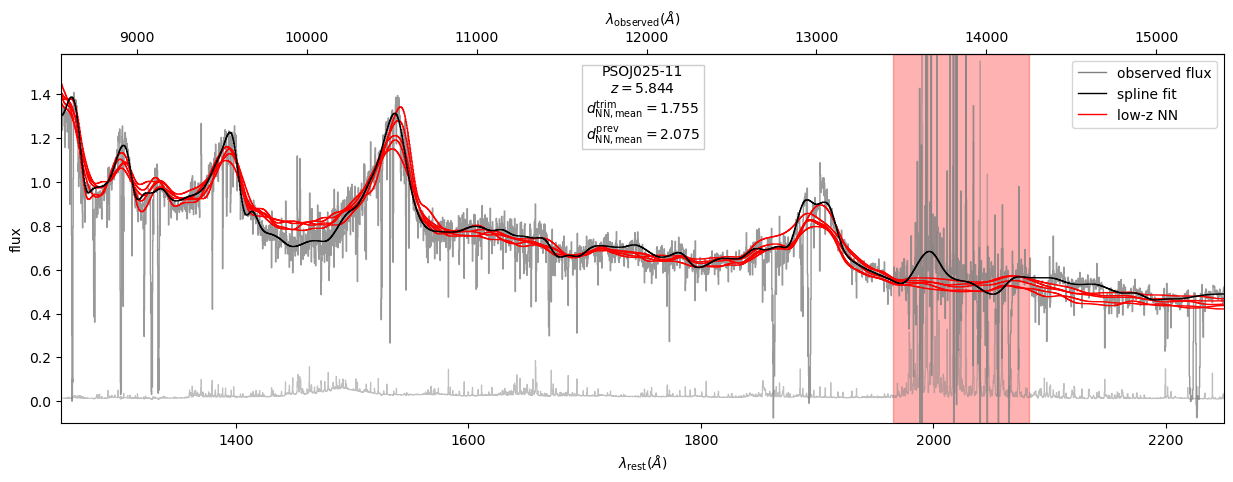

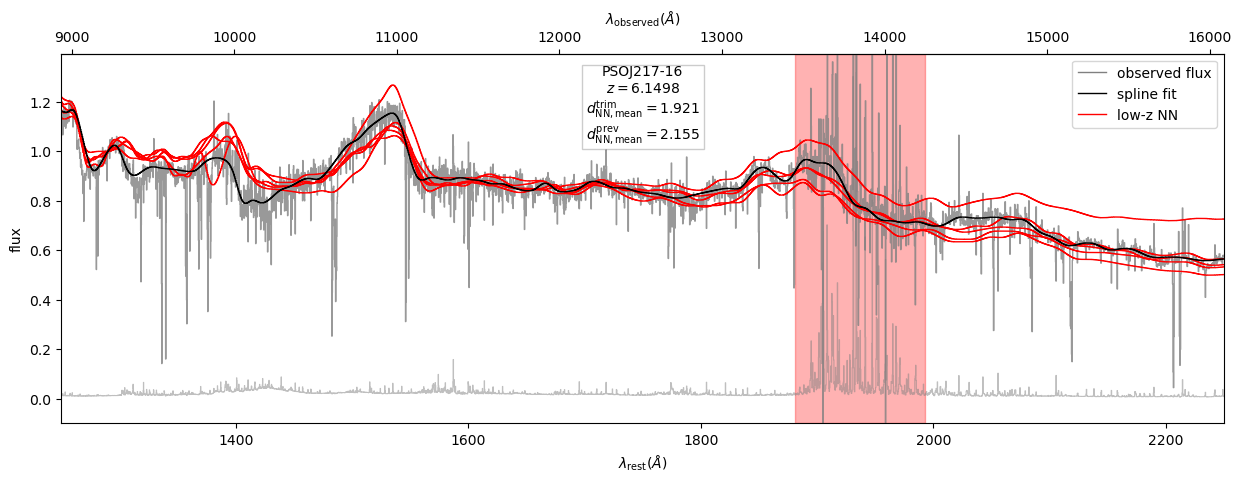

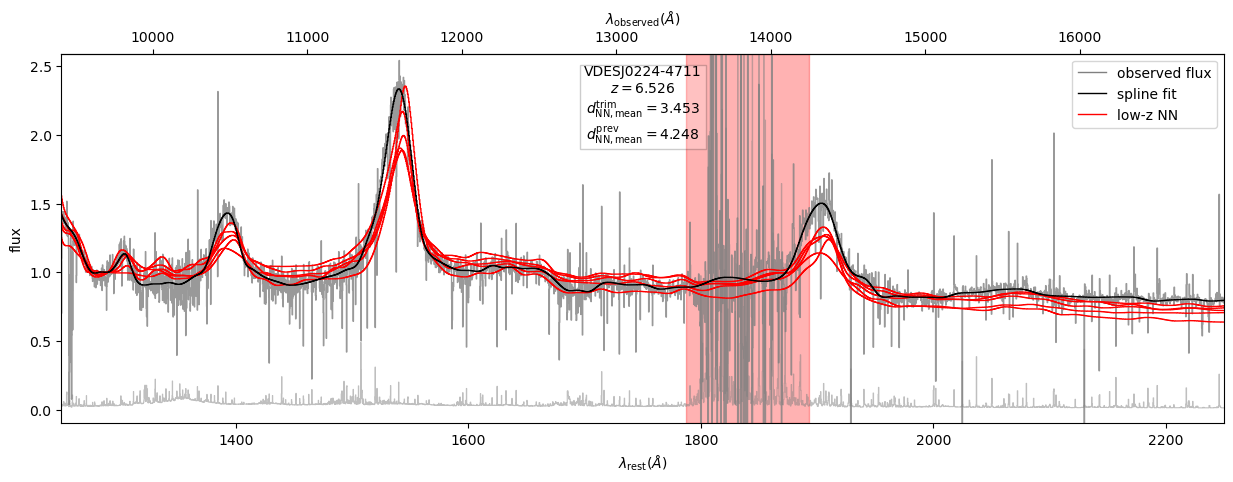

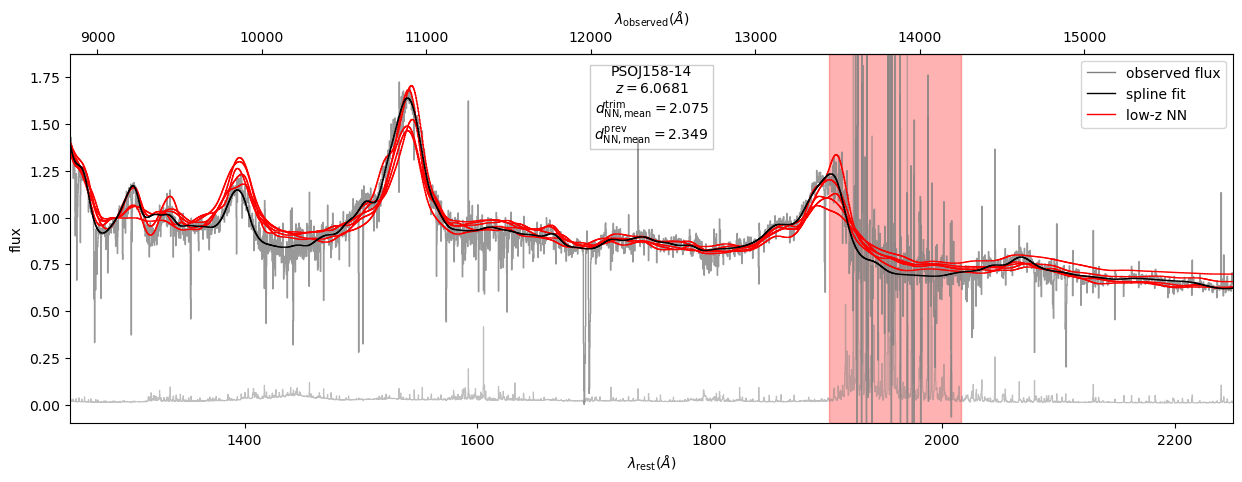

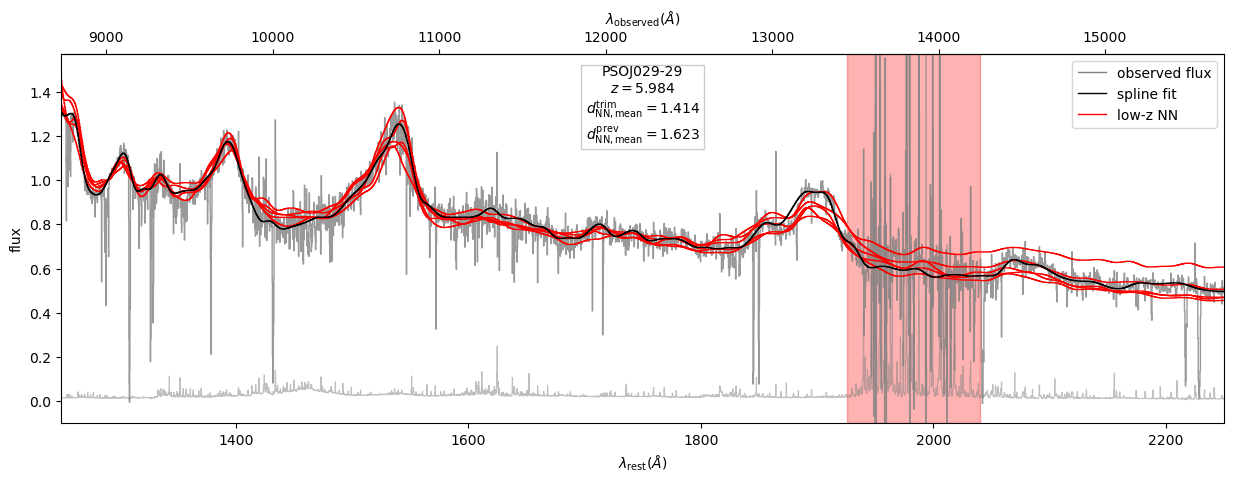

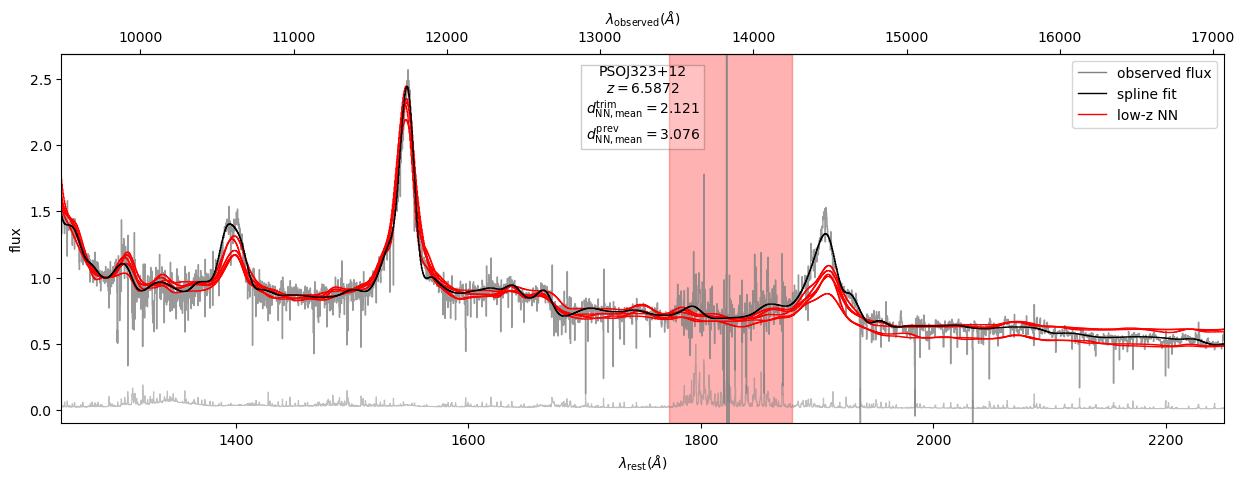

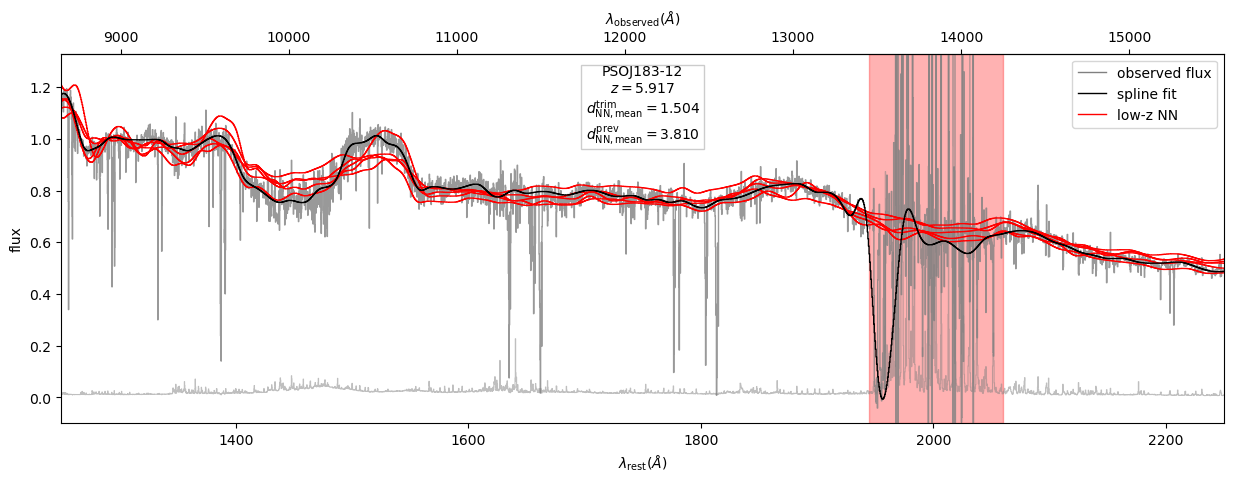

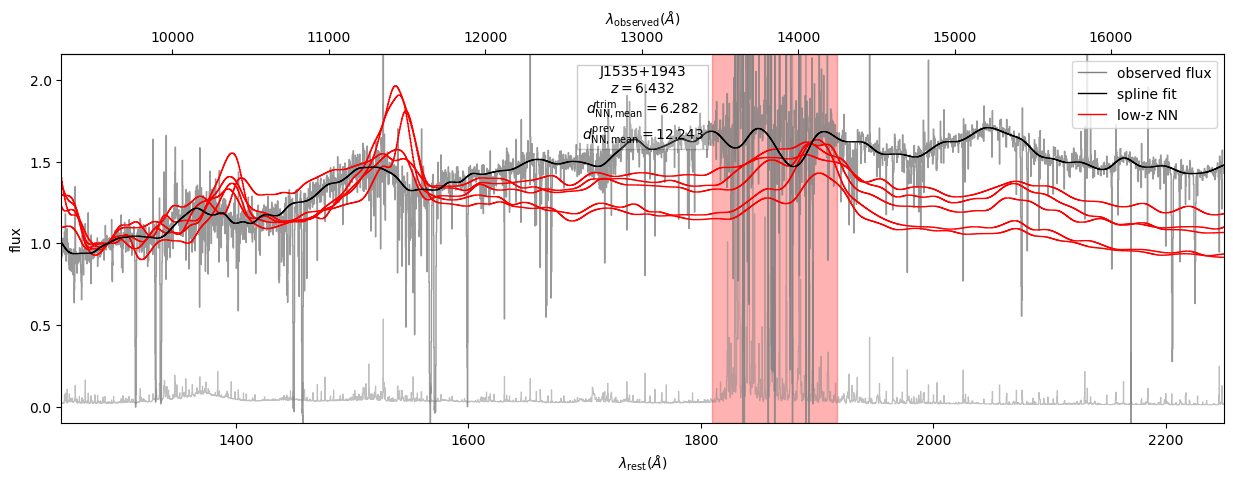

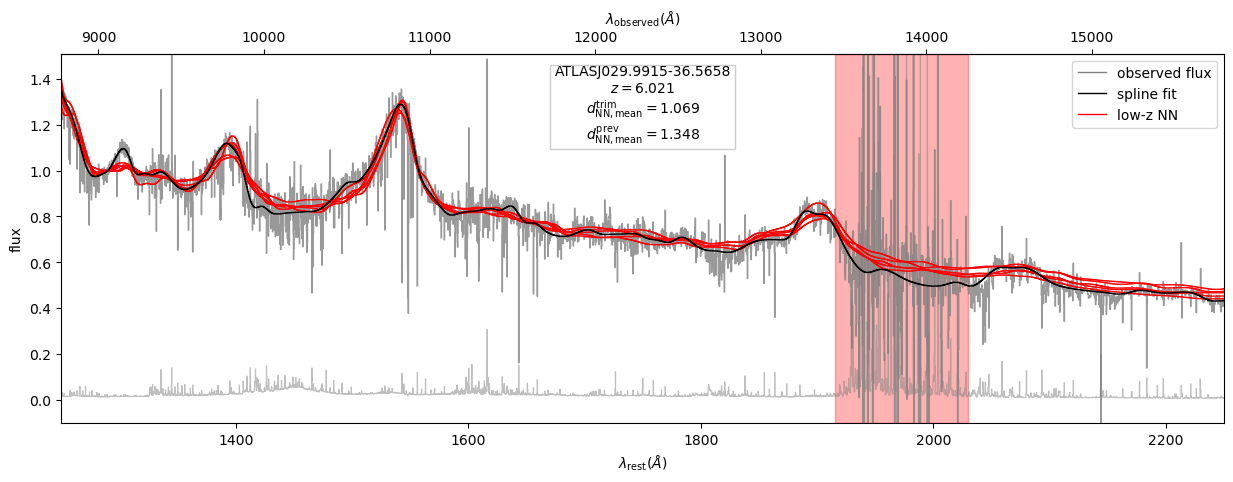

In [7]:
dpath= '/media/bartosz/Volume/BOSS_DR14/data/'
dnn = np.loadtxt(dpath + 'nearest_neighbors_nonBALs_2.txt')
didx = dnn[:,0]
dnn_idx = dnn[:,2:7]
dnn_d = dnn[:,8:13]
dd_mean = np.array([np.mean(d) for d in dnn_d])


dpath = '/media/bartosz/Volume/XQR30/data/'
fpath = dpath + 'fits/'
npath = dpath + 'normed/'

nnfile = np.loadtxt(dpath + 'highZ_NN_trim.txt',dtype='str')
qnames = nnfile[:,0]
nn_IDs = nnfile[:,1:6]
nn_Ds = nnfile[:,6:]

nnfile_prev = np.loadtxt(dpath + 'highZ_NN.txt',dtype='str')
nn_Ds_prev = nnfile_prev[:,6:]

Xmeta = np.loadtxt(dpath + 'meta.txt',dtype='str')
Xqnames = Xmeta[:,0]
Z = Xmeta[:,1]
wl1r = [float(wl) for wl in Xmeta[:,2]]
wl2r = [float(wl) for wl in Xmeta[:,3]]

def func(z):
    def func2(x):
        return x*(1+z)
    return func2

def inv(z):
    def inv2(x):
        return x/(1+z)
    return inv2

props = dict(boxstyle='square', facecolor='white', alpha=0.2)
for i,q in enumerate(qnames):    
    qso_idx = np.nonzero(Xqnames == q)[0][0]
    z = float(Z[qso_idx])

    d_mean = np.mean([float(j) for j in nn_Ds[i]])
    d_mean_prev = np.mean([float(j) for j in nn_Ds_prev[i]])
    
    pp = PdfPages('plots/{}_NN.pdf'.format(q))
    fig = plt.figure(0)
    ax = fig.subplots()
    fig.set_figwidth(15)
    plot_xdata(q,fig,ax,'grey',1)
    Ymax = []
    for idx in nn_IDs[i]:
        ymax = plot_fit(int(idx),fig,ax,'red',1)
        Ymax.append(ymax)
    ymax = plot_xfit(q,fig,ax,'black',1)
    Ymax.append(ymax)
    ax.set_ylim(-0.1,1.1*max(Ymax))
    ax.set_xlim(1250,2250)
    ax.set_xlabel('$\lambda_\mathrm{rest} (\AA)$')
    ax.set_ylabel('flux')
    ax.axvspan(wl1r[i], wl2r[i], alpha=0.3, color='red')
    custom = [Line2D([0], [0], color='grey', lw=1),
                Line2D([0], [0], color='black', lw=1),
                Line2D([0], [0], color='red', lw=1)]
    ax.legend(custom, ['observed flux', 'spline fit', 'low-z NN'], loc=1)
    info = '\n'.join((r'{}'.format(q),
                      r'$z={}$'.format(z),
                      r'$d_\mathrm{{NN,mean}}^\mathrm{{trim}}={:.3f}$'.format(d_mean),
                      r'$d_\mathrm{{NN,mean}}^\mathrm{{prev}}={:.3f}$'.format(d_mean_prev)))

    ax.text(0.5, 0.97, info, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', horizontalalignment='center', bbox=props)
    ax2 = ax.secondary_xaxis('top', functions=(func(z),inv(z)))
    ax2.set_xlabel('$\lambda_\mathrm{observed} (\AA)$')

    plt.show()
    pp.savefig(fig)
    plt.close()
    
    for j,idx in enumerate(nn_IDs[i]):
        sf=plt.figure(1)
        sax=sf.subplots()
        sf.set_figwidth(15)
        plot_xdata(q,sf,sax,'grey',1)
        plot_xfit(q,sf,sax,'black',1)
        plot_data(idx,sf,sax,'blue',1)
        plot_fit(idx,sf,sax,'red',1)
        sax.set_ylim(-0.1,1.1*max(Ymax)) 
        sax.set_xlim(1250,2250)
        sax.axvspan(wl1r[i], wl2r[i], alpha=0.3, color='red')
        sax.set_xlabel('$\lambda_{rest} (\AA)$')
        sax.set_ylabel('flux')

        scustom = [Line2D([0], [0], color='grey', lw=1),
                    Line2D([0], [0], color='black', lw=1),
                    Line2D([0], [0], color='blue', lw=1),
                    Line2D([0], [0], color='red', lw=1)]
        sax.legend(scustom, ['observed flux', 'spline fit', 'NN observed flux', 'NN spline fit'], loc=1)
        sinfo = '\n'.join((r'{}'.format(q),
                           r'$z={:.3f}$'.format(z),
                           r'$d_\mathrm{{NN}}={:.3f}$'.format(float(nn_Ds[i][j]))))
        sax.text(0.5, 0.97, sinfo, transform=sax.transAxes, fontsize=10,
                    verticalalignment='top', horizontalalignment='center', bbox=props)
        z_low = get_z(meta,int(idx))
        sinfo2 = '\n'.join((r'idx: {}'.format(int(idx)),
                            r'$z={:.3f}$'.format(z_low)))
        sax.text(0.7, 0.97, sinfo2, transform=sax.transAxes, fontsize=10,
                     verticalalignment='top', horizontalalignment='center', bbox=props)
        sax2 = sax.secondary_xaxis('top', functions=(func(z),inv(z)))
        sax2.set_xlabel('$\lambda_\mathrm{observed} (\AA)$')
        pp.savefig(sf)       
        plt.close()

    nn = np.loadtxt(dpath + 'eBOSS_NN_trim/{}_NN.txt'.format(q))
    
    idx = nn[:,0]
    
    nn_idx = nn[:,2:7]
    nn_d = nn[:,8:13]
    
    d_mean_eBOSS = np.array([np.mean(d) for d in nn_d])

    bins = np.linspace(0.5, 6.5, 50)
    fig, ax = plt.subplots()

    plt.hist(dd_mean,bins,density=True,alpha=0.5,label=r'$\lambda^\mathrm{{prev}}=2250\mathrm{{\AA}}$',color='tab:orange')
    plt.hist(d_mean_eBOSS,bins, density = True,alpha=0.8,label=r'$\lambda_{{13450}}={:.0f}\mathrm{{\AA}}$'.format(wl1r[i]),color='tab:green')
    plt.axvline(d_mean_prev,color='tab:orange',label='$d_\mathrm{{mean,NN}}^\mathrm{{prev}}={:.3f}$'.format(d_mean_prev))
    plt.axvline(d_mean,color='tab:green',label='$d_\mathrm{{mean,NN}}^\mathrm{{trim}}={:.3f}$'.format(d_mean))
    plt.xlim(0.4,6.5)
    plt.legend()
    plt.xlabel('NN mean distance')
    plt.ylabel('norm. counts')
    plt.title('eBOSS NNs for {}'.format(q))
    
    plt.grid(axis='y', alpha=0.75)
    pp.savefig(fig)
    plt.close()

    pp.close()

qso name                  redshift    lambda_{rest,13450}    lambda_{rest,14250}    d_{mean,trim}    d_{mean,prev}
----------------------  ----------  ---------------------  ---------------------  ---------------  ---------------
PSOJ060+24                  6.192                 1870.13                1981.37          2.36464          3.15484
PSOJ242-12                  5.837                 1967.24                2084.25          2.2458           2.41912
PSOJ308-27                  5.7985                1978.38                2096.05          2.36648          2.46378
PSOJ359-06                  6.1719                1875.37                1986.92          3.01362          3.49082
J1212+0505                  6.4386                1808.14                1915.68          1.40481          1.74203
PSOJ025-11                  5.844                 1965.23                2082.12          1.75454          2.07471
PSOJ217-16                  6.1498                1881.17                1993.06

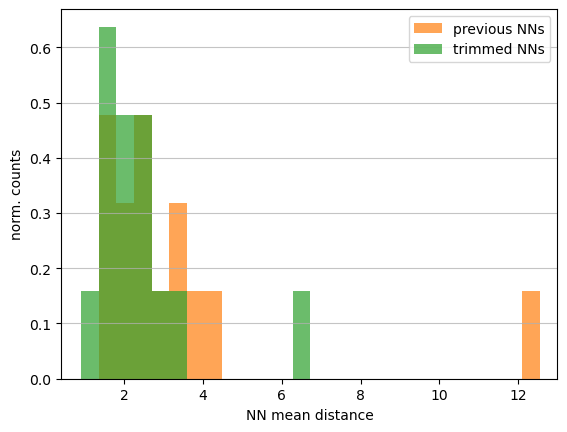

In [6]:
dpath = '/media/bartosz/Volume/XQR30/data/'
Xmeta = np.loadtxt(dpath + 'meta.txt',dtype='str')

nnfile = np.loadtxt(dpath + 'highZ_NN_trim.txt',dtype='str')
nn_Ds = nnfile[:,6:]
d_means = [np.mean([float(j) for j in nn]) for nn in nn_Ds]

nnfile_prev = np.loadtxt(dpath + 'highZ_NN.txt',dtype='str')
nn_Ds_prev = nnfile_prev[:,6:]
d_means_prev = [np.mean([float(j) for j in nn]) for nn in nn_Ds_prev]

table=[]
for i,j in enumerate(Xmeta):
    table.append(np.append(np.append(Xmeta[i],d_means[i]),d_means_prev[i]))

header = ['qso name', 'redshift', 'lambda_{rest,13450}', 'lambda_{rest,14250}', 'd_{mean,trim}', 'd_{mean,prev}']
print(tabulate(table, headers=header))

bins = np.linspace(0, 13, 30)
plt.hist(d_means_prev,bins, density = True,alpha=0.7, color='tab:orange',label='previous NNs')
plt.hist(d_means,bins, density = True, alpha=0.7,color='tab:green',label='trimmed NNs')
plt.legend()
plt.xlabel('NN mean distance')
plt.ylabel('norm. counts')
plt.grid(axis='y', alpha=0.75)
plt.xlim(0.4,13)
plt.show()

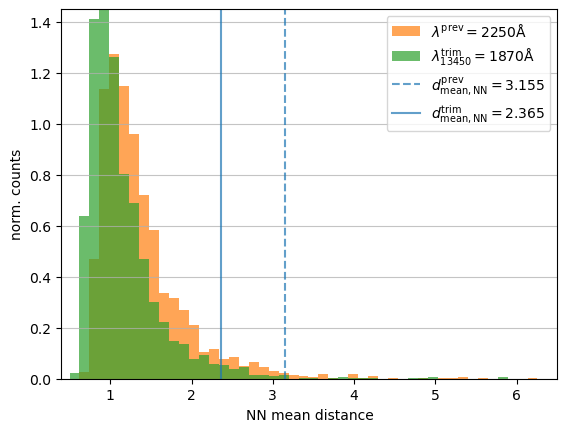

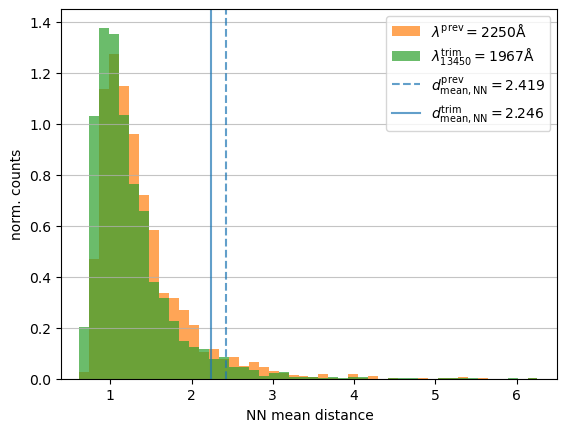

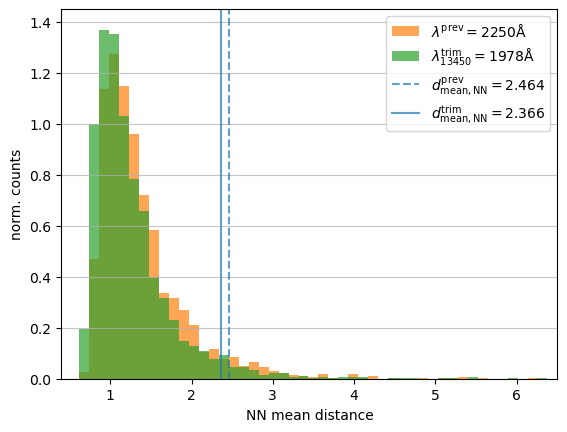

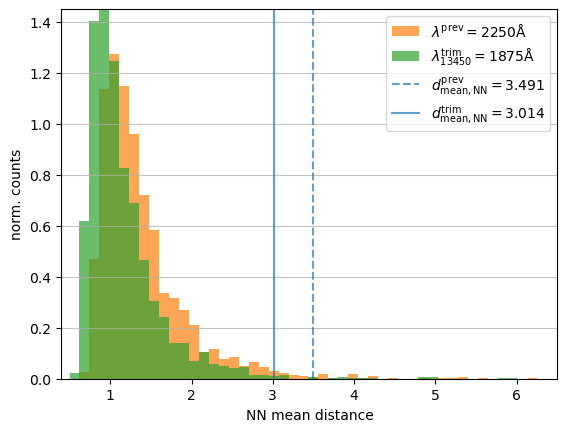

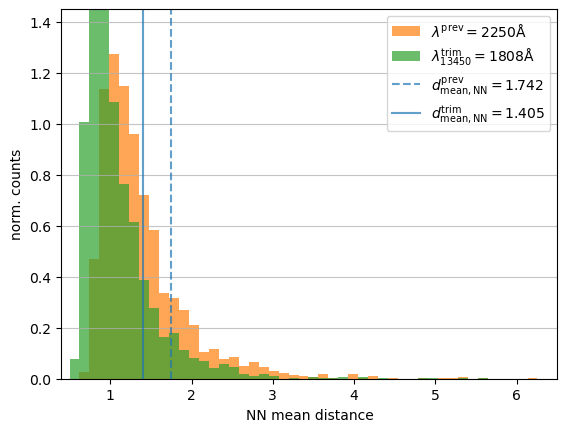

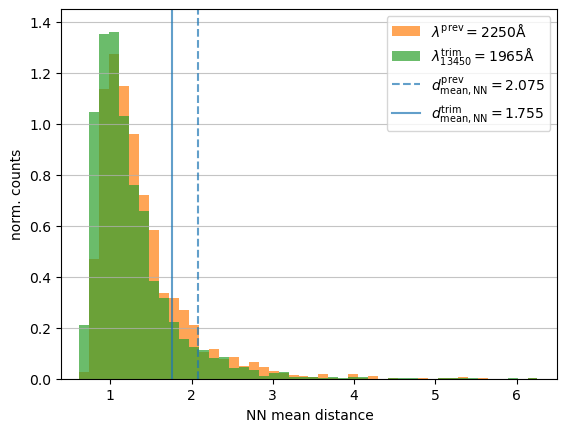

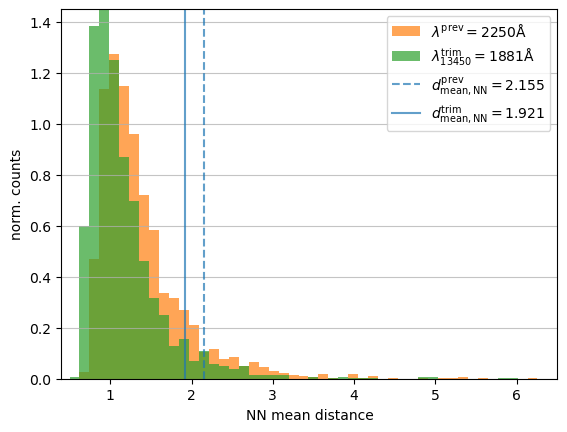

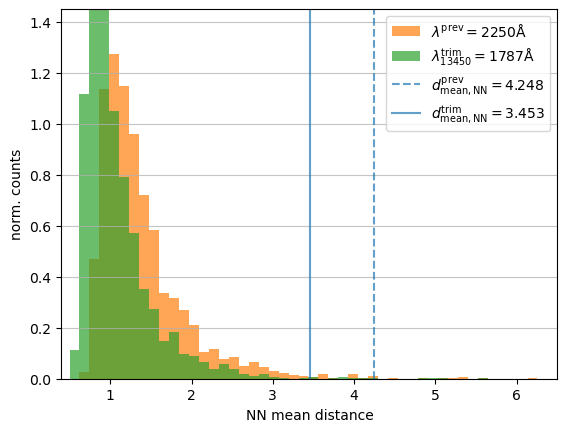

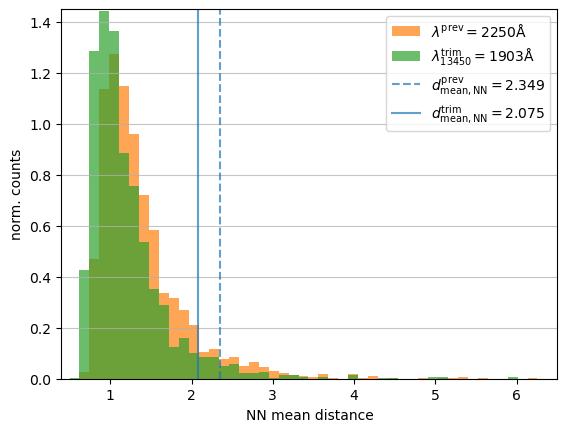

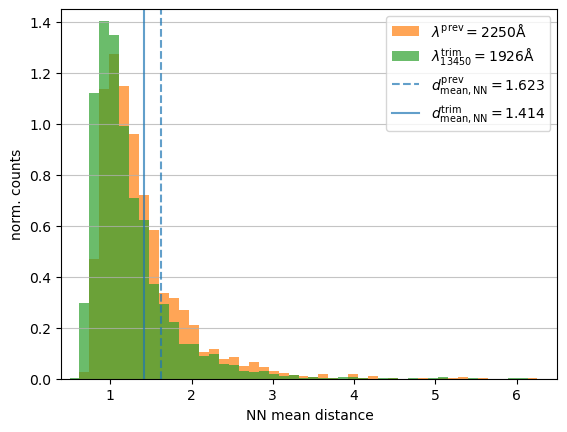

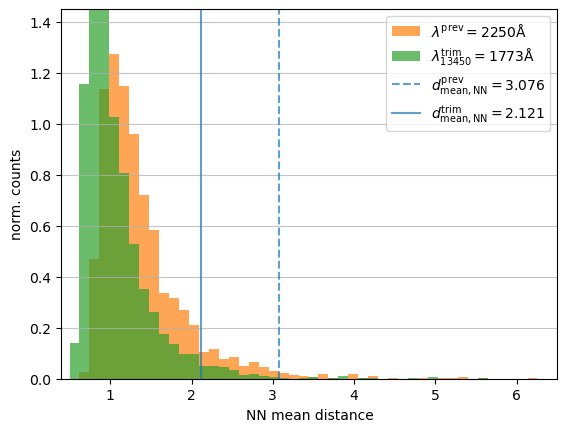

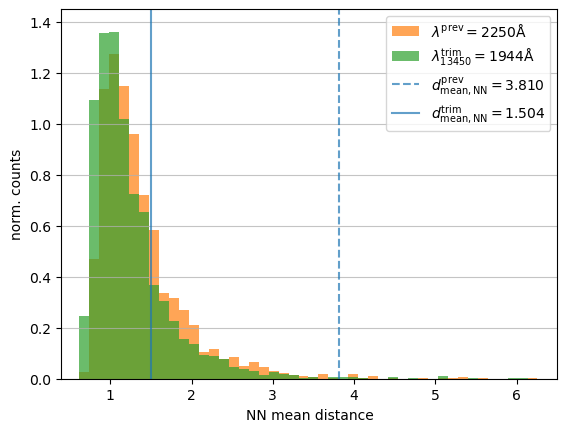

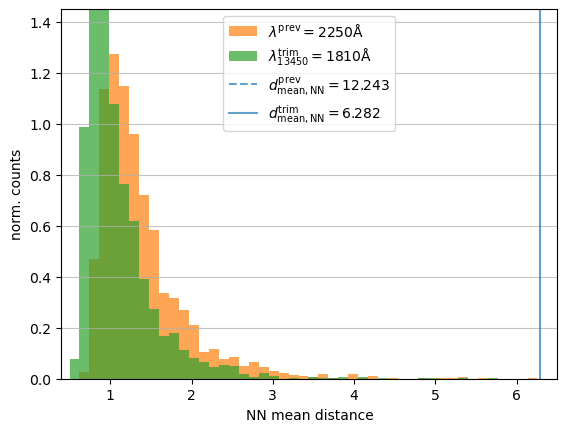

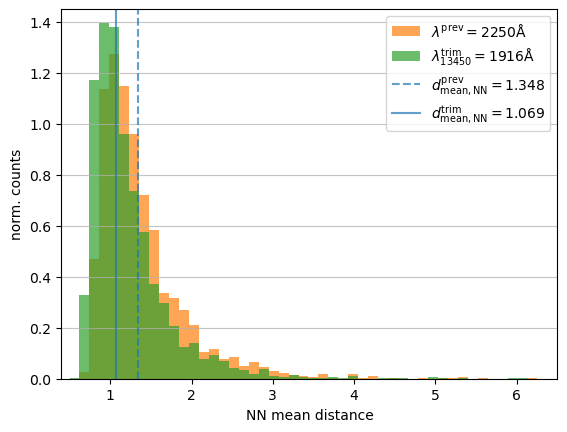

In [37]:
xpath = '/media/bartosz/Volume/XQR30/data/'
dpath= '/media/bartosz/Volume/BOSS_DR14/data/'
xmeta = np.loadtxt(xpath+'meta.txt',dtype='str')
xnames = xmeta[:,0]
xZ = [float(z) for z in xmeta[:,1]]
wl1r = [float(wl) for wl in xmeta[:,2]]

nnfile = np.loadtxt(xpath + 'highZ_NN_trim.txt',dtype='str')
nn_Ds = nnfile[:,6:]
d_means = [np.mean([float(j) for j in nn]) for nn in nn_Ds]

nnfile_prev = np.loadtxt(xpath + 'highZ_NN.txt',dtype='str')
nn_Ds_prev = nnfile_prev[:,6:]
d_means_prev = [np.mean([float(j) for j in nn]) for nn in nn_Ds_prev]

dnn = np.loadtxt(dpath + 'nearest_neighbors_nonBALs_2.txt')
didx = dnn[:,0]
dnn_idx = dnn[:,2:7]
dnn_d = dnn[:,8:13]
dd_mean = np.array([np.mean(d) for d in dnn_d])

for i,xqso in enumerate(xnames):  
    nn = np.loadtxt(xpath + 'eBOSS_NN_trim/{}_NN.txt'.format(xqso))    
    idx = nn[:,0]    
    nn_idx = nn[:,2:7]
    nn_d = nn[:,8:13]   
    d_mean = np.array([np.mean(d) for d in nn_d])

    bins = np.linspace(0.5, 6.5, 50)
    fig, ax = plt.subplots()
    plt.hist(dd_mean,bins,density=True,alpha=0.7,label=r'$\lambda^\mathrm{{prev}}=2250\mathrm{{\AA}}$',color='tab:orange')
    plt.hist(d_mean,bins, density = True,alpha=0.7,label=r'$\lambda_{{13450}}^\mathrm{{trim}}={:.0f}\mathrm{{\AA}}$'.format(wl1r[i]),color='tab:green')
    plt.axvline(d_means_prev[i],color='tab:blue',alpha=0.7,linestyle='--',label='$d_\mathrm{{mean,NN}}^\mathrm{{prev}}={:.3f}$'.format(d_means_prev[i]))
    plt.axvline(d_means[i],color='tab:blue',alpha=0.7,linestyle='-',label='$d_\mathrm{{mean,NN}}^\mathrm{{trim}}={:.3f}$'.format(d_means[i]))
    plt.xlim(0.4,6.5)
    plt.ylim(0,1.45)
    plt.legend()
    plt.xlabel('NN mean distance')
    plt.ylabel('norm. counts')
    #plt.title('eBOSS NNs for {}'.format(xqso))
    
    #KS test
    KS_test = scipy.stats.ks_2samp(counts,xcounts)
    KSinfo = '\n'.join((
                    r'KS stat = {}'.format(KS_test[0]),
                    r'p-value = {:.2E}'.format(KS_test[1])))
    props = dict(boxstyle='square', facecolor='white', alpha=0.2)
    ax.text(0.65,0.8,KSinfo,transform=ax.transAxes,fontsize=10,verticalalignment='top', bbox=props)
    
    plt.grid(axis='y', alpha=0.75)
    #plt.savefig('plots/distr_dmean_norm_psoj02929.png',format='png')
    plt.show()

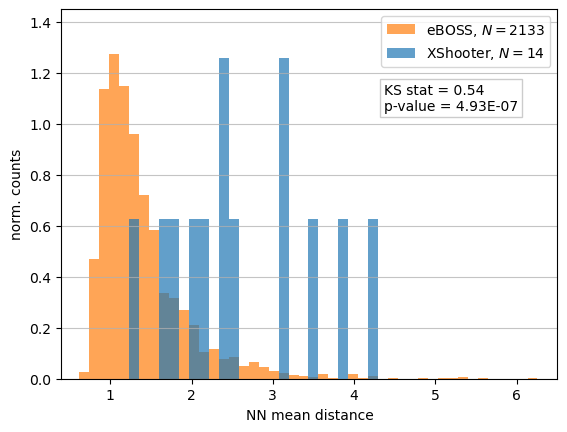

In [50]:
dpath= '/media/bartosz/Volume/BOSS_DR14/data/'

nn = np.loadtxt(dpath + 'nearest_neighbors_nonBALs_2.txt')

idx = nn[:,0]

nn_idx = nn[:,2:7]
nn_d = nn[:,8:13]

d_mean = np.array([np.mean(d) for d in nn_d])

counts,bins = np.histogram(d_mean,bins=50, density=True)

bins = np.linspace(0.5, 6.5, 50)
fig, ax = plt.subplots()
plt.hist(d_mean,bins,density=True,color='tab:orange', alpha=0.7,label='eBOSS, $N={}$'.format(len(d_mean)))


xpath = '/media/bartosz/Volume/XQR30/data/'
xnn = np.loadtxt(xpath+'highZ_NN.txt',dtype='str')
xnn_d = [[float(x) for x in X] for X in xnn[:,6:11]]
xd_mean = np.array([np.mean(d) for d in xnn_d])
xcounts,xbins = np.histogram(xd_mean,bins=50, density=True)
xbin_widths = np.diff(xbins)
xbin_centers = xbins[:-1] + xbin_widths/2
plt.hist(xd_mean,bins,density=True,color='tab:blue',alpha=0.7,label='XShooter, $N={}$'.format(len(xd_mean)))

plt.legend()
plt.xlabel('NN mean distance')
plt.ylabel('norm. counts')
plt.xlim(0.4,6.5)
plt.ylim(0,1.45)


plt.grid(axis='y', alpha=0.75)

#KS test
KS_test = scipy.stats.ks_2samp(counts,xcounts)
KSinfo = '\n'.join((
                r'KS stat = {}'.format(KS_test[0]),
                r'p-value = {:.2E}'.format(KS_test[1])))
props = dict(boxstyle='square', facecolor='white', alpha=0.2)
ax.text(0.65,0.8,KSinfo,transform=ax.transAxes,fontsize=10,verticalalignment='top', bbox=props)

plt.savefig('plots/distr_dmean_norm_v2.png',format='png')
plt.show()


In [1]:
import os
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord

from specdb import query_catalog as spqcat
from specdb import utils as spdbu
from specdb.specdb import SpecDB, IgmSpec
from specdb import specdb as sdbsdb

from pyigm.surveys.llssurvey import LLSSurvey
import matplotlib.pyplot as plt

import importlib
import random

import pickle

# select redshift range snd SNR threshold
z_min = 2
z_max = 3
SNR = 10


# results path
rpath= '/media/bartosz/Volume/BOSS_DR14/'          

# data file    
db_file = '/media/bartosz/Volume/igmspec_data/DB/IGMspec_DB_v03.1.hdf5'         

importlib.reload(sdbsdb)
sdb = sdbsdb.SpecDB(db_file=db_file)


# meta data
all_meta = sdb['BOSS_DR14'].meta            


# load and save spectra of selected objects
index = []
err = []
for idx in range(len(all_meta)):
    print(idx, 'of', len(all_meta))
    try:
        spec, meta = sdb.spectra_from_ID(idx)

    except Exception as error:
        index.append(idx)
        err.append(type(error).__name__)

read_sets: Using set file -- 
  /home/bartosz/linetools/linetools/lists/sets/llist_v1.3.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Database is igmspec
Created on 2019-Mar-06
Version: v03.1
0 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
7 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
8 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
9 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
10 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
11 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
12 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
13 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
14 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
15 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
16 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
17 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
18 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
19 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
20 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
21 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
22 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
23 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
24 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
25 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
26 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
27 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
28 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
29 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
30 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
31 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
32 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
33 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
34 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
35 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
36 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
37 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
38 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
39 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
40 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
41 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
42 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
43 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
44 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
45 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
46 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


47 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
48 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
49 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
50 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
51 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
52 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
53 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
54 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
55 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
56 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


57 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
58 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


59 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
60 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


61 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
62 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


63 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
64 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
65 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
66 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
67 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
68 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
69 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
70 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
71 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
72 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
73 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
74 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
75 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
76 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
77 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
78 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
79 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
80 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
81 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


82 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
83 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


84 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
85 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
86 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
87 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
88 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
89 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
90 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
91 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
92 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
93 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
94 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
95 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
96 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
97 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
98 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
99 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
100 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
101 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
102 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
103 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


104 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
105 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
106 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
107 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
108 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
109 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
110 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
111 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
112 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
113 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
114 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
115 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
116 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
117 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
118 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
119 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
120 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
121 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
122 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
123 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
124 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


125 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
126 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
127 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
128 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
129 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
130 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
131 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
132 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
133 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
134 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
135 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
136 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
137 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
138 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
139 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
140 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
141 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
142 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
143 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
144 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
145 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
146 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
147 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
148 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
149 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


150 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
151 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
152 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
153 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
154 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
155 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
156 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
157 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
158 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
159 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
160 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
161 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
162 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
163 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
164 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
165 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
166 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
167 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
168 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
169 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
170 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
171 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
172 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
173 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
174 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
175 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
176 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
177 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
178 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
179 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
180 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
181 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
182 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
183 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
184 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
185 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
186 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
187 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
188 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
189 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
190 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
191 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
192 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
193 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
194 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
195 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
196 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
197 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
198 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
199 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
200 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
201 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
202 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
203 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
204 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
205 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
206 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
207 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
208 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
209 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
210 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
211 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
212 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
213 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
214 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
215 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
216 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
217 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


218 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
219 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


220 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
221 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


222 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
223 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
224 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
225 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
226 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
227 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
228 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
229 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


230 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
231 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


232 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
233 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


234 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
235 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


236 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
237 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


238 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
239 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


240 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
241 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
242 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
243 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
244 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
245 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
246 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
247 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


248 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
249 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


250 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
251 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


252 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
253 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


254 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
255 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
256 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


257 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
258 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
259 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
260 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
261 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
262 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
263 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
264 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


265 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
266 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
267 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
268 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
269 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
270 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
271 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
272 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
273 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
274 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
275 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
276 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


277 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
278 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
279 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


280 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
281 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
282 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
283 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
284 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
285 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
286 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
287 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
288 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
289 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
290 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
291 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
292 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
293 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
294 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


295 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
296 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
297 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
298 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
299 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
300 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
301 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
302 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
303 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
304 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
305 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


306 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
307 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
308 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
309 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
310 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
311 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
312 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
313 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
314 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
315 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
316 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
317 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
318 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
319 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
320 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
321 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
322 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
323 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
324 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
325 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
326 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
327 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
328 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


329 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
330 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
331 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
332 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


333 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
334 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


335 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
336 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
337 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
338 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
339 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
340 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
341 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
342 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
343 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
344 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
345 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
346 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
347 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
348 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
349 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


350 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
351 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


352 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
353 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


354 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
355 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
356 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
357 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
358 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
359 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
360 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
361 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
362 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


363 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
364 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
365 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
366 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
367 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
368 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
369 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
370 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
371 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


372 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
373 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
374 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
375 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
376 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
377 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
378 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
379 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


380 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
381 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
382 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


383 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


384 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
385 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


386 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
387 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


388 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
389 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


390 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
391 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
392 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
393 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
394 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


395 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
396 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
397 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
398 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
399 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
400 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
401 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
402 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
403 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
404 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
405 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


406 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
407 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
408 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
409 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
410 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
411 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
412 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


413 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
414 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
415 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
416 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
417 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
418 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
419 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
420 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
421 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
422 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
423 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
424 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
425 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


426 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
427 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


428 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
429 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
430 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
431 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
432 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
433 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
434 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
435 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
436 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
437 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


438 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
439 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


440 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
441 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


442 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
443 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
444 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
445 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
446 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
447 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
448 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
449 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
450 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


451 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
452 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


453 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
454 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
455 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
456 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
457 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
458 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
459 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
460 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
461 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
462 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
463 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
464 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
465 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
466 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
467 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
468 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
469 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
470 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
471 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


472 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
473 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


474 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
475 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


476 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
477 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


478 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
479 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
480 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
481 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
482 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
483 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
484 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
485 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
486 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
487 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
488 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
489 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
490 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
491 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
492 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
493 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
494 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
495 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
496 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
497 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
498 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
499 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
500 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
501 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
502 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
503 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


504 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
505 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


506 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
507 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
508 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
509 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
510 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
511 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


512 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
513 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


514 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
515 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


516 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
517 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
518 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
519 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
520 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
521 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
522 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
523 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
524 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
525 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
526 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
527 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


528 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
529 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
530 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
531 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
532 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
533 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
534 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
535 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
536 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
537 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
538 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
539 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
540 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
541 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


542 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
543 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


544 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
545 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
546 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
547 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
548 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
549 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
550 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
551 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
552 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
553 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
554 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
555 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
556 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
557 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
558 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
559 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
560 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
561 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
562 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
563 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
564 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
565 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
566 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
567 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
568 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
569 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
570 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
571 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
572 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
573 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
574 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
575 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
576 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
577 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
578 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
579 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
580 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
581 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
582 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
583 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
584 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
585 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
586 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
587 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
588 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
589 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
590 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
591 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
592 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
593 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
594 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
595 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
596 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
597 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
598 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
599 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
600 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
601 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
602 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
603 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
604 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
605 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
606 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
607 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
608 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
609 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
610 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
611 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
612 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
613 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
614 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
615 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
616 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
617 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


618 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
619 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


620 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
621 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


622 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
623 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


624 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
625 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


626 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
627 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


628 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
629 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


630 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
631 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


632 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
633 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


634 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
635 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


636 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
637 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


638 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
639 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
640 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
641 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
642 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
643 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
644 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
645 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
646 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
647 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
648 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
649 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
650 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
651 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
652 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
653 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
654 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
655 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
656 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
657 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
658 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
659 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
660 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


661 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
662 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
663 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
664 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
665 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
666 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
667 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
668 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
669 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
670 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
671 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
672 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
673 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
674 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
675 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
676 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
677 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
678 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
679 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
680 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


681 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
682 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


683 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
684 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


685 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
686 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
687 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
688 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
689 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
690 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
691 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
692 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
693 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
694 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


695 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
696 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
697 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
698 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
699 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


700 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
701 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


702 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
703 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


704 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
705 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


706 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
707 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
708 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
709 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
710 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
711 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


712 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
713 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
714 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
715 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
716 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
717 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
718 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
719 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
720 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
721 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
722 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
723 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
724 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
725 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
726 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
727 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
728 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
729 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
730 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
731 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
732 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
733 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
734 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
735 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
736 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
737 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
738 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
739 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
740 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
741 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
742 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
743 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
744 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
745 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
746 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


747 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
748 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
749 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
750 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
751 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
752 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
753 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
754 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
755 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
756 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


757 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
758 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


759 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
760 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
761 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
762 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
763 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
764 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
765 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
766 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
767 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
768 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
769 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
770 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
771 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
772 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
773 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
774 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
775 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
776 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
777 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
778 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
779 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
780 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
781 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
782 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
783 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
784 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
785 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
786 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
787 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
788 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
789 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
790 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
791 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
792 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
793 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
794 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
795 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
796 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
797 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
798 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
799 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
800 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


801 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
802 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


803 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
804 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


805 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
806 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
807 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
808 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
809 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
810 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
811 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
812 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
813 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
814 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
815 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
816 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
817 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
818 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


819 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
820 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
821 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
822 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
823 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


824 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
825 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
826 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
827 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
828 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
829 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
830 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
831 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
832 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
833 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
834 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
835 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
836 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
837 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
838 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
839 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
840 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
841 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
842 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


843 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
844 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
845 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
846 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
847 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
848 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
849 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


850 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
851 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


852 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
853 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
854 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
855 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
856 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
857 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
858 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


859 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
860 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


861 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
862 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


863 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
864 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
865 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
866 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
867 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
868 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
869 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


870 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
871 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
872 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
873 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
874 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
875 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
876 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
877 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


878 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
879 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


880 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
881 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


882 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
883 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


884 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
885 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
886 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
887 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
888 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
889 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
890 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
891 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
892 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
893 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
894 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
895 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
896 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
897 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
898 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
899 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
900 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
901 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
902 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
903 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


904 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
905 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
906 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


907 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
908 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


909 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
910 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
911 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
912 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
913 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


914 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
915 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


916 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
917 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


918 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
919 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


920 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
921 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
922 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
923 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
924 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


925 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
926 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


927 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
928 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


929 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
930 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


931 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
932 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
933 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
934 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
935 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
936 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
937 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
938 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
939 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
940 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
941 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
942 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


943 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
944 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
945 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
946 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
947 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
948 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
949 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


950 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
951 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


952 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
953 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
954 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
955 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
956 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


957 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
958 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
959 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
960 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
961 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
962 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
963 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


964 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
965 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


966 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
967 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
968 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
969 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
970 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
971 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
972 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


973 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
974 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
975 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
976 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
977 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
978 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
979 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
980 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
981 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
982 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


983 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
984 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


985 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
986 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
987 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
988 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
989 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
990 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
991 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


992 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
993 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


994 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
995 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
996 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
997 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
998 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
999 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1000 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1001 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1002 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1003 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1004 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1005 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1006 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1007 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1008 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1009 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1010 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1011 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1012 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1013 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1014 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1015 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1016 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1017 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1018 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1019 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1020 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1021 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1022 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1023 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1024 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1025 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1026 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1027 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1028 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1029 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1030 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1031 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1032 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1033 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1034 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1035 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1036 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1037 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1038 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1039 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1040 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1041 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1042 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1043 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1044 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1045 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1046 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1047 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1048 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1049 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1050 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1051 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1052 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1053 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1054 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1055 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1056 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1057 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1058 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1059 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1060 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1061 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1062 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1063 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1064 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1065 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1066 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1067 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1068 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1069 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1070 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1071 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1072 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1073 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1074 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1075 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1076 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1077 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1078 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1079 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1080 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1081 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1082 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1083 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1084 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1085 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1086 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1087 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1088 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.003072 Gb
Loaded spectra
Staged 1 spectra totalling 0.00096 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 0.006 Gb
Loaded spectra
1089 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1090 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1091 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1092 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1093 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1094 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1095 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1096 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1097 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1098 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1099 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1100 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1101 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1102 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1103 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1104 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1105 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1106 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1107 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1108 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1109 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1110 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1111 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1112 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1113 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1114 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1115 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1116 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1117 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1118 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1119 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1120 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1121 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1122 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1123 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1124 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1125 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1126 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1127 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1128 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1129 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1130 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1131 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1132 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1133 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1134 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1135 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1136 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1137 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1138 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1139 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1140 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1141 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1142 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1143 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1144 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1145 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1146 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1147 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1148 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1149 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1150 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1151 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1152 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1153 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1154 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1155 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1156 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1157 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1158 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1159 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1160 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1161 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1162 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1163 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1164 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1165 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1166 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1167 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1168 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1169 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1170 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1171 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1172 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1173 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1174 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1175 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1176 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1177 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1178 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1179 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1180 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1181 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1182 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1183 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1184 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1185 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1186 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1187 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1188 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1189 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1190 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1191 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1192 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1193 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1194 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1195 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1196 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1197 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1198 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1199 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1200 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1201 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1202 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1203 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1204 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1205 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1206 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1207 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1208 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1209 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1210 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1211 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1212 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1213 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1214 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1215 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1216 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1217 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1218 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1219 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1220 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1221 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1222 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1223 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1224 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1225 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1226 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1227 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1228 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1229 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1230 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1231 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1232 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1233 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1234 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1235 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1236 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1237 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1238 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1239 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1240 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1241 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1242 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1243 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1244 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1245 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1246 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1247 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1248 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1249 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1250 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1251 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1252 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1253 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1254 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1255 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1256 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1257 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1258 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1259 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1260 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1261 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1262 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1263 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1264 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1265 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1266 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1267 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1268 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1269 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1270 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1271 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1272 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1273 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1274 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1275 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1276 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1277 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1278 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1279 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1280 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1281 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1282 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1283 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1284 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1285 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1286 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1287 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1288 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1289 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1290 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1291 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1292 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1293 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1294 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1295 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1296 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1297 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1298 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1299 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1300 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1301 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1302 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1303 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1304 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1305 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1306 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1307 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1308 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1309 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1310 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1311 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1312 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1313 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1314 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1315 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1316 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1317 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1318 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1319 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1320 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1321 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1322 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1323 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1324 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1325 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1326 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1327 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1328 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1329 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1330 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1331 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1332 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1333 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1334 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1335 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1336 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1337 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1338 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1339 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1340 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1341 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1342 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1343 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1344 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1345 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1346 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1347 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1348 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1349 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1350 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1351 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1352 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1353 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1354 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1355 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1356 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1357 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1358 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1359 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1360 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1361 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1362 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1363 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1364 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1365 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1366 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1367 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1368 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1369 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1370 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1371 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1372 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1373 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1374 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1375 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1376 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1377 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1378 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1379 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1380 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1381 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1382 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1383 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1384 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1385 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1386 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1387 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1388 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1389 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1390 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1391 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1392 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1393 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1394 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1395 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1396 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1397 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1398 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1399 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1400 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1401 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1402 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1403 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1404 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1405 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1406 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1407 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1408 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1409 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1410 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1411 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1412 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1413 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1414 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1415 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1416 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1417 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1418 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1419 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1420 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1421 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1422 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1423 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1424 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1425 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1426 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1427 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1428 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1429 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1430 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1431 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1432 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1433 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1434 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1435 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1436 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1437 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1438 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1439 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1440 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1441 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1442 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1443 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1444 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1445 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1446 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1447 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1448 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1449 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1450 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1451 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1452 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1453 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1454 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1455 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1456 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1457 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1458 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1459 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1460 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1461 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1462 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1463 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1464 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1465 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1466 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1467 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1468 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1469 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1470 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1471 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1472 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1473 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1474 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1475 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1476 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1477 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1478 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1479 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1480 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1481 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1482 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1483 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1484 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1485 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1486 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1487 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1488 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1489 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1490 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1491 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1492 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1493 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1494 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1495 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1496 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1497 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1498 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1499 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1500 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1501 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1502 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1503 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1504 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1505 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1506 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1507 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1508 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1509 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1510 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1511 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1512 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1513 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1514 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1515 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1516 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1517 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1518 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1519 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1520 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1521 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1522 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1523 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1524 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1525 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1526 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1527 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1528 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1529 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1530 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1531 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1532 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1533 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1534 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1535 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1536 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1537 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1538 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1539 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1540 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1541 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1542 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1543 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1544 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1545 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1546 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1547 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1548 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1549 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1550 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1551 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1552 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1553 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1554 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1555 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1556 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1557 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1558 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1559 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1560 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1561 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1562 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1563 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1564 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1565 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1566 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1567 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1568 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1569 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1570 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1571 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1572 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1573 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1574 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1575 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1576 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1577 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1578 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1579 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1580 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1581 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1582 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1583 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1584 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1585 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1586 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1587 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1588 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1589 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1590 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1591 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1592 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1593 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1594 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1595 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1596 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1597 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1598 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1599 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1600 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1601 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1602 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1603 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1604 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1605 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1606 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1607 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1608 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1609 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1610 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1611 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1612 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1613 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1614 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1615 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1616 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1617 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1618 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1619 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1620 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1621 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1622 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1623 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1624 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1625 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1626 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1627 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1628 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1629 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1630 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1631 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1632 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1633 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1634 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1635 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1636 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1637 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1638 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1639 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1640 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1641 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1642 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1643 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1644 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1645 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1646 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1647 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1648 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1649 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1650 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1651 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1652 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1653 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1654 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1655 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1656 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1657 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1658 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1659 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1660 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1661 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1662 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1663 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1664 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1665 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1666 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1667 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1668 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1669 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1670 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1671 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1672 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1673 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1674 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1675 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1676 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1677 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1678 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1679 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1680 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1681 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1682 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1683 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1684 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1685 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1686 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1687 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1688 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1689 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1690 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1691 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1692 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1693 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1694 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1695 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1696 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1697 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1698 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1699 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1700 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1701 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1702 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1703 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1704 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1705 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1706 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1707 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1708 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1709 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1710 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1711 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1712 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1713 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1714 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1715 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1716 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1717 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1718 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1719 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1720 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1721 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1722 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1723 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1724 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1725 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1726 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1727 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1728 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1729 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1730 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1731 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1732 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1733 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1734 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1735 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1736 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1737 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1738 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1739 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1740 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1741 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1742 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1743 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1744 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1745 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1746 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1747 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1748 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1749 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1750 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1751 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1752 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1753 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1754 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1755 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1756 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1757 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1758 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1759 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1760 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1761 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1762 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1763 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1764 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1765 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1766 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1767 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1768 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1769 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1770 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1771 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1772 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1773 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1774 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1775 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1776 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1777 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1778 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1779 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1780 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1781 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1782 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1783 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1784 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1785 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1786 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1787 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1788 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1789 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1790 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1791 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1792 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1793 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1794 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1795 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1796 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1797 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1798 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1799 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1800 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1801 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1802 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1803 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1804 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1805 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1806 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1807 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1808 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1809 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1810 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1811 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1812 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1813 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1814 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1815 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1816 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1817 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1818 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1819 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1820 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1821 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1822 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1823 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1824 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1825 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1826 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1827 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1828 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1829 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1830 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1831 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1832 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1833 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1834 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1835 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1836 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1837 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1838 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1839 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1840 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1841 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1842 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1843 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1844 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1845 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1846 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1847 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1848 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1849 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1850 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1851 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1852 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1853 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1854 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1855 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1856 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1857 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1858 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1859 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1860 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1861 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1862 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1863 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1864 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1865 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1866 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1867 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1868 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1869 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1870 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1871 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1872 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1873 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1874 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1875 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1876 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1877 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1878 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1879 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1880 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1881 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1882 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1883 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1884 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1885 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1886 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1887 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1888 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1889 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1890 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1891 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1892 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1893 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1894 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1895 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1896 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1897 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1898 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1899 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1900 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1901 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1902 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1903 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1904 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1905 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1906 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1907 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1908 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1909 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1910 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1911 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1912 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1913 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1914 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1915 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1916 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1917 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1918 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1919 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1920 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1921 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1922 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1923 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1924 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1925 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1926 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1927 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1928 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1929 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1930 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1931 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1932 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1933 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1934 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1935 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1936 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1937 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1938 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1939 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1940 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1941 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1942 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1943 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1944 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1945 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1946 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1947 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1948 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1949 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1950 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1951 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1952 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1953 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1954 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1955 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1956 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1957 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1958 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1959 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1960 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1961 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1962 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1963 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
1964 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1965 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1966 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1967 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1968 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1969 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1970 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1971 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1972 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1973 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1974 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1975 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1976 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1977 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1978 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1979 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1980 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1981 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1982 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1983 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1984 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1985 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1986 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1987 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1988 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1989 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1990 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1991 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1992 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1993 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1994 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1995 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1996 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


1997 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1998 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
1999 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2000 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2001 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2002 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2003 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2004 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2005 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2006 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2007 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2008 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2009 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2010 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2011 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2012 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2013 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2014 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2015 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2016 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2017 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2018 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2019 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2020 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2021 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2022 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2023 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2024 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2025 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2026 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2027 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2028 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2029 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2030 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2031 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2032 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2033 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2034 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2035 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2036 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2037 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2038 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2039 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2040 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2041 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2042 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2043 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2044 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2045 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2046 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2047 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2048 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2049 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2050 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2051 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2052 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2053 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2054 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2055 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2056 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2057 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2058 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2059 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2060 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2061 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2062 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2063 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2064 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2065 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2066 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2067 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2068 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2069 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2070 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2071 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2072 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2073 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2074 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2075 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2076 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2077 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2078 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2079 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2080 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2081 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2082 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2083 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2084 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2085 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2086 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2087 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2088 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2089 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2090 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2091 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2092 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2093 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2094 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2095 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2096 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2097 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2098 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2099 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2100 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2101 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2102 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2103 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2104 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2105 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2106 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2107 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2108 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2109 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2110 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2111 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2112 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2113 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2114 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2115 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2116 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2117 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2118 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2119 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2120 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2121 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2122 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2123 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2124 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2125 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2126 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2127 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2128 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2129 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2130 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2131 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2132 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2133 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2134 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2135 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2136 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2137 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2138 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2139 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2140 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2141 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2142 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2143 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2144 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2145 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2146 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2147 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2148 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2149 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2150 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2151 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2152 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2153 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2154 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2155 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2156 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2157 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2158 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2159 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2160 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2161 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2162 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2163 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2164 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2165 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2166 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2167 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2168 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2169 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2170 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2171 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2172 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2173 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2174 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2175 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2176 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2177 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2178 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2179 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2180 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2181 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2182 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2183 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2184 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2185 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2186 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2187 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2188 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2189 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2190 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2191 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2192 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2193 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2194 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2195 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2196 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2197 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2198 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2199 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2200 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2201 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2202 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2203 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2204 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2205 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2206 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2207 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2208 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2209 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2210 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2211 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2212 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2213 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2214 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2215 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2216 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2217 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2218 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2219 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2220 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2221 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2222 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2223 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2224 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2225 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2226 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2227 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2228 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2229 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2230 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2231 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2232 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2233 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2234 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2235 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2236 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2237 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2238 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2239 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2240 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2241 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2242 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2243 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2244 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2245 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2246 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2247 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2248 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2249 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2250 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2251 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2252 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2253 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2254 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2255 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2256 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2257 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2258 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2259 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2260 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2261 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2262 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2263 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2264 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2265 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2266 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2267 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2268 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2269 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2270 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2271 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2272 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2273 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2274 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2275 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2276 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2277 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2278 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2279 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2280 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2281 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2282 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2283 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2284 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2285 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2286 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2287 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2288 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2289 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2290 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2291 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2292 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2293 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2294 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2295 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2296 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2297 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2298 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2299 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2300 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2301 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2302 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2303 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2304 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2305 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2306 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2307 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2308 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2309 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2310 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2311 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2312 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2313 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2314 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2315 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2316 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2317 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2318 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2319 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2320 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2321 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2322 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2323 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2324 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2325 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2326 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2327 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2328 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2329 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2330 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2331 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2332 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2333 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2334 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2335 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2336 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2337 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2338 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2339 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2340 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2341 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2342 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2343 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2344 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2345 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2346 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2347 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2348 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2349 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2350 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2351 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2352 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2353 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2354 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2355 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2356 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2357 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2358 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2359 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2360 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2361 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2362 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2363 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2364 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2365 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2366 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2367 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2368 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2369 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2370 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2371 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2372 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2373 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2374 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2375 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2376 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2377 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2378 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2379 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2380 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2381 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2382 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2383 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2384 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2385 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2386 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2387 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2388 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2389 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2390 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2391 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2392 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2393 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2394 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2395 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2396 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2397 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2398 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2399 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2400 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2401 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2402 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2403 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2404 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2405 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2406 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2407 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2408 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2409 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2410 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2411 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2412 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2413 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2414 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2415 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2416 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2417 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2418 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2419 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2420 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2421 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2422 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2423 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2424 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2425 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2426 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2427 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2428 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2429 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2430 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2431 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2432 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2433 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2434 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2435 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2436 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2437 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2438 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2439 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2440 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2441 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2442 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2443 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2444 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2445 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2446 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2447 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2448 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2449 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2450 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2451 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2452 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2453 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2454 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2455 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2456 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2457 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2458 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2459 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2460 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2461 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2462 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2463 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2464 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2465 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2466 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2467 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2468 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2469 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2470 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2471 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2472 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2473 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2474 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2475 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2476 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2477 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2478 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2479 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2480 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2481 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2482 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2483 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2484 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2485 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2486 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2487 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2488 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2489 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2490 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2491 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2492 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2493 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2494 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2495 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2496 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2497 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2498 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2499 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2500 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2501 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2502 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2503 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2504 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2505 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2506 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2507 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2508 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2509 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2510 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2511 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2512 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2513 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2514 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2515 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2516 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2517 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2518 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2519 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2520 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2521 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2522 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2523 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2524 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2525 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2526 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2527 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2528 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2529 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2530 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2531 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2532 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2533 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2534 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2535 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2536 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2537 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2538 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2539 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2540 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2541 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2542 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2543 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2544 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2545 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2546 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2547 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2548 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2549 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2550 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2551 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2552 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2553 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2554 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2555 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2556 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2557 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2558 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2559 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2560 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2561 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2562 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2563 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2564 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2565 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2566 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2567 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2568 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2569 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2570 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2571 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2572 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2573 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2574 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2575 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2576 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2577 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2578 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2579 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2580 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2581 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2582 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2583 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2584 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2585 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2586 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2587 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2588 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2589 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2590 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2591 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2592 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2593 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2594 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2595 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2596 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2597 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2598 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2599 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2600 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2601 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2602 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2603 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2604 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2605 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2606 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2607 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2608 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2609 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2610 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2611 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2612 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2613 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2614 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2615 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2616 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2617 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2618 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2619 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2620 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2621 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2622 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2623 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2624 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2625 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2626 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2627 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2628 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2629 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2630 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2631 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2632 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2633 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2634 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2635 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2636 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2637 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2638 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2639 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2640 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2641 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2642 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2643 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2644 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2645 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2646 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2647 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2648 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2649 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2650 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2651 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2652 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2653 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2654 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2655 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2656 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2657 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2658 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2659 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2660 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2661 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2662 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2663 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2664 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2665 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2666 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2667 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2668 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2669 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2670 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2671 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2672 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2673 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2674 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2675 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2676 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2677 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2678 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2679 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2680 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2681 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2682 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2683 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2684 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2685 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2686 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2687 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2688 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2689 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2690 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2691 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2692 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2693 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2694 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2695 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2696 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2697 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2698 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2699 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2700 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2701 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2702 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2703 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2704 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2705 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2706 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2707 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2708 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2709 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2710 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2711 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2712 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2713 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2714 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2715 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2716 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2717 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2718 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2719 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2720 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2721 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2722 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2723 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2724 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2725 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2726 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2727 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2728 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2729 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2730 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2731 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2732 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2733 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2734 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2735 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2736 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2737 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2738 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2739 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2740 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2741 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2742 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2743 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2744 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2745 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2746 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2747 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2748 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2749 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2750 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2751 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2752 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2753 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2754 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2755 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2756 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2757 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2758 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2759 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2760 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2761 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2762 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2763 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2764 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2765 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2766 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2767 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2768 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2769 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2770 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2771 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2772 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2773 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2774 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2775 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2776 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2777 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2778 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2779 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2780 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2781 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2782 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2783 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2784 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2785 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2786 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2787 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2788 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2789 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2790 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2791 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2792 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2793 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2794 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2795 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2796 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2797 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2798 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2799 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2800 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2801 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2802 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2803 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2804 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2805 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2806 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2807 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2808 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2809 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2810 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2811 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2812 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2813 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2814 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2815 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2816 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2817 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2818 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2819 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2820 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2821 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2822 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2823 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2824 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2825 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2826 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2827 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2828 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2829 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2830 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2831 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2832 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2833 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2834 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2835 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2836 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2837 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2838 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2839 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2840 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2841 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2842 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2843 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2844 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2845 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2846 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2847 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2848 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2849 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2850 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2851 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2852 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2853 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2854 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2855 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2856 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2857 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2858 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2859 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2860 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2861 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2862 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2863 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2864 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2865 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2866 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2867 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2868 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2869 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2870 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2871 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2872 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2873 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2874 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2875 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2876 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2877 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2878 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2879 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2880 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2881 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2882 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2883 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2884 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2885 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2886 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2887 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2888 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2889 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2890 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2891 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2892 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2893 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2894 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2895 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2896 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2897 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2898 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2899 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2900 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2901 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2902 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2903 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2904 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2905 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2906 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2907 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2908 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2909 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2910 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2911 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2912 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2913 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2914 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2915 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2916 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2917 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2918 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2919 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2920 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2921 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2922 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2923 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2924 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2925 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2926 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2927 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2928 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2929 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2930 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2931 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2932 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2933 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2934 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2935 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2936 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2937 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2938 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2939 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2940 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2941 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2942 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2943 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2944 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2945 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2946 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2947 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2948 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2949 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2950 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2951 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2952 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2953 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2954 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2955 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2956 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2957 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2958 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2959 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2960 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2961 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2962 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2963 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2964 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2965 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2966 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2967 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2968 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2969 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2970 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2971 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2972 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2973 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2974 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2975 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2976 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
2977 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2978 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2979 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2980 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2981 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2982 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2983 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2984 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2985 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2986 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2987 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2988 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2989 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2990 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2991 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2992 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2993 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2994 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2995 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2996 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


2997 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2998 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
2999 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3000 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3001 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3002 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3003 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3004 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3005 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3006 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3007 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3008 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3009 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3010 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3011 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3012 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3013 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3014 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3015 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3016 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3017 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3018 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3019 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3020 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3021 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3022 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3023 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3024 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3025 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3026 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3027 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3028 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3029 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3030 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3031 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3032 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3033 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3034 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3035 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3036 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3037 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3038 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3039 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3040 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3041 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3042 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3043 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3044 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3045 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3046 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3047 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3048 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3049 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3050 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3051 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3052 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3053 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3054 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3055 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3056 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3057 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3058 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3059 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3060 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3061 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3062 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3063 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3064 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3065 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3066 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3067 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3068 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3069 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3070 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3071 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3072 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3073 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3074 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3075 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3076 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3077 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3078 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3079 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3080 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
3081 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3082 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3083 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3084 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3085 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3086 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3087 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3088 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3089 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3090 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3091 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3092 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3093 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3094 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3095 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3096 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3097 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3098 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3099 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3100 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3101 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3102 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3103 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3104 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3105 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3106 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3107 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3108 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3109 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3110 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3111 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3112 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3113 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3114 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3115 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3116 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3117 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3118 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3119 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3120 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3121 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3122 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3123 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3124 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3125 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3126 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3127 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3128 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3129 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3130 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3131 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3132 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3133 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3134 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3135 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3136 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3137 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3138 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3139 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3140 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3141 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3142 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3143 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3144 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3145 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3146 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3147 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3148 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3149 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3150 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3151 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3152 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3153 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3154 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3155 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3156 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3157 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3158 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3159 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3160 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3161 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3162 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3163 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3164 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3165 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3166 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3167 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3168 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3169 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3170 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3171 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3172 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3173 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3174 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3175 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3176 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3177 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3178 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3179 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3180 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3181 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3182 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3183 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3184 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3185 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3186 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3187 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3188 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3189 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3190 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3191 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3192 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3193 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3194 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3195 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3196 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3197 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3198 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3199 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3200 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3201 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3202 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3203 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3204 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3205 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3206 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3207 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3208 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3209 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3210 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3211 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3212 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3213 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3214 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3215 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3216 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3217 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3218 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3219 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3220 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3221 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3222 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3223 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3224 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3225 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3226 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3227 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3228 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3229 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3230 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3231 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3232 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3233 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3234 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3235 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3236 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3237 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3238 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3239 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3240 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3241 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3242 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3243 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3244 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3245 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3246 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3247 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3248 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3249 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3250 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3251 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3252 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3253 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3254 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3255 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3256 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3257 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3258 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3259 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3260 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3261 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3262 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3263 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3264 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3265 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3266 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3267 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3268 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3269 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3270 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3271 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3272 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3273 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3274 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3275 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3276 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3277 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3278 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3279 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3280 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3281 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3282 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3283 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3284 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3285 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3286 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3287 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3288 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3289 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3290 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3291 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3292 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3293 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3294 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3295 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3296 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3297 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3298 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3299 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3300 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3301 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3302 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3303 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3304 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3305 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3306 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3307 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3308 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3309 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3310 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3311 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3312 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3313 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3314 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3315 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3316 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3317 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3318 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3319 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3320 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3321 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3322 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3323 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3324 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3325 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3326 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3327 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3328 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3329 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3330 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3331 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3332 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3333 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3334 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3335 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3336 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3337 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3338 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3339 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3340 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3341 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3342 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3343 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3344 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3345 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3346 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3347 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3348 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3349 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3350 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3351 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3352 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3353 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3354 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3355 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3356 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3357 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3358 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3359 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3360 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3361 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3362 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
3363 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3364 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3365 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3366 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3367 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3368 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3369 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3370 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3371 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3372 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3373 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3374 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3375 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3376 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3377 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3378 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3379 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3380 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3381 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3382 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3383 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3384 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3385 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3386 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3387 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3388 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3389 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3390 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3391 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3392 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3393 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3394 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3395 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3396 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3397 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3398 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3399 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3400 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3401 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3402 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3403 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3404 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3405 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3406 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3407 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3408 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3409 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3410 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3411 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3412 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3413 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3414 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3415 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3416 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3417 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3418 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3419 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3420 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3421 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3422 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3423 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3424 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3425 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3426 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3427 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3428 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3429 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3430 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3431 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3432 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3433 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3434 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3435 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3436 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3437 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3438 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3439 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3440 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3441 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3442 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3443 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3444 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
3445 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3446 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3447 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3448 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3449 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3450 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3451 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3452 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3453 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3454 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3455 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3456 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3457 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3458 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3459 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3460 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3461 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00128 Gb
Loaded spectra
3462 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3463 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3464 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3465 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3466 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3467 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
3468 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3469 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3470 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3471 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3472 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3473 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3474 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3475 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3476 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3477 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3478 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3479 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3480 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3481 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3482 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3483 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3484 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3485 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3486 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3487 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3488 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3489 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3490 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3491 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3492 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3493 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3494 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3495 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3496 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3497 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3498 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3499 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3500 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3501 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3502 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3503 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3504 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3505 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3506 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3507 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3508 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3509 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3510 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3511 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.0006 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3512 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3513 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3514 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3515 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3516 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3517 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3518 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3519 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3520 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3521 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3522 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3523 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3524 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3525 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3526 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3527 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3528 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3529 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3530 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3531 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3532 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3533 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3534 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3535 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3536 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3537 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3538 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3539 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3540 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3541 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3542 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3543 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3544 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3545 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3546 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3547 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3548 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3549 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3550 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3551 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3552 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3553 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
3554 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3555 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3556 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3557 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3558 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3559 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3560 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3561 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3562 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3563 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3564 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3565 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3566 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3567 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3568 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3569 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3570 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3571 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3572 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3573 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3574 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3575 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3576 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3577 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3578 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3579 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3580 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3581 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3582 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3583 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3584 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3585 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3586 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3587 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3588 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3589 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3590 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3591 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3592 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3593 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3594 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3595 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3596 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3597 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3598 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3599 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3600 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3601 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3602 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3603 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3604 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3605 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3606 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3607 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3608 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3609 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3610 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3611 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3612 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3613 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3614 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3615 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3616 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3617 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3618 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3619 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3620 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3621 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3622 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3623 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3624 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3625 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3626 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3627 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3628 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
3629 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3630 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3631 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3632 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3633 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3634 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3635 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3636 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3637 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3638 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3639 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3640 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3641 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3642 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3643 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3644 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3645 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3646 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3647 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3648 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3649 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3650 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3651 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3652 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3653 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3654 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3655 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3656 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3657 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3658 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3659 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3660 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3661 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3662 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3663 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3664 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3665 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3666 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3667 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3668 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3669 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3670 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3671 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3672 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3673 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3674 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3675 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3676 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3677 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3678 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3679 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3680 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3681 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3682 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3683 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3684 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3685 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3686 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3687 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3688 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3689 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3690 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3691 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3692 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3693 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3694 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3695 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3696 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3697 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3698 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3699 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3700 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3701 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3702 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3703 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3704 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3705 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3706 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3707 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3708 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3709 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3710 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3711 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3712 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3713 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3714 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3715 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3716 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3717 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3718 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3719 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3720 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3721 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3722 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3723 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3724 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
3725 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3726 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3727 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3728 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3729 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3730 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3731 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3732 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3733 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3734 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3735 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3736 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3737 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3738 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3739 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3740 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3741 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3742 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3743 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3744 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3745 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3746 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3747 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3748 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3749 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3750 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3751 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3752 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3753 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3754 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3755 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3756 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3757 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3758 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3759 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3760 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3761 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3762 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3763 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3764 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3765 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3766 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3767 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3768 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3769 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3770 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3771 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3772 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3773 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3774 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3775 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3776 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3777 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3778 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3779 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3780 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3781 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3782 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3783 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3784 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3785 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3786 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3787 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3788 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3789 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3790 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3791 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3792 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3793 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3794 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3795 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3796 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3797 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3798 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3799 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3800 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3801 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3802 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3803 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3804 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3805 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3806 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3807 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3808 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3809 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3810 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3811 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3812 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3813 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3814 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3815 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3816 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3817 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3818 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3819 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3820 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3821 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3822 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3823 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3824 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3825 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3826 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3827 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3828 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3829 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3830 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3831 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3832 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3833 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3834 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3835 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3836 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3837 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3838 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3839 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3840 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3841 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3842 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3843 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3844 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3845 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3846 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3847 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3848 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3849 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3850 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3851 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3852 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3853 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3854 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3855 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3856 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3857 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3858 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3859 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3860 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3861 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3862 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3863 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3864 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3865 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3866 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3867 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3868 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3869 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3870 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3871 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3872 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3873 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3874 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3875 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3876 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3877 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3878 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3879 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3880 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3881 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3882 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3883 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3884 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3885 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3886 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3887 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3888 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3889 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3890 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3891 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3892 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3893 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3894 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3895 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3896 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3897 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3898 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3899 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3900 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3901 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3902 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3903 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3904 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3905 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3906 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3907 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3908 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3909 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3910 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3911 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3912 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3913 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3914 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3915 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3916 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3917 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3918 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3919 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3920 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3921 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3922 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3923 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3924 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3925 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3926 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3927 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3928 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3929 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3930 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3931 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3932 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3933 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3934 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3935 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3936 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3937 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3938 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3939 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3940 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


3941 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3942 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3943 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3944 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3945 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3946 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3947 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3948 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3949 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3950 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3951 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3952 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3953 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3954 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3955 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3956 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3957 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3958 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3959 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3960 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3961 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3962 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
3963 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3964 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3965 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3966 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3967 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3968 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3969 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3970 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3971 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3972 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3973 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3974 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3975 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3976 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3977 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3978 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3979 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3980 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3981 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3982 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3983 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3984 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3985 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3986 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3987 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3988 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3989 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3990 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3991 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3992 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3993 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3994 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3995 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3996 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3997 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3998 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
3999 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4000 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4001 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4002 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4003 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4004 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4005 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4006 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4007 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4008 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4009 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4010 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4011 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4012 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4013 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4014 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4015 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4016 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4017 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4018 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4019 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4020 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4021 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4022 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4023 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4024 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4025 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4026 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4027 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4028 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4029 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4030 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4031 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4032 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4033 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4034 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4035 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4036 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4037 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4038 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4039 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4040 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4041 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4042 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4043 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4044 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4045 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4046 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4047 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4048 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4049 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4050 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4051 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4052 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4053 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4054 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4055 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4056 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4057 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4058 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4059 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4060 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4061 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4062 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4063 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4064 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4065 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4066 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4067 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4068 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4069 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4070 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4071 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4072 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4073 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4074 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4075 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4076 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4077 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4078 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4079 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4080 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4081 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4082 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4083 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4084 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4085 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4086 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4087 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4088 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4089 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4090 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4091 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4092 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4093 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4094 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4095 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4096 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4097 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4098 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4099 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4100 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4101 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4102 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4103 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4104 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4105 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4106 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4107 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4108 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4109 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4110 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4111 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4112 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4113 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4114 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4115 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4116 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4117 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4118 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4119 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4120 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4121 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4122 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4123 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4124 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4125 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4126 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4127 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4128 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4129 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4130 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4131 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4132 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4133 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4134 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4135 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4136 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4137 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4138 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4139 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4140 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4141 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4142 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4143 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4144 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4145 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4146 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4147 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4148 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4149 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4150 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4151 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4152 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4153 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4154 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4155 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4156 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4157 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4158 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4159 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4160 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4161 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4162 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4163 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4164 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4165 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4166 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4167 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4168 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4169 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4170 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4171 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4172 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4173 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4174 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4175 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4176 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4177 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4178 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4179 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4180 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4181 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4182 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4183 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4184 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4185 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4186 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4187 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4188 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4189 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4190 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4191 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4192 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4193 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4194 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4195 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4196 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4197 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4198 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4199 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4200 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4201 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4202 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4203 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4204 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4205 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4206 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4207 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4208 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4209 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4210 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4211 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4212 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4213 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4214 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4215 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4216 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4217 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4218 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4219 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4220 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4221 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4222 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4223 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4224 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4225 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4226 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4227 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4228 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4229 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4230 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4231 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4232 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4233 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4234 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4235 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4236 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4237 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4238 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4239 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4240 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4241 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4242 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4243 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4244 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4245 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4246 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4247 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4248 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4249 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4250 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4251 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4252 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4253 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4254 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4255 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4256 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4257 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4258 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4259 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4260 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4261 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4262 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4263 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4264 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4265 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4266 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4267 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4268 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4269 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4270 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4271 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4272 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4273 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4274 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4275 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4276 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4277 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4278 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4279 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4280 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4281 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4282 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4283 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4284 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4285 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4286 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4287 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4288 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4289 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4290 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4291 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4292 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4293 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4294 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4295 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4296 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4297 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4298 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4299 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4300 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4301 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4302 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4303 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4304 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4305 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4306 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4307 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4308 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4309 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4310 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4311 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4312 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4313 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4314 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4315 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4316 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4317 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4318 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4319 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4320 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4321 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4322 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4323 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4324 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4325 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4326 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4327 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4328 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4329 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4330 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4331 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4332 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4333 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4334 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4335 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4336 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4337 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4338 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4339 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4340 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4341 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4342 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4343 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4344 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4345 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4346 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4347 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4348 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4349 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4350 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4351 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4352 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4353 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4354 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4355 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4356 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4357 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4358 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4359 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4360 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4361 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4362 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4363 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4364 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4365 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4366 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4367 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4368 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4369 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4370 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4371 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4372 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4373 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4374 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4375 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4376 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4377 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4378 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4379 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4380 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4381 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4382 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4383 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4384 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4385 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4386 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4387 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4388 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4389 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4390 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4391 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4392 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4393 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4394 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4395 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4396 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4397 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4398 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4399 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4400 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4401 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4402 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4403 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4404 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4405 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4406 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4407 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4408 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4409 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4410 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4411 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4412 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4413 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4414 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4415 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4416 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4417 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4418 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4419 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4420 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4421 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4422 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4423 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4424 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4425 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4426 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4427 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4428 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4429 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4430 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4431 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4432 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4433 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4434 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4435 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4436 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4437 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4438 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4439 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4440 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4441 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4442 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4443 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4444 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4445 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4446 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4447 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4448 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4449 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4450 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4451 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4452 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4453 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4454 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4455 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4456 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4457 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4458 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4459 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4460 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4461 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4462 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4463 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4464 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4465 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4466 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4467 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4468 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4469 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4470 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4471 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4472 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4473 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4474 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4475 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4476 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4477 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4478 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4479 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4480 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4481 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4482 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4483 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4484 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4485 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4486 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4487 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4488 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4489 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4490 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4491 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4492 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4493 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4494 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4495 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4496 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4497 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4498 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4499 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4500 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4501 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4502 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4503 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4504 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4505 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4506 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4507 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4508 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4509 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4510 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4511 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4512 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4513 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4514 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4515 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4516 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4517 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4518 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4519 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4520 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4521 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4522 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4523 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4524 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4525 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4526 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4527 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4528 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4529 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4530 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4531 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4532 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4533 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4534 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4535 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4536 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4537 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4538 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4539 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4540 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4541 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4542 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4543 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4544 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4545 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4546 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4547 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4548 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4549 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4550 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4551 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4552 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4553 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4554 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4555 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4556 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4557 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4558 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4559 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4560 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4561 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4562 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4563 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4564 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4565 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4566 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4567 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4568 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4569 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4570 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4571 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4572 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4573 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4574 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4575 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4576 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4577 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4578 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4579 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4580 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4581 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4582 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4583 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4584 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4585 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4586 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4587 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4588 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4589 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4590 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4591 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4592 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4593 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4594 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4595 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4596 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4597 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4598 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4599 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4600 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4601 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4602 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4603 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4604 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4605 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4606 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4607 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4608 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4609 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4610 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4611 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4612 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4613 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4614 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4615 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4616 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4617 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4618 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4619 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4620 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4621 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4622 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4623 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4624 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4625 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4626 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4627 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4628 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4629 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4630 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4631 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4632 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4633 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4634 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4635 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4636 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4637 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4638 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4639 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4640 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4641 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4642 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4643 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4644 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4645 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4646 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4647 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4648 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4649 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4650 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4651 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4652 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4653 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4654 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4655 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4656 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4657 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4658 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4659 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4660 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4661 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4662 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4663 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4664 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4665 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4666 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4667 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4668 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4669 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4670 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4671 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4672 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4673 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4674 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4675 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4676 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4677 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4678 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4679 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4680 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4681 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4682 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4683 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4684 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4685 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4686 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4687 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4688 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4689 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4690 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4691 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4692 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4693 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4694 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4695 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4696 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4697 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4698 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4699 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4700 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4701 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4702 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4703 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4704 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4705 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4706 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4707 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4708 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4709 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4710 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4711 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4712 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4713 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4714 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4715 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4716 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4717 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4718 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4719 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4720 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4721 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4722 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4723 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4724 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4725 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4726 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4727 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4728 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4729 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4730 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4731 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4732 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4733 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4734 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4735 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4736 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4737 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4738 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4739 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4740 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4741 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4742 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4743 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4744 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4745 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4746 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4747 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4748 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4749 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4750 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4751 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4752 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4753 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4754 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4755 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4756 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4757 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4758 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4759 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4760 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4761 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4762 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4763 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4764 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4765 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4766 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4767 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4768 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4769 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4770 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4771 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4772 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4773 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4774 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4775 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4776 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4777 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4778 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4779 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4780 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4781 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4782 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4783 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4784 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4785 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4786 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4787 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4788 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4789 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4790 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4791 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4792 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4793 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4794 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4795 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4796 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4797 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4798 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4799 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4800 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4801 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4802 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4803 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4804 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4805 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4806 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4807 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4808 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4809 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4810 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4811 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4812 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4813 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4814 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4815 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4816 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4817 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4818 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4819 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4820 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4821 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4822 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4823 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4824 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4825 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4826 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4827 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4828 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4829 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4830 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4831 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4832 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4833 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4834 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4835 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4836 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4837 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4838 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4839 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4840 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4841 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4842 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4843 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4844 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4845 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4846 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4847 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4848 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4849 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4850 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4851 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4852 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4853 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4854 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4855 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4856 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4857 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4858 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.006 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4859 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4860 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4861 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4862 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4863 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4864 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4865 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4866 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4867 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4868 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4869 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4870 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4871 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4872 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4873 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4874 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4875 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4876 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4877 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4878 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4879 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4880 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4881 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4882 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4883 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4884 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4885 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4886 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4887 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4888 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4889 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4890 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4891 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4892 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4893 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4894 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4895 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4896 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4897 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4898 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4899 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4900 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4901 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4902 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4903 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4904 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4905 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4906 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4907 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4908 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4909 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4910 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4911 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4912 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4913 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4914 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4915 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4916 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4917 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4918 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4919 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4920 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4921 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4922 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4923 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4924 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4925 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4926 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4927 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


4928 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4929 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4930 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4931 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4932 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4933 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4934 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4935 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4936 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4937 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4938 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4939 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4940 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4941 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4942 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4943 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4944 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4945 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4946 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4947 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4948 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4949 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4950 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4951 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4952 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4953 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4954 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4955 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4956 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4957 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4958 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4959 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4960 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4961 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4962 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4963 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4964 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4965 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4966 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4967 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4968 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4969 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4970 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4971 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4972 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4973 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4974 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
4975 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4976 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4977 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4978 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4979 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4980 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4981 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4982 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4983 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4984 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4985 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4986 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4987 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4988 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4989 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4990 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4991 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4992 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4993 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4994 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4995 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4996 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4997 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4998 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
4999 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5000 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5001 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5002 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5003 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5004 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5005 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5006 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5007 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5008 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5009 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5010 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5011 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5012 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5013 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5014 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5015 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5016 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5017 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5018 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5019 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5020 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5021 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5022 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5023 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5024 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5025 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5026 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5027 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5028 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5029 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5030 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5031 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5032 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5033 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5034 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5035 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5036 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5037 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5038 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5039 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5040 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5041 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5042 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5043 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5044 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5045 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5046 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5047 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5048 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5049 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5050 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5051 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5052 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5053 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5054 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5055 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5056 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5057 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5058 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5059 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5060 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5061 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5062 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5063 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5064 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5065 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5066 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5067 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5068 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5069 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5070 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5071 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5072 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5073 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5074 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5075 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5076 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5077 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5078 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5079 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5080 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5081 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5082 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5083 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5084 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5085 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5086 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5087 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5088 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5089 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5090 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5091 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5092 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5093 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5094 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5095 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5096 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5097 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5098 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5099 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5100 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5101 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5102 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5103 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5104 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5105 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5106 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5107 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5108 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5109 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5110 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5111 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5112 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5113 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5114 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5115 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5116 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5117 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5118 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5119 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5120 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5121 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5122 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5123 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5124 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5125 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5126 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5127 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5128 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5129 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5130 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5131 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5132 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5133 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5134 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5135 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5136 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5137 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5138 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5139 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5140 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5141 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5142 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5143 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5144 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5145 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5146 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5147 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5148 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5149 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5150 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5151 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5152 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5153 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5154 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5155 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5156 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5157 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5158 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5159 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5160 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5161 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5162 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5163 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5164 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5165 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5166 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5167 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5168 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5169 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5170 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5171 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5172 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5173 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5174 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5175 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5176 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5177 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5178 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5179 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5180 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5181 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5182 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5183 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5184 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5185 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5186 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5187 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5188 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5189 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5190 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5191 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5192 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5193 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5194 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5195 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5196 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5197 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5198 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5199 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5200 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5201 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5202 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5203 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5204 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5205 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5206 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5207 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5208 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5209 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5210 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5211 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5212 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5213 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5214 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5215 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5216 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5217 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5218 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5219 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5220 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5221 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5222 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5223 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5224 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5225 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5226 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5227 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5228 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5229 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5230 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5231 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5232 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5233 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5234 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5235 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5236 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5237 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5238 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5239 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5240 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5241 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5242 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5243 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5244 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5245 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5246 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5247 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5248 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5249 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5250 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5251 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5252 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5253 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5254 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5255 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5256 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5257 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5258 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5259 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5260 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5261 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5262 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5263 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5264 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5265 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5266 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5267 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5268 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5269 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5270 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5271 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5272 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5273 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5274 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5275 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5276 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5277 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5278 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5279 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5280 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5281 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5282 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5283 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5284 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5285 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5286 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5287 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5288 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5289 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5290 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5291 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5292 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5293 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5294 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5295 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5296 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5297 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5298 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5299 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5300 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5301 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5302 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5303 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5304 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5305 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5306 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5307 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5308 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5309 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5310 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5311 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5312 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5313 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5314 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5315 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5316 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5317 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5318 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5319 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5320 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5321 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5322 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5323 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5324 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5325 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5326 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5327 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5328 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5329 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5330 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5331 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5332 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5333 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5334 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5335 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5336 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5337 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5338 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5339 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5340 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5341 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5342 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5343 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5344 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5345 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5346 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5347 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5348 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5349 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5350 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5351 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5352 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5353 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5354 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5355 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5356 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5357 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5358 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5359 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5360 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5361 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5362 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5363 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5364 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5365 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5366 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5367 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5368 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5369 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5370 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5371 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5372 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5373 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5374 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5375 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5376 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5377 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5378 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5379 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5380 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5381 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5382 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5383 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5384 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5385 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5386 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5387 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5388 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5389 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5390 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5391 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5392 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5393 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5394 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5395 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5396 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5397 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5398 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5399 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5400 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5401 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5402 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5403 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5404 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5405 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5406 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5407 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5408 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5409 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5410 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5411 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5412 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5413 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5414 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5415 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5416 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5417 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5418 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5419 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5420 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5421 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5422 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5423 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5424 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5425 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5426 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5427 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5428 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5429 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5430 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5431 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5432 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5433 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5434 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5435 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5436 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5437 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5438 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5439 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5440 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5441 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5442 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5443 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5444 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5445 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5446 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5447 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5448 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5449 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5450 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5451 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5452 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5453 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5454 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5455 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5456 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5457 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5458 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5459 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5460 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5461 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5462 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5463 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5464 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5465 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5466 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5467 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5468 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5469 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5470 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5471 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5472 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5473 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5474 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5475 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5476 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5477 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5478 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5479 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5480 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5481 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5482 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5483 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5484 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5485 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5486 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5487 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5488 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5489 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5490 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5491 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5492 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5493 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5494 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5495 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5496 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5497 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5498 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5499 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5500 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5501 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5502 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5503 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5504 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5505 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5506 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5507 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5508 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5509 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5510 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5511 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5512 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5513 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5514 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5515 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5516 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5517 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5518 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5519 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5520 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5521 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5522 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5523 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5524 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5525 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5526 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5527 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5528 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5529 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5530 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5531 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5532 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5533 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5534 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5535 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5536 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5537 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5538 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5539 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5540 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5541 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5542 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5543 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5544 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5545 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5546 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5547 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5548 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5549 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5550 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5551 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5552 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5553 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5554 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5555 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5556 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5557 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5558 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5559 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5560 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5561 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5562 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5563 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5564 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5565 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5566 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5567 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5568 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5569 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5570 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5571 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5572 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5573 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5574 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5575 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5576 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5577 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5578 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5579 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5580 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5581 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5582 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5583 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5584 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5585 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5586 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5587 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5588 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5589 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5590 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5591 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5592 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5593 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5594 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5595 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5596 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5597 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5598 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5599 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5600 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5601 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5602 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5603 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5604 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5605 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5606 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5607 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5608 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5609 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5610 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5611 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5612 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5613 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5614 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5615 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5616 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5617 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5618 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5619 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5620 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5621 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5622 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5623 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5624 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5625 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5626 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5627 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5628 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5629 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5630 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5631 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5632 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5633 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5634 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5635 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5636 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5637 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5638 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5639 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5640 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5641 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5642 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5643 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5644 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5645 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5646 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5647 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5648 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5649 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5650 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5651 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5652 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5653 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5654 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5655 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5656 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5657 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5658 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5659 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5660 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5661 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5662 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5663 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5664 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5665 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5666 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5667 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5668 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5669 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5670 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5671 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5672 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5673 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5674 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5675 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5676 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5677 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5678 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5679 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5680 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5681 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5682 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5683 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5684 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5685 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5686 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5687 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5688 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5689 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5690 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5691 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5692 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5693 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5694 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5695 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5696 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5697 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5698 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5699 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5700 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5701 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5702 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5703 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5704 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5705 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5706 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5707 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5708 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5709 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5710 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5711 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5712 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5713 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5714 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5715 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5716 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5717 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5718 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5719 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5720 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5721 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5722 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5723 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5724 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5725 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5726 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5727 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5728 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5729 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5730 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5731 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5732 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5733 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5734 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5735 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5736 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5737 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5738 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5739 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5740 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5741 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5742 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5743 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5744 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5745 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5746 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5747 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5748 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5749 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5750 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5751 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5752 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5753 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5754 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5755 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5756 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5757 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5758 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5759 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5760 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5761 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5762 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5763 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5764 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5765 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5766 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5767 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5768 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5769 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5770 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5771 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5772 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5773 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5774 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5775 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5776 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5777 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5778 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5779 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5780 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5781 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5782 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5783 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5784 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5785 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5786 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5787 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5788 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5789 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5790 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5791 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5792 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5793 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5794 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5795 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5796 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5797 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5798 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5799 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5800 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5801 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5802 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5803 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5804 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5805 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5806 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5807 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5808 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5809 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5810 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5811 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5812 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5813 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5814 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5815 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5816 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5817 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5818 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5819 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5820 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5821 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5822 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5823 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5824 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5825 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5826 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5827 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5828 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5829 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5830 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5831 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5832 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5833 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5834 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5835 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5836 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5837 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5838 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5839 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5840 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5841 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5842 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5843 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5844 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5845 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5846 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5847 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5848 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5849 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5850 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5851 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5852 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5853 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5854 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5855 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5856 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5857 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5858 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5859 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5860 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5861 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5862 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5863 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5864 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5865 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5866 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5867 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5868 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5869 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5870 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5871 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5872 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5873 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5874 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5875 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5876 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5877 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5878 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5879 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5880 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5881 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5882 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5883 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5884 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5885 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5886 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5887 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5888 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5889 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5890 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5891 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5892 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5893 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
5894 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5895 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5896 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5897 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5898 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5899 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5900 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5901 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5902 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5903 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5904 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5905 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5906 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5907 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5908 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5909 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5910 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5911 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5912 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5913 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5914 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5915 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5916 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5917 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5918 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5919 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5920 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5921 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5922 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5923 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5924 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5925 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5926 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5927 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5928 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5929 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5930 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5931 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5932 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5933 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5934 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5935 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5936 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5937 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5938 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5939 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5940 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5941 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5942 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5943 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5944 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5945 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5946 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5947 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5948 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5949 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5950 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5951 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5952 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5953 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5954 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5955 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5956 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5957 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5958 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5959 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5960 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5961 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5962 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5963 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5964 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5965 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5966 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5967 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5968 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5969 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5970 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5971 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5972 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5973 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5974 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5975 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5976 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5977 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5978 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5979 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5980 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5981 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5982 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5983 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5984 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5985 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5986 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


5987 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5988 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5989 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5990 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5991 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5992 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5993 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5994 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5995 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5996 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5997 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5998 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
5999 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6000 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6001 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6002 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6003 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6004 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6005 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6006 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6007 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6008 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6009 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6010 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6011 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6012 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6013 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6014 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6015 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6016 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6017 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6018 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6019 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
6020 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6021 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6022 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6023 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6024 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6025 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6026 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6027 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6028 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6029 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6030 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6031 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6032 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6033 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6034 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6035 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6036 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6037 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6038 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6039 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6040 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
6041 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6042 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6043 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6044 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6045 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6046 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6047 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6048 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6049 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6050 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6051 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
6052 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6053 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6054 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6055 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
6056 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6057 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6058 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6059 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6060 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6061 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6062 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6063 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6064 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6065 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6066 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
6067 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6068 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6069 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6070 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6071 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6072 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6073 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6074 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6075 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6076 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6077 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6078 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6079 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6080 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6081 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6082 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6083 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6084 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6085 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6086 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6087 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6088 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6089 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6090 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6091 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6092 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6093 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6094 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6095 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6096 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6097 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6098 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6099 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6100 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6101 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6102 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6103 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6104 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6105 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6106 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6107 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6108 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6109 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6110 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6111 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6112 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6113 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6114 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6115 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
6116 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6117 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6118 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6119 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6120 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6121 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6122 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6123 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6124 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6125 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6126 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6127 of 446844


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra
6128 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")
/home/bartosz/linetools/linetools/spectra/xspectrum1d.py:253: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


6129 of 446844
Staged 1 spectra totalling 7.456e-05 Gb
Loaded spectra


KeyboardInterrupt: 

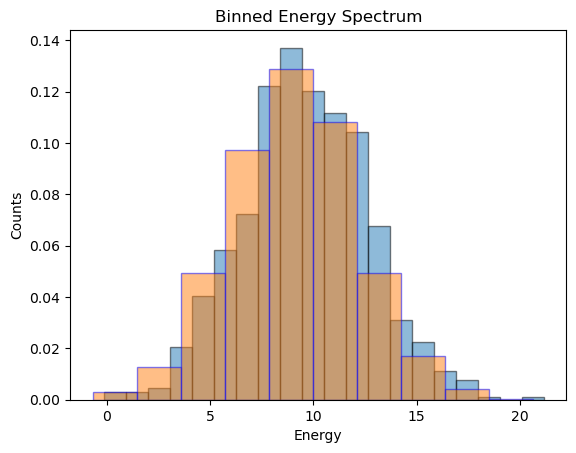

array([ 8.17165265, 11.40808194, 14.81808169, 11.01337676, 11.5602043 ,
       12.39797341, 15.20726365,  8.91298086, 10.79064967,  9.9594132 ,
       11.51347656, 11.16512762,  9.30510483,  6.98742762, 13.63424338,
        7.48871109,  7.62055079, 10.24022481, 11.24160848, 11.00493965,
       10.48228897, 10.00575914,  8.80903472, 12.80724904,  6.97823637,
        8.73663663,  8.43771623, 13.28207281,  9.50217952,  8.60811948,
       11.90580932,  5.7548082 ,  6.43767369,  8.75901395, 16.4596259 ,
       13.64128808,  8.20155511,  8.4795293 ,  8.75365886, 12.77015025,
       14.96897939, 12.6502512 , 12.49229045, 11.84638425,  7.2124379 ,
       11.76594861,  8.29218523, 12.71343825,  6.18998805, 14.79568543,
       10.37171336,  7.168855  ,  8.12054246, 10.53505876,  5.66638883,
        2.42005893,  9.15082098,  7.99234615, 15.31382334, 10.91677037,
        8.4295183 ,  3.48065244,  5.30372401, 10.90622333,  7.01728053,
        8.70371687,  4.3910579 ,  5.08302797,  5.36158309,  8.58

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Example energy data (replace this with your actual energy data)
energy_spectrum = np.random.normal(loc=10, scale=3, size=1000)

# Define the energy range and number of bins
energy_min = min(energy_spectrum)
energy_max = max(energy_spectrum)
num_bins = 20
num_bins2= 10

# Compute bin edges
bin_edges = np.linspace(energy_min, energy_max, num_bins + 1)
bin_edges2 = np.linspace(energy_min,energy_max, num_bins2 +1)

# Count data points in each bin
hist, _ = np.histogram(energy_spectrum, bins=bin_edges,density=True)
hist2,_ = np.histogram(energy_spectrum, bins=bin_edges2,density=True)

# Plot the binned spectrum
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='k',alpha=0.5)
plt.bar(bin_edges2[:-1], hist2, width=np.diff(bin_edges2), edgecolor='b',alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.title('Binned Energy Spectrum')
plt.show()
energy_spectrum